In [1]:
import os
import sys
import numbers
import time
import math
import datetime as dt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import stats as ss
%matplotlib inline
from matplotlib import pyplot as plt
import statsmodels
import statsmodels.api as sm
from scipy.stats import normaltest
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import median_absolute_error as mdae
from statsforecast import StatsForecast as sf
from statsforecast.models import Naive, SeasonalNaive, AutoARIMA, HoltWinters, AutoETS, AutoTheta, AutoCES
from nixtla import NixtlaClient as nc

In [4]:
day = pd.read_csv('C:\\Users\\tony.dunsworth\\anaconda3\\envs\\nixtla2\\data\\day_clean.csv')
week = pd.read_csv('C:\\Users\\tony.dunsworth\\anaconda3\\envs\\nixtla2\\data\\week_clean.csv')
month = pd.read_csv('C:\\Users\\tony.dunsworth\\anaconda3\\envs\\nixtla2\\data\\month_clean.csv')
hour = pd.read_csv('C:\\Users\\tony.dunsworth\\anaconda3\\envs\\nixtla2\\data\\hour_clean.csv')

In [5]:
alxm = pd.DataFrame(month, columns=['ds', 'alx'])
alxm.rename(columns={'ds':'ds', 'alx':'y'}, inplace=True)
tr_alxm = alxm[:48]
tst_alxm = alxm[48:]

alxmsf = alxm
alxmsf.insert(0, "unique_id", "M")
tr_alxmsf = alxmsf[:48]
tst_alxmsf = alxmsf[48:]

gcom = pd.DataFrame(month, columns=['ds', 'gco'])
gcom.rename(columns={'ds':'ds', 'gco':'y'}, inplace=True)
tr_gcom = gcom[:48]
tst_gcom = gcom[48:]

gcomsf = gcom
gcomsf.insert(0, "unique_id", "M")
tr_gcomsf = gcomsf[:48]
tst_gcomsf = gcomsf[48:]

mcom = pd.DataFrame(month, columns=['ds', 'mco'])
mcom.rename(columns={'ds':'ds', 'mco':'y'}, inplace=True)
tr_mcom = mcom[:48]
tst_mcom = mcom[48:]

mcomsf = mcom
mcomsf.insert(0, "unique_id", "M")
tr_mcomsf = mcomsf[:48]
tst_mcomsf = mcomsf[48:]

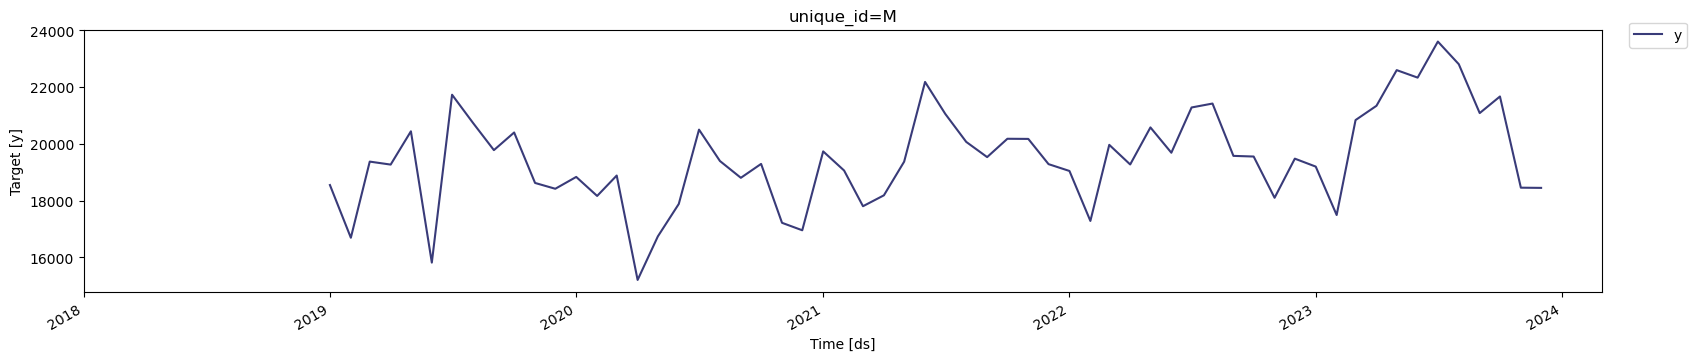

In [6]:
sf.plot(alxm)

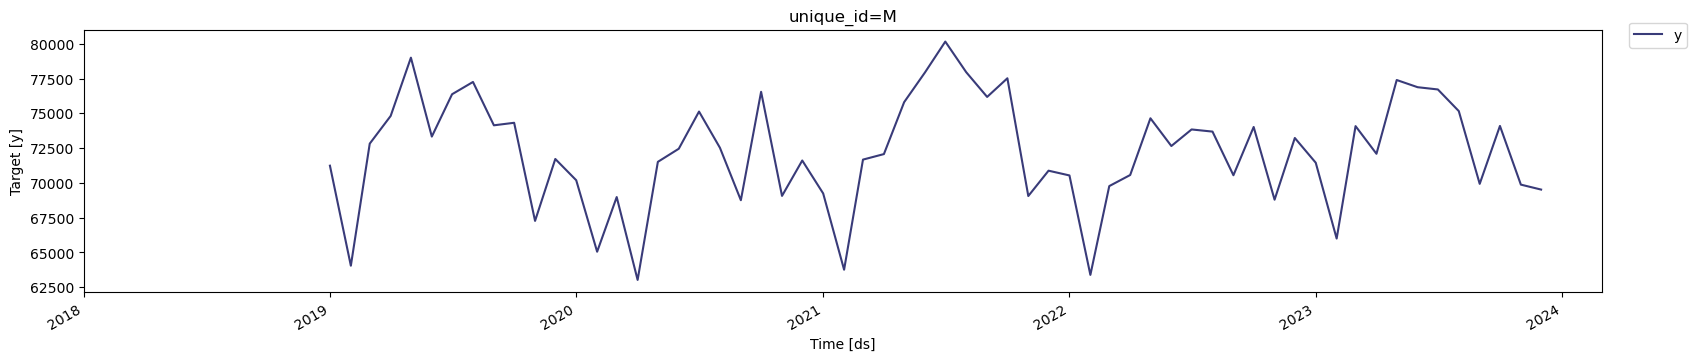

In [7]:
sf.plot(gcom)

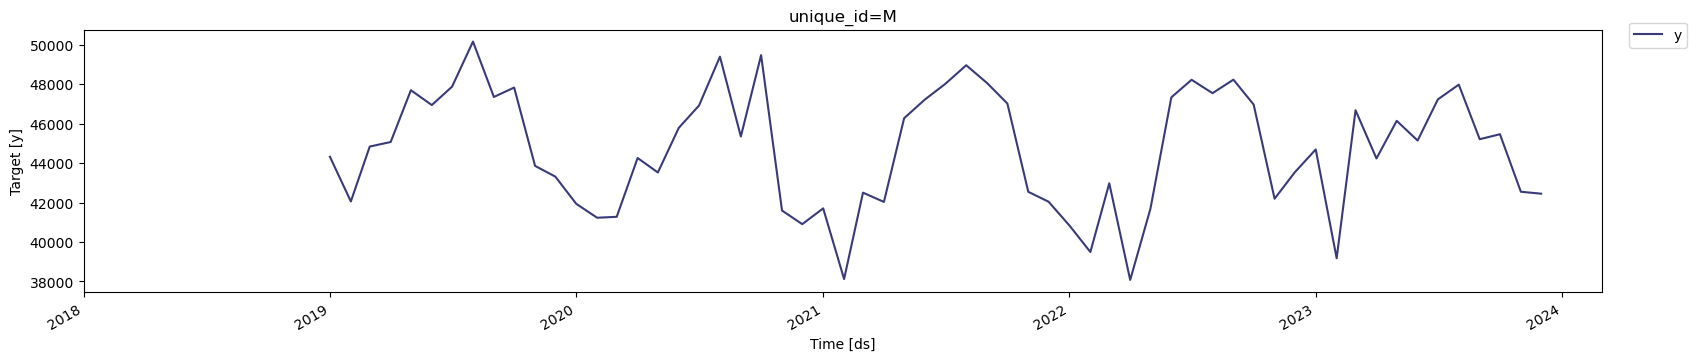

In [8]:
sf.plot(mcom)

In [9]:
from statsforecast.models import MSTL

In [10]:
sf_out = [MSTL(season_length=[12])]

In [11]:
alxmsf_out = sf(
    df = tr_alxmsf,
    models = sf_out,
    freq = 'MS',
    n_jobs = -1
)

In [12]:
horizon = 12
levels = [99]

In [13]:
import supersmoother

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for supersmoother: filename=supersmoother-0.4-py3-none-any.whl size=16153 sha256=e9c30f1a7f42d1a5f859c69bdda2fd783abb237ee59ef81ca304790f729a9079
  Stored in directory: c:\users\tony.dunsworth\appdata\local\pip\cache\wheels\ce\54\3b\3a6a20584d667a3a898b09ead38658bc5b8b3f68cb2875fb6d
Successfully built supersmoother
Note: you may need to restart the kernel to use updated packages.


In [14]:
alxmsf_out_fcst = alxmsf_out.forecast(
    h = horizon,
    level = levels,
    fitted = True
).reset_index()

In [15]:
alxmsf_out_fcst

unique_id         ds          MSTL    MSTL-lo-99    MSTL-hi-99
0          M 2023-01-01  19522.175781  16552.828125  22491.521484
1          M 2023-02-01  18305.595703  15299.900391  21311.292969
2          M 2023-03-01  19396.496094  16354.883789  22438.107422
3          M 2023-04-01  18363.650391  15286.542969  21440.759766
4          M 2023-05-01  19667.667969  16555.468750  22779.867188
5          M 2023-06-01  19607.449219  16460.548828  22754.349609
6          M 2023-07-01  21512.699219  18331.478516  24693.921875
7          M 2023-08-01  20803.023438  17587.845703  24018.199219
8          M 2023-09-01  19790.261719  16541.482422  23039.039062
9          M 2023-10-01  20181.058594  16899.023438  23463.091797
10         M 2023-11-01  18884.947266  15569.989258  22199.904297
11         M 2023-12-01  18903.539062  15555.982422  22251.095703

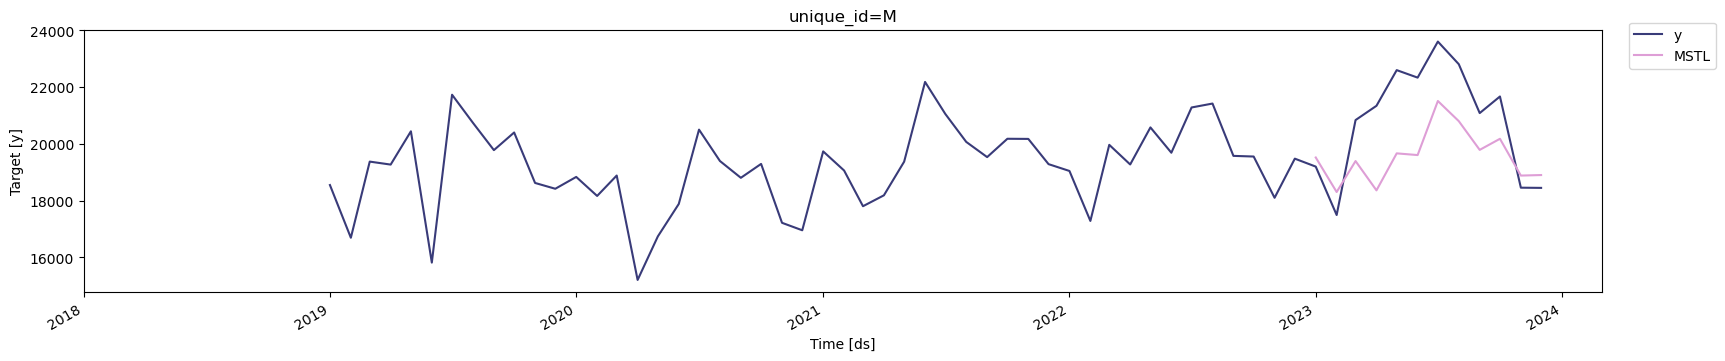

In [16]:
sf.plot(alxmsf, alxmsf_out_fcst, plot_random=False)

In [17]:
season_length = 12

sfmodels1 = [
    AutoARIMA(season_length=season_length), # ARIMA model with automatic order selection and seasonal component
    AutoETS(season_length=season_length), # ETS model with automatic error, trend, and seasonal component
    AutoTheta(season_length=season_length), # Theta model with automatic seasonality detection
    AutoCES(season_length=season_length), # CES model with automatic seasonality detection
]

sf_fcst1 = sf(
    models=sfmodels1,
    freq='MS',
    n_jobs=-1
)

In [18]:
sf_fcst1.fit(df=tr_alxmsf) # Fit the models to the data using the fit method of the StatsForecast object
sf_fcst1.fitted_ # Access fitted models from the StatsForecast object
alxm_fcst1 = sf_fcst1.predict(h=horizon) # Predict or forecast 'horizon' steps ahead using the predict method
alxm_fcst1

ds     AutoARIMA       AutoETS     AutoTheta           CES
unique_id                                                                   
M         2023-01-01  15819.231445  19161.203125  19706.486328  19619.537109
M         2023-02-01  12901.708984  19161.203125  19720.027344  18492.832031
M         2023-03-01  10537.184570  19161.203125  19733.568359  19443.673828
M         2023-04-01   6249.746094  19161.203125  19747.111328  18273.365234
M         2023-05-01   6300.720703  19161.203125  19760.652344  19606.382812
M         2023-06-01   5578.811035  19161.203125  19774.195312  19966.941406
M         2023-07-01   6635.939453  19161.203125  19787.736328  21717.718750
M         2023-08-01   6884.441895  19161.203125  19801.277344  20831.998047
M         2023-09-01   6067.475586  19161.203125  19814.818359  19992.976562
M         2023-10-01   5909.517090  19161.203125  19828.359375  20509.763672
M         2023-11-01   5010.163574  19161.203125  19841.900391  19216.197266
M         2023-12-01   5927.801758  19161.203125  19855.441406  18963.603516

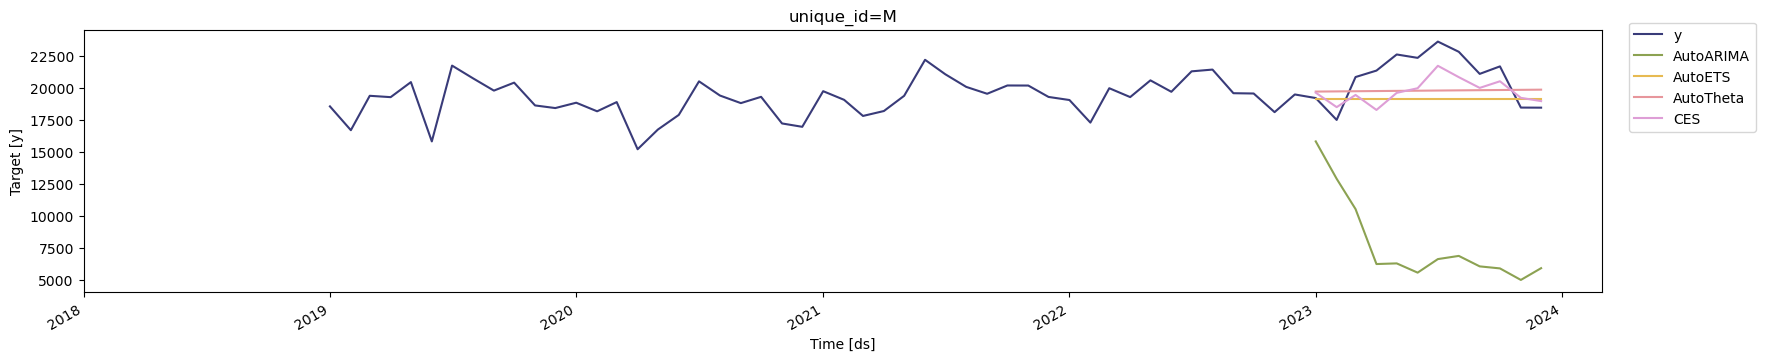

In [19]:
alxm_plot1 = sf.plot(alxmsf, alxm_fcst1)
alxm_plot1

In [20]:
sf_fcst1.fit(df=tr_gcomsf)
sf_fcst1.fitted_
gcom_fcst1 = sf_fcst1.predict(h=horizon)
gcom_fcst1

ds     AutoARIMA       AutoETS     AutoTheta           CES
unique_id                                                                   
M         2023-01-01  70998.757812  70293.781250  72100.335938  71047.656250
M         2023-02-01  63970.351562  64056.351562  72105.125000  65006.101562
M         2023-03-01  70687.546875  70745.187500  72109.914062  71319.156250
M         2023-04-01  70154.835938  70297.242188  72114.703125  69985.078125
M         2023-05-01  75117.218750  75307.617188  72119.492188  75246.429688
M         2023-06-01  74110.953125  74138.906250  72124.281250  75098.546875
M         2023-07-01  76248.132812  76408.734375  72129.070312  77475.015625
M         2023-08-01  75236.898438  75379.109375  72133.859375  76295.625000
M         2023-09-01  72320.265625  72390.453125  72138.648438  73376.562500
M         2023-10-01  75528.687500  75584.070312  72143.437500  76517.687500
M         2023-11-01  68619.140625  68528.015625  72148.226562  69061.031250
M         2023-12-01  72083.148438  71512.500000  72153.015625  72070.539062

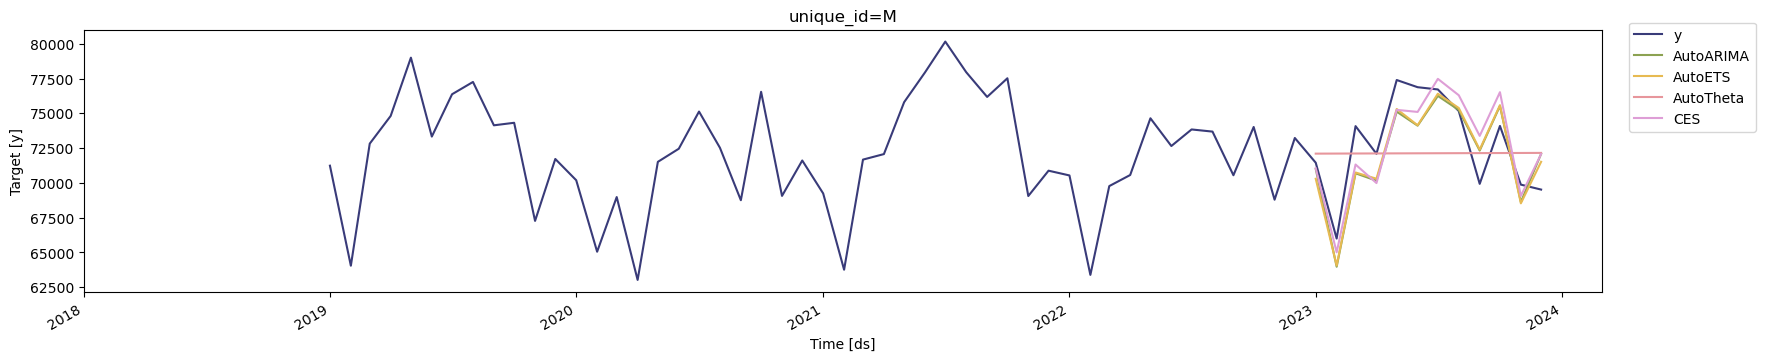

In [21]:
gcom_plot1 = sf.plot(gcomsf, gcom_fcst1)
gcom_plot1

In [22]:
sf_fcst1.fit(df=tr_mcomsf)
sf_fcst1.fitted_
mcom_fcst1 = sf_fcst1.predict(h=horizon)
mcom_fcst1

ds     AutoARIMA       AutoETS     AutoTheta           CES
unique_id                                                                   
M         2023-01-01  41102.675781  41471.492188  41237.171875  41298.402344
M         2023-02-01  39068.472656  39490.824219  39379.386719  39395.976562
M         2023-03-01  42830.476562  42307.167969  42016.648438  42025.355469
M         2023-04-01  39295.605469  41807.203125  41183.136719  41224.144531
M         2023-05-01  43102.101562  44509.421875  43569.136719  43601.535156
M         2023-06-01  47304.917969  46523.179688  46520.695312  46426.992188
M         2023-07-01  48163.457031  47412.429688  46659.484375  46680.457031
M         2023-08-01  47985.097656  48737.949219  48592.675781  48540.714844
M         2023-09-01  48179.710938  47038.750000  46091.679688  46075.179688
M         2023-10-01  46985.347656  47691.367188  47386.753906  47260.621094
M         2023-11-01  42301.964844  42331.960938  42162.382812  41962.449219
M         2023-12-01  43076.148438  42280.652344  41649.648438  41478.007812

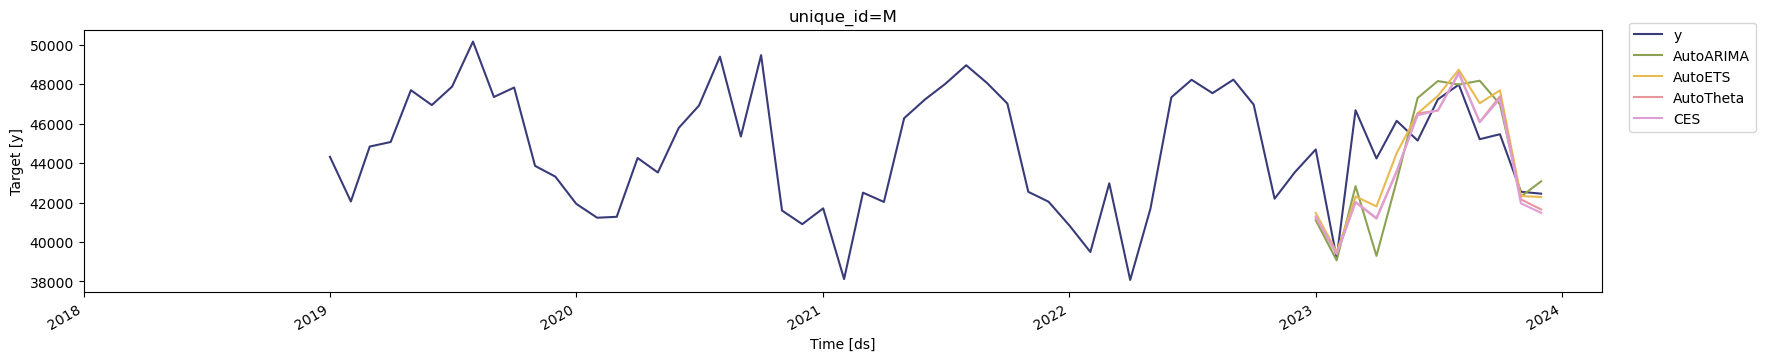

In [23]:
mcom_plot1 = sf.plot(mcomsf, mcom_fcst1)
mcom_plot1

In [24]:
sfmodels2 = [
    Naive(),
    SeasonalNaive(season_length=12),
    HoltWinters()
]

sf_fcst2 = sf(
    models = sfmodels2,
    freq = "MS",
    fallback_model = SeasonalNaive(season_length=1),
    n_jobs=-1
)

In [25]:
alxm_fcst2 = sf_fcst2.forecast(df=tr_alxmsf, h=12, level=[90,95])
alxm_fcst2

ds    Naive   Naive-lo-90   Naive-lo-95   Naive-hi-90  \
unique_id                                                                 
M         2023-01-01  19481.0  16526.966797  15961.052734  22435.033203   
M         2023-02-01  19481.0  15303.367188  14503.042969  23658.632812   
M         2023-03-01  19481.0  14364.464844  13384.272461  24597.535156   
M         2023-04-01  19481.0  13572.934570  12441.105469  25389.066406   
M         2023-05-01  19481.0  12875.582031  11610.159180  26086.417969   
M         2023-06-01  19481.0  12245.126953  10858.925781  26716.873047   
M         2023-07-01  19481.0  11665.364258  10168.094727  27296.636719   
M         2023-08-01  19481.0  11125.733398   9525.085938  27836.265625   
M         2023-09-01  19481.0  10618.901367   8921.158203  28343.097656   
M         2023-10-01  19481.0  10139.528320   8349.949219  28822.472656   
M         2023-11-01  19481.0   9683.581055   7806.655762  29278.417969   
M         2023-12-01  19481.0   9247.929688   7287.544922  29714.070312   

            Naive-hi-95  SeasonalNaive  SeasonalNaive-lo-90  \
unique_id                                                     
M          23000.947266        19047.0         15997.303711   
M          24458.957031        17286.0         14236.303711   
M          25577.726562        19968.0         16918.302734   
M          26520.894531        19276.0         16226.303711   
M          27351.841797        20582.0         17532.302734   
M          28103.074219        19690.0         16640.302734   
M          28793.904297        21285.0         18235.302734   
M          29436.914062        21423.0         18373.302734   
M          30040.841797        19579.0         16529.302734   
M          30612.050781        19556.0         16506.302734   
M          31155.343750        18102.0         15052.303711   
M          31674.455078        19481.0         16431.302734   

           SeasonalNaive-lo-95  SeasonalNaive-hi-90  SeasonalNaive-hi-95  \
unique_id                                                                  
M                   15413.0625         22096.697266           22680.9375   
M                   13652.0625         20335.697266           20919.9375   
M                   16334.0625         23017.697266           23601.9375   
M                   15642.0625         22325.697266           22909.9375   
M                   16948.0625         23631.697266           24215.9375   
M                   16056.0625         22739.697266           23323.9375   
M                   17651.0625         24334.697266           24918.9375   
M                   17789.0625         24472.697266           25056.9375   
M                   15945.0625         22628.697266           23212.9375   
M                   15922.0625         22605.697266           23189.9375   
M                   14468.0625         21151.697266           21735.9375   
M                   15847.0625         22530.697266           23114.9375   

           HoltWinters  HoltWinters-lo-90  HoltWinters-lo-95  \
unique_id                                                      
M              19481.0        9247.929688        7287.544922   
M              19481.0        9247.929688        7287.544922   
M              19481.0        9247.929688        7287.544922   
M              19481.0        9247.929688        7287.544922   
M              19481.0        9247.929688        7287.544922   
M              19481.0        9247.929688        7287.544922   
M              19481.0        9247.929688        7287.544922   
M              19481.0        9247.929688        7287.544922   
M              19481.0        9247.929688        7287.544922   
M              19481.0        9247.929688        7287.544922   
M              19481.0        9247.929688        7287.544922   
M              19481.0        9247.929688        7287.544922   

           HoltWinters-hi-90  HoltWinters-hi-95  
unique_id                                        
M               29714.

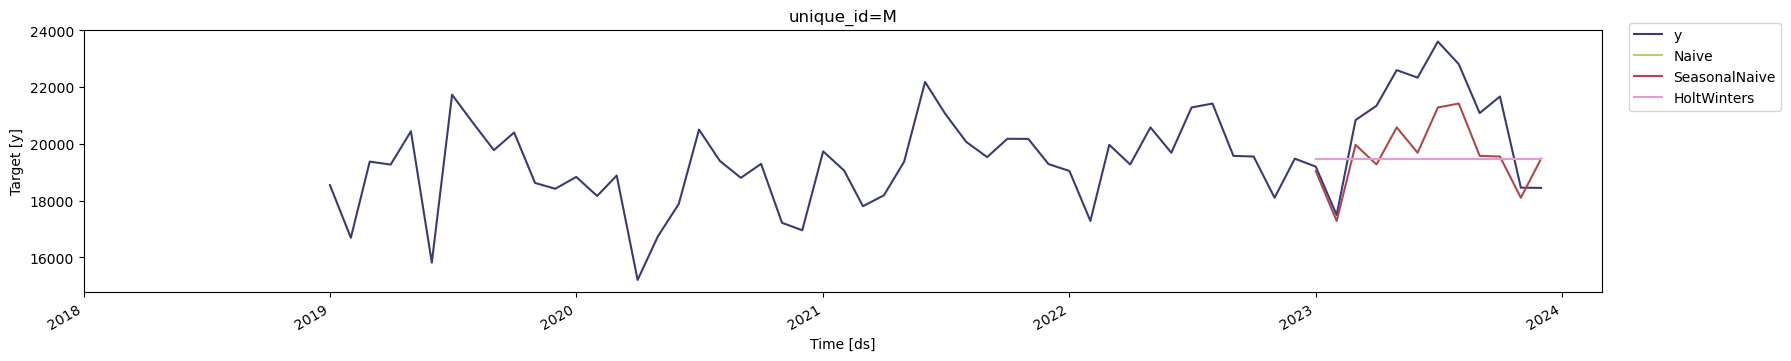

In [26]:
alxm_plot2 = sf.plot(alxmsf, alxm_fcst2)
alxm_plot2

In [27]:
gcom_fcst2 = sf_fcst2.forecast(df=tr_gcomsf, h=12, level=[90,95])
gcom_fcst2

ds    Naive   Naive-lo-90   Naive-lo-95   Naive-hi-90  \
unique_id                                                                 
M         2023-01-01  73225.0  65769.539062  64341.265625  80680.460938   
M         2023-02-01  73225.0  62681.382812  60661.503906  83768.617188   
M         2023-03-01  73225.0  60311.757812  57837.921875  86138.242188   
M         2023-04-01  73225.0  58314.074219  55457.535156  88135.929688   
M         2023-05-01  73225.0  56554.078125  53360.371094  89895.921875   
M         2023-06-01  73225.0  54962.917969  51464.386719  91487.078125   
M         2023-07-01  73225.0  53499.695312  49720.851562  92950.304688   
M         2023-08-01  73225.0  52137.765625  48098.007812  94312.234375   
M         2023-09-01  73225.0  50858.609375  46573.800781  95591.390625   
M         2023-10-01  73225.0  49648.753906  45132.167969  96801.250000   
M         2023-11-01  73225.0  48498.023438  43760.992188  97951.976562   
M         2023-12-01  73225.0  47398.515625  42450.847656  99051.484375   

             Naive-hi-95  SeasonalNaive  SeasonalNaive-lo-90  \
unique_id                                                      
M           82108.734375        70533.0         63436.460938   
M           85788.492188        63385.0         56288.460938   
M           88612.078125        69768.0         62671.460938   
M           90992.468750        70564.0         63467.460938   
M           93089.632812        74641.0         67544.460938   
M           94985.609375        72648.0         65551.460938   
M           96729.148438        73839.0         66742.460938   
M           98351.992188        73684.0         66587.460938   
M           99876.195312        70547.0         63450.460938   
M          101317.828125        74016.0         66919.460938   
M          102689.007812        68790.0         61693.460938   
M          103999.156250        73225.0         66128.460938   

           SeasonalNaive-lo-95  SeasonalNaive-hi-90  SeasonalNaive-hi-95  \
unique_id                                                                  
M                 62076.953125         77629.539062         78989.046875   
M                 54928.953125         70481.539062         71841.046875   
M                 61311.953125         76864.539062         78224.046875   
M                 62107.953125         77660.539062         79020.046875   
M                 66184.953125         81737.539062         83097.046875   
M                 64191.953125         79744.539062         81104.046875   
M                 65382.953125         80935.539062         82295.046875   
M                 65227.953125         80780.539062         82140.046875   
M                 62090.953125         77643.539062         79003.046875   
M                 65559.953125         81112.539062         82472.046875   
M                 60333.953125         75886.539062         77246.046875   
M                 64768.953125         80321.539062         81681.046875   

           HoltWinters  HoltWinters-lo-90  HoltWinters-lo-95  \
unique_id                                                      
M              73225.0       47398.515625       42450.847656   
M              73225.0       47398.515625       42450.847656   
M              73225.0       47398.515625       42450.847656   
M              73225.0       47398.515625       42450.847656   
M              73225.0       47398.515625       42450.847656   
M              73225.0       47398.515625       42450.847656   
M              73225.0       47398.515625       42450.847656   
M              73225.0       47398.515625       42450.847656   
M              73225.0       47398.515625       42450.847656   
M              73225.0       47398.515625       42450.847656   
M              73225.0       47398.515625       42450.847656   
M              73225.0       47398.515625       42450.847656   

           HoltWinters-hi-90  HoltWinters-hi-95  
unique_id                                        
M       

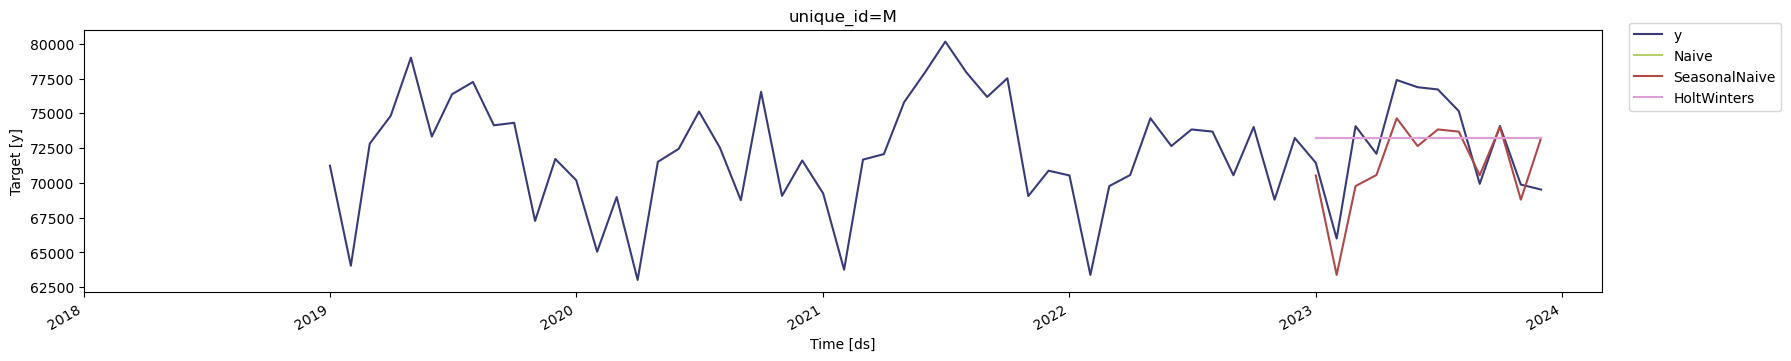

In [28]:
gcom_plot2 = sf.plot(gcomsf, gcom_fcst2)
gcom_plot2

In [29]:
mcom_fcst2 = sf_fcst2.forecast(df=tr_mcomsf, h=12, level=[90,95])
mcom_fcst2

ds    Naive   Naive-lo-90   Naive-lo-95   Naive-hi-90  \
unique_id                                                                 
M         2023-01-01  43537.0  38990.332031  38119.312500  48083.667969   
M         2023-02-01  43537.0  37107.042969  35875.234375  49966.957031   
M         2023-03-01  43537.0  35661.941406  34153.292969  51412.058594   
M         2023-04-01  43537.0  34443.667969  32701.626953  52630.332031   
M         2023-05-01  43537.0  33370.343750  31422.683594  53703.656250   
M         2023-06-01  43537.0  32399.988281  30266.431641  54674.011719   
M         2023-07-01  43537.0  31507.652344  29203.148438  55566.347656   
M         2023-08-01  43537.0  30677.085938  28213.466797  56396.914062   
M         2023-09-01  43537.0  29897.001953  27283.939453  57177.000000   
M         2023-10-01  43537.0  29159.179688  26404.769531  57914.820312   
M         2023-11-01  43537.0  28457.414062  25568.564453  58616.585938   
M         2023-12-01  43537.0  27786.886719  24769.582031  59287.113281   

            Naive-hi-95  SeasonalNaive  SeasonalNaive-lo-90  \
unique_id                                                     
M          48954.687500        40834.0         37537.570312   
M          51198.765625        39492.0         36195.570312   
M          52920.707031        42977.0         39680.570312   
M          54372.375000        38075.0         34778.570312   
M          55651.316406        41685.0         38388.570312   
M          56807.570312        47337.0         44040.570312   
M          57870.851562        48227.0         44930.570312   
M          58860.531250        47548.0         44251.570312   
M          59790.062500        48234.0         44937.570312   
M          60669.230469        46969.0         43672.570312   
M          61505.433594        42194.0         38897.570312   
M          62304.417969        43537.0         40240.570312   

           SeasonalNaive-lo-95  SeasonalNaive-hi-90  SeasonalNaive-hi-95  \
unique_id                                                                  
M                   36906.0625         44130.429688           44761.9375   
M                   35564.0625         42788.429688           43419.9375   
M                   39049.0625         46273.429688           46904.9375   
M                   34147.0625         41371.429688           42002.9375   
M                   37757.0625         44981.429688           45612.9375   
M                   43409.0625         50633.429688           51264.9375   
M                   44299.0625         51523.429688           52154.9375   
M                   43620.0625         50844.429688           51475.9375   
M                   44306.0625         51530.429688           52161.9375   
M                   43041.0625         50265.429688           50896.9375   
M                   38266.0625         45490.429688           46121.9375   
M                   39609.0625         46833.429688           47464.9375   

           HoltWinters  HoltWinters-lo-90  HoltWinters-lo-95  \
unique_id                                                      
M              43537.0       27786.886719       24769.582031   
M              43537.0       27786.886719       24769.582031   
M              43537.0       27786.886719       24769.582031   
M              43537.0       27786.886719       24769.582031   
M              43537.0       27786.886719       24769.582031   
M              43537.0       27786.886719       24769.582031   
M              43537.0       27786.886719       24769.582031   
M              43537.0       27786.886719       24769.582031   
M              43537.0       27786.886719       24769.582031   
M              43537.0       27786.886719       24769.582031   
M              43537.0       27786.886719       24769.582031   
M              43537.0       27786.886719       24769.582031   

           HoltWinters-hi-90  HoltWinters-hi-95  
unique_id                                        
M               59287.

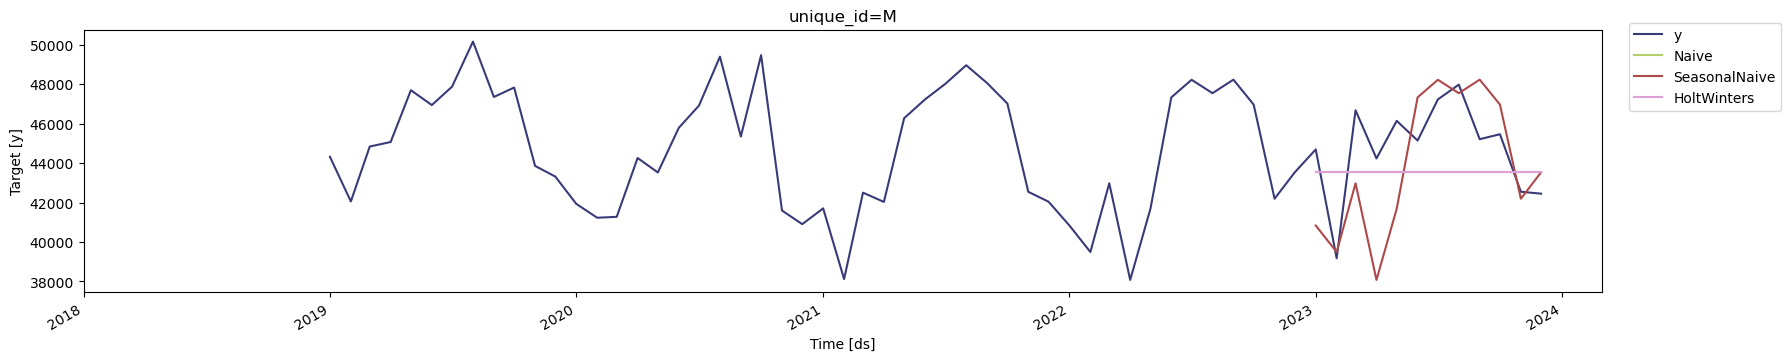

In [30]:
mcom_plot2 = sf.plot(mcomsf, mcom_fcst2)
mcom_plot2

In [31]:
nixtla_client = nc(api_key = 'nixtla-tok-p2HkvvhK3qSPVd7fF9GfzYQlnFwItKuQOSg06j9qnV0WU1OuMTOo3FfiFuiYOgTyNjPwexwo2sMiqU9y')

In [32]:
alxm_fcst3 = nixtla_client.forecast(tr_alxmsf, h=12, freq='MS', model='timegpt-1-long-horizon', level=[90, 95])
alxm_fcst3

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


unique_id          ds       TimeGPT  TimeGPT-lo-95  TimeGPT-lo-90  \
0          M  2023-01-01  19250.404297   17387.313281   17485.370703   
1          M  2023-02-01  18605.884766   16834.320312   16927.560547   
2          M  2023-03-01  18909.746094   18842.743262   18846.269727   
3          M  2023-04-01  18858.404297   17679.192676   17741.256445   
4          M  2023-05-01  19438.964844   17732.961523   17822.751172   
5          M  2023-06-01  19647.222656   14710.299023   14970.137109   
6          M  2023-07-01  19855.714844   17610.517871   17728.686133   
7          M  2023-08-01  19846.572266   18311.216406   18392.024609   
8          M  2023-09-01  19462.664062   18126.544727   18196.866797   
9          M  2023-10-01  19546.832031   17457.301465   17567.276758   
10         M  2023-11-01  19352.652344   16636.546680   16779.499609   
11         M  2023-12-01  19504.492188   17429.089160   17538.320898   

    TimeGPT-hi-90  TimeGPT-hi-95  
0    21015.437891   21113.495312  
1    20284.208984   20377.449219  
2    18973.222461   18976.748926  
3    19975.552148   20037.615918  
4    21055.178516   21144.968164  
5    24324.308203   24584.146289  
6    21982.743555   22100.911816  
7    21301.119922   21381.928125  
8    20728.461328   20798.783398  
9    21526.387305   21636.362598  
10   21925.805078   22068.758008  
11   21470.663477   21579.895215

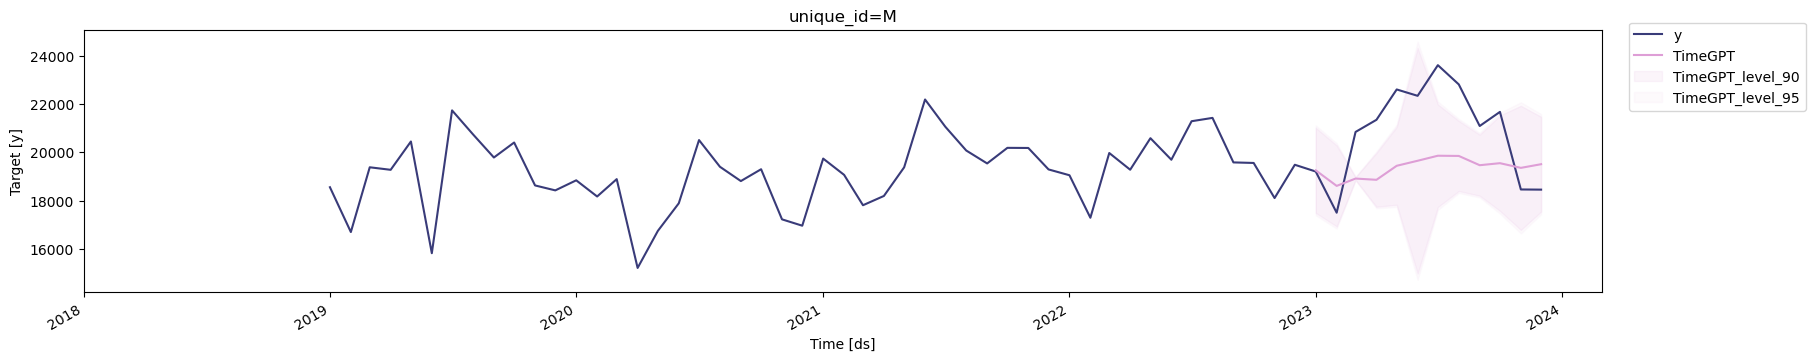

In [33]:
alxm_plot3 = nixtla_client.plot(alxmsf, alxm_fcst3, time_col='ds', target_col='y', level=[90, 95])
alxm_plot3

In [34]:
gcom_fcst3 = nixtla_client.forecast(tr_gcomsf, h=12, freq='MS', model='timegpt-1-long-horizon', level=[90, 95])
gcom_fcst3

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


unique_id          ds       TimeGPT  TimeGPT-lo-95  TimeGPT-lo-90  \
0          M  2023-01-01  70537.796875   69605.876562   69654.925000   
1          M  2023-02-01  64258.617188   62589.908789   62677.735547   
2          M  2023-03-01  70474.093750   68601.042578   68699.624219   
3          M  2023-04-01  70216.593750   66138.132422   66352.788281   
4          M  2023-05-01  73276.054688   68920.616406   69149.850000   
5          M  2023-06-01  72572.968750   65392.920703   65770.817969   
6          M  2023-07-01  73321.984375   65025.797656   65462.439063   
7          M  2023-08-01  71864.218750   64097.575391   64506.346094   
8          M  2023-09-01  71058.828125   64409.807813   64759.756250   
9          M  2023-10-01  71564.882812   64126.805859   64518.283594   
10         M  2023-11-01  68235.414062   66024.533984   66140.896094   
11         M  2023-12-01  70604.218750   68970.886719   69056.851562   

    TimeGPT-hi-90  TimeGPT-hi-95  
0    71420.668750   71469.717188  
1    65839.498828   65927.325586  
2    72248.563281   72347.144922  
3    74080.399219   74295.055078  
4    77402.259375   77631.492969  
5    79375.119531   79753.016797  
6    81181.529688   81618.171094  
7    79222.091406   79630.862109  
8    77357.900000   77707.848437  
9    78611.482031   79002.959766  
10   70329.932031   70446.294141  
11   72151.585938   72237.550781

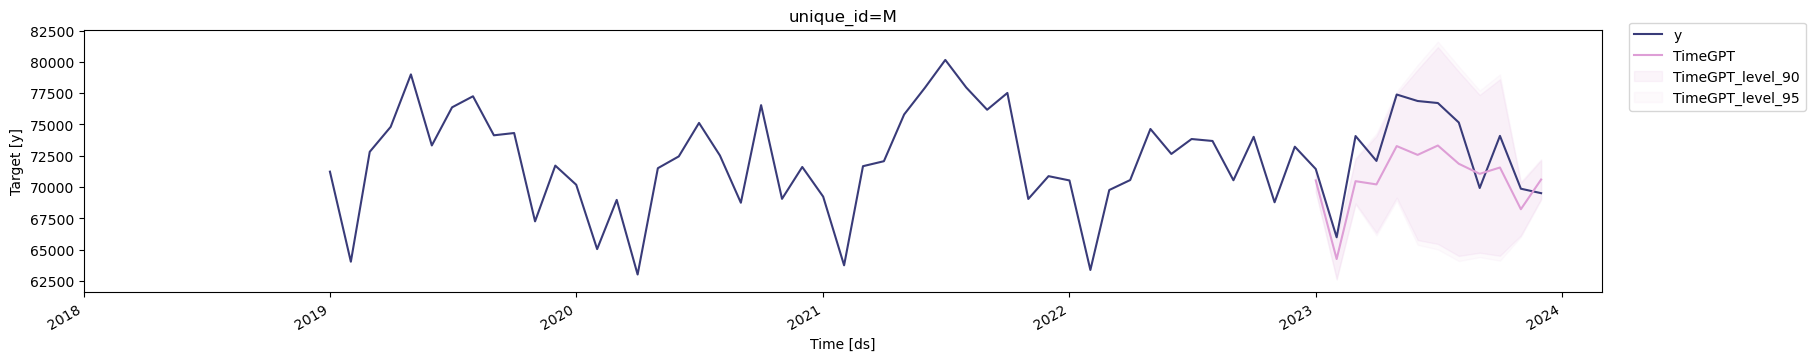

In [35]:
gcom_plot3 = nixtla_client.plot(gcomsf, gcom_fcst3, time_col='ds', target_col='y', level=[90, 95])
gcom_plot3

In [36]:
mcom_fcst3 = nixtla_client.forecast(tr_mcomsf, h=12, freq='MS', model='timegpt-1-long-horizon', level=[90, 95])
mcom_fcst3

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


unique_id          ds       TimeGPT  TimeGPT-lo-95  TimeGPT-lo-90  \
0          M  2023-01-01  42270.726562   40883.066016   40956.100781   
1          M  2023-02-01  40931.843750   39166.487695   39259.401172   
2          M  2023-03-01  42973.695312   41430.305273   41511.536328   
3          M  2023-04-01  40812.609375   40618.378906   40628.601562   
4          M  2023-05-01  44088.554688   41032.297070   41193.152734   
5          M  2023-06-01  46785.113281   43681.285156   43844.644531   
6          M  2023-07-01  47832.828125   44889.991602   45044.877734   
7          M  2023-08-01  48093.429688   45967.448438   46079.342187   
8          M  2023-09-01  47807.359375   44631.472266   44798.624219   
9          M  2023-10-01  46373.515625   44883.210547   44961.647656   
10         M  2023-11-01  43416.644531   42911.782617   42938.354297   
11         M  2023-12-01  43429.277344   42854.052344   42884.327344   

    TimeGPT-hi-90  TimeGPT-hi-95  
0    43585.352344   43658.387109  
1    42604.286328   42697.199805  
2    44435.854297   44517.085352  
3    40996.617188   41006.839844  
4    46983.956641   47144.812305  
5    49725.582031   49888.941406  
6    50620.778516   50775.664648  
7    50107.517188   50219.410937  
8    50816.094531   50983.246484  
9    47785.383594   47863.820703  
10   43894.934766   43921.506445  
11   43974.227344   44004.502344

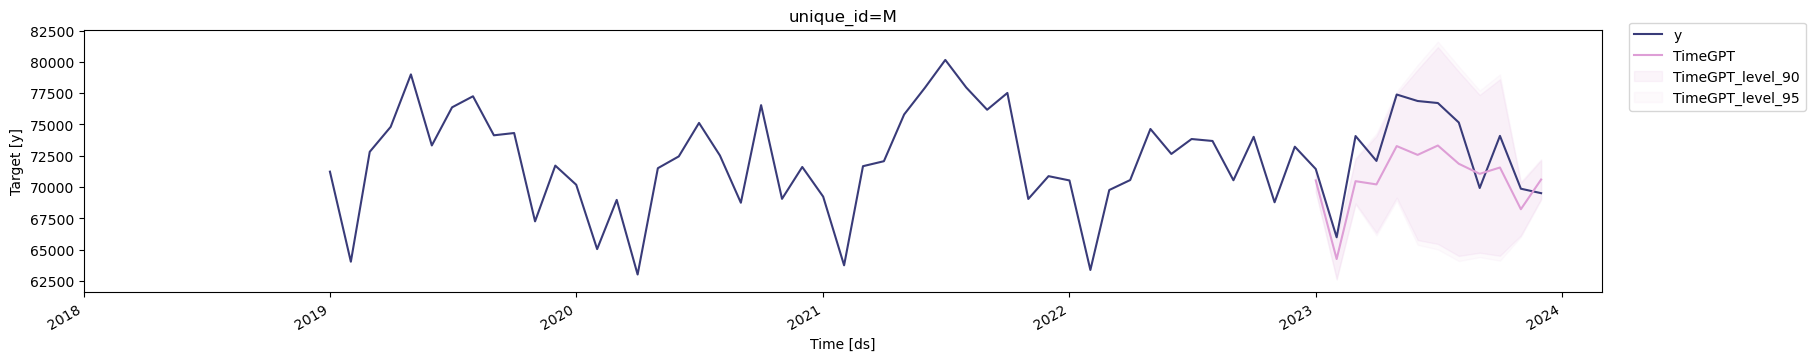

In [37]:
mcom_plot3 = nixtla_client.plot(gcomsf, gcom_fcst3, time_col='ds', target_col='y', level=[90, 95])
mcom_plot3

In [38]:
week['ds'] = pd.to_datetime(week['ds'], format = '%Y-%m-%d')

alxw = pd.DataFrame(week, columns=['ds', 'alx'])
alxw.rename(columns={'ds':'ds', 'alx':'y'}, inplace=True)
tr_alxw = alxw[:209]
tst_alxw = alxw[209:]

alxwsf = alxw
alxwsf.insert(0, "unique_id", "W")
tr_alxwsf = alxwsf[:209]
tst_alxwsf = alxwsf[209:]

gcow = pd.DataFrame(week, columns=['ds', 'gco'])
gcow.rename(columns={'ds':'ds', 'gco':'y'}, inplace=True)
tr_gcow = gcow[:209]
tst_gcow = gcow[209:]

gcowsf = gcow
gcowsf.insert(0, "unique_id", "W")
tr_gcowsf = gcowsf[:209]
tst_gcowsf = gcowsf[209:]

mcow = pd.DataFrame(week, columns=['ds', 'mco'])
mcow.rename(columns={'ds':'ds', 'mco':'y'}, inplace=True)
tr_mcow = mcow[:209]
tst_mcow = mcow[209:]

mcowsf = mcow
mcowsf.insert(0, "unique_id", "W")
tr_mcowsf = mcowsf[:209]
tst_mcowsf = mcowsf[209:]


In [39]:
season_length = 52
wk_horizon = 52

sfmodels1 = [
    AutoARIMA(season_length=season_length), # ARIMA model with automatic order selection and seasonal component
    AutoETS(season_length=season_length), # ETS model with automatic error, trend, and seasonal component
    AutoTheta(season_length=season_length), # Theta model with automatic seasonality detection
    AutoCES(season_length=season_length), # CES model with automatic seasonality detection
]

sf_fcst1 = sf(
    models=sfmodels1,
    freq='W',
    n_jobs=-1
)

In [40]:
sf_fcst1.fit(df=tr_alxwsf) # Fit the models to the data using the fit method of the StatsForecast object
sf_fcst1.fitted_ # Access fitted models from the StatsForecast object
alxw_fcst1 = sf_fcst1.predict(h=wk_horizon) # Predict or forecast 'horizon' steps ahead using the predict method
alxw_fcst1.head()

ds    AutoARIMA      AutoETS    AutoTheta          CES
unique_id                                                               
W         2023-01-01  4230.459473  4288.366211  4289.997559  4324.871094
W         2023-01-08  4273.649902  4288.366211  4290.594238  4163.069824
W         2023-01-15  4284.967773  4288.366211  4291.190918  4065.671387
W         2023-01-22  4277.682617  4288.366211  4291.787598  4079.252197
W         2023-01-29  4279.373535  4288.366211  4292.384277  4144.422852

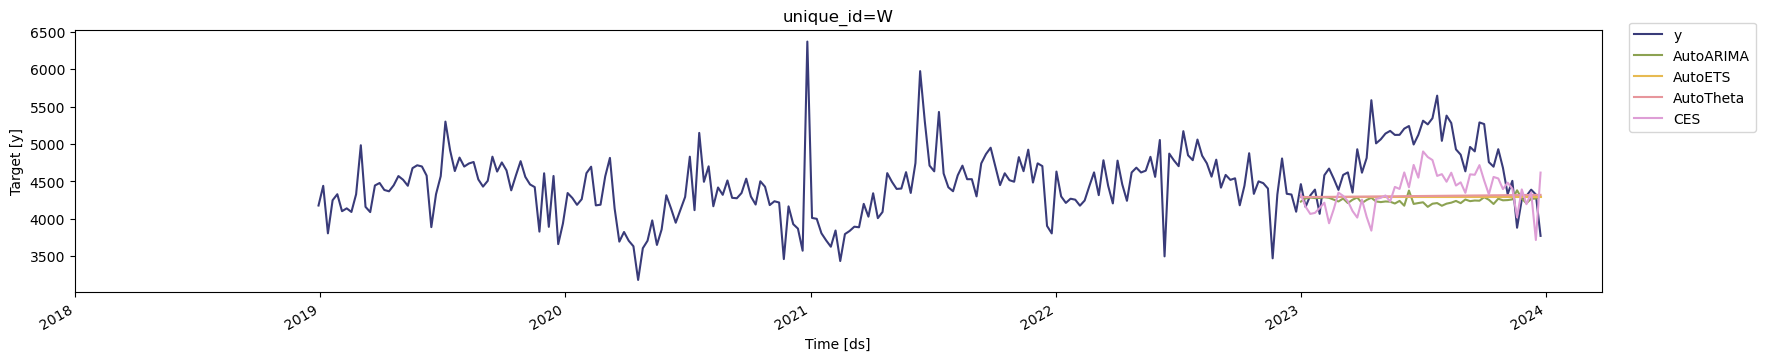

In [41]:
alxw_plot1 = sf.plot(alxwsf, alxw_fcst1)
alxw_plot1

In [42]:
sf_fcst1.fit(df=tr_gcowsf) # Fit the models to the data using the fit method of the StatsForecast object
sf_fcst1.fitted_ # Access fitted models from the StatsForecast object
gcow_fcst1 = sf_fcst1.predict(h=wk_horizon) # Predict or forecast 'horizon' steps ahead using the predict method
gcow_fcst1.head()

ds     AutoARIMA       AutoETS     AutoTheta           CES
unique_id                                                                   
W         2023-01-01  16341.167969  16271.806641  16269.425781  16583.681641
W         2023-01-08  16247.017578  16271.806641  16269.592773  16051.526367
W         2023-01-15  16278.849609  16271.806641  16269.759766  15986.734375
W         2023-01-22  16248.220703  16271.806641  16269.926758  16177.094727
W         2023-01-29  16202.170898  16271.806641  16270.093750  16310.415039

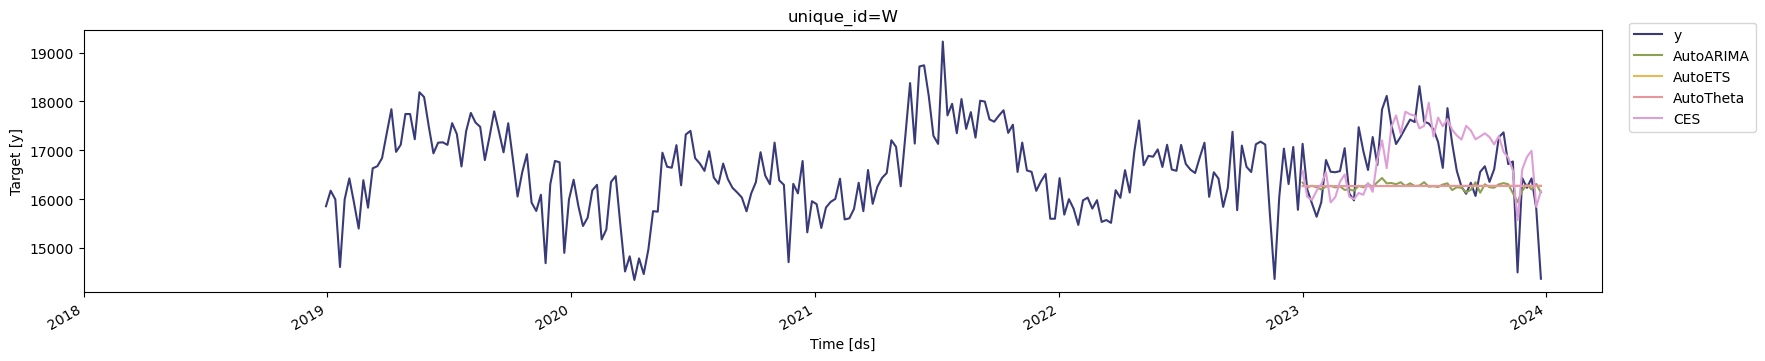

In [43]:
gcow_plot1 = sf.plot(gcowsf, gcow_fcst1)
gcow_plot1

In [44]:
sf_fcst1.fit(df=tr_mcowsf) # Fit the models to the data using the fit method of the StatsForecast object
sf_fcst1.fitted_ # Access fitted models from the StatsForecast object
mcow_fcst1 = sf_fcst1.predict(h=wk_horizon) # Predict or forecast 'horizon' steps ahead using the predict method
mcow_fcst1.tail()

ds    AutoARIMA      AutoETS     AutoTheta          CES
unique_id                                                                
W         2023-11-26  9764.177734  9694.265625  10242.020508  9945.740234
W         2023-12-03  9810.173828  9694.265625  10036.317383  9800.271484
W         2023-12-10  9932.132812  9694.265625   9750.648438  9606.150391
W         2023-12-17  9096.447266  9694.265625   8980.862305  8820.627930
W         2023-12-24  9425.391602  9694.265625   9428.840820  9262.049805

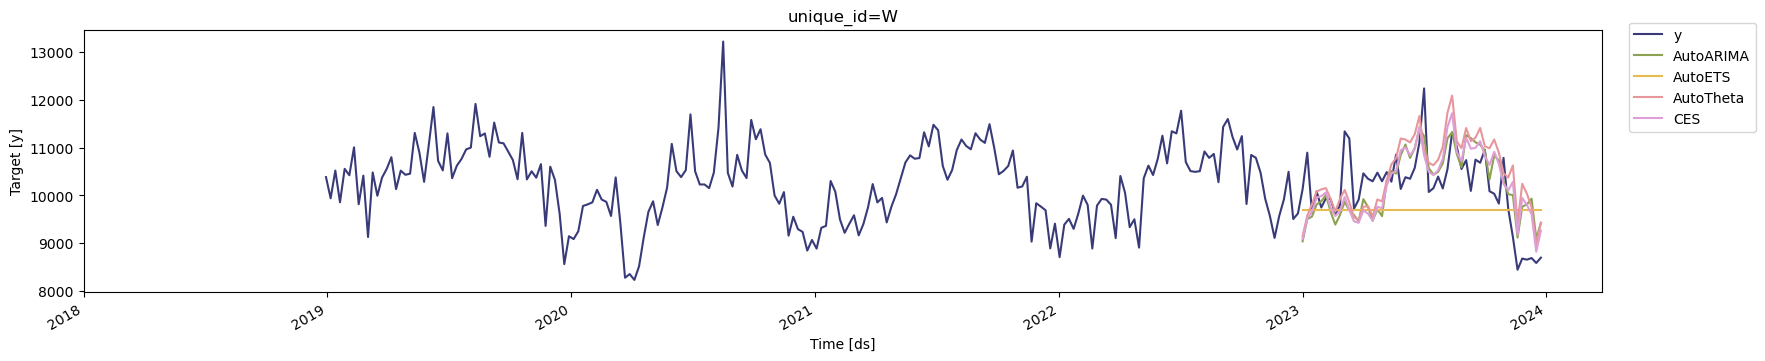

In [45]:
mcow_plot1 = sf.plot(mcowsf, mcow_fcst1)
mcow_plot1

In [46]:
sfmodels2 = [
    Naive(),
    SeasonalNaive(season_length=52),
    HoltWinters()
]

sf_fcst2 = sf(
    models = sfmodels2,
    freq = "W",
    fallback_model = SeasonalNaive(season_length=13),
    n_jobs=-1
)

In [47]:
alxw_fcst2 = sf_fcst2.forecast(df=tr_alxwsf, h=52, level=[90,95])
alxw_fcst2.tail()

ds   Naive  Naive-lo-90  Naive-lo-95  Naive-hi-90  \
unique_id                                                             
W         2023-11-26  4095.0 -1140.107666 -2143.015625  9330.107422   
W         2023-12-03  4095.0 -1194.358887 -2207.659912  9384.359375   
W         2023-12-10  4095.0 -1248.059448 -2271.647949  9438.059570   
W         2023-12-17  4095.0 -1301.225464 -2334.999268  9491.225586   
W         2023-12-24  4095.0 -1353.872803 -2397.732422  9543.873047   

            Naive-hi-95  SeasonalNaive  SeasonalNaive-lo-90  \
unique_id                                                     
W          10333.015625         4325.0          3277.762939   
W          10397.660156         4807.0          3759.762939   
W          10461.648438         4335.0          3287.762939   
W          10524.999023         4325.0          3277.762939   
W          10587.732422         4095.0          3047.762939   

           SeasonalNaive-lo-95  SeasonalNaive-hi-90  SeasonalNaive-hi-95  \
unique_id                                                                  
W                  3077.139893          5372.237305          5572.859863   
W                  3559.139893          5854.237305          6054.859863   
W                  3087.139893          5382.237305          5582.859863   
W                  3077.139893          5372.237305          5572.859863   
W                  2847.139893          5142.237305          5342.859863   

           HoltWinters  HoltWinters-lo-90  HoltWinters-lo-95  \
unique_id                                                      
W               4325.0        2391.979492        2021.664062   
W               4807.0        2873.979492        2503.664062   
W               4335.0        2401.979492        2031.664062   
W               4325.0        2391.979492        2021.664062   
W               4095.0        2161.979492        1791.664062   

           HoltWinters-hi-90  HoltWinters-hi-95  
unique_id                                        
W                6258.020508        6628.335938  
W                6740.020508        7110.335938  
W                6268.020508        6638.335938  
W                6258.020508        6628.335938  
W                6028.020508        6398.335938

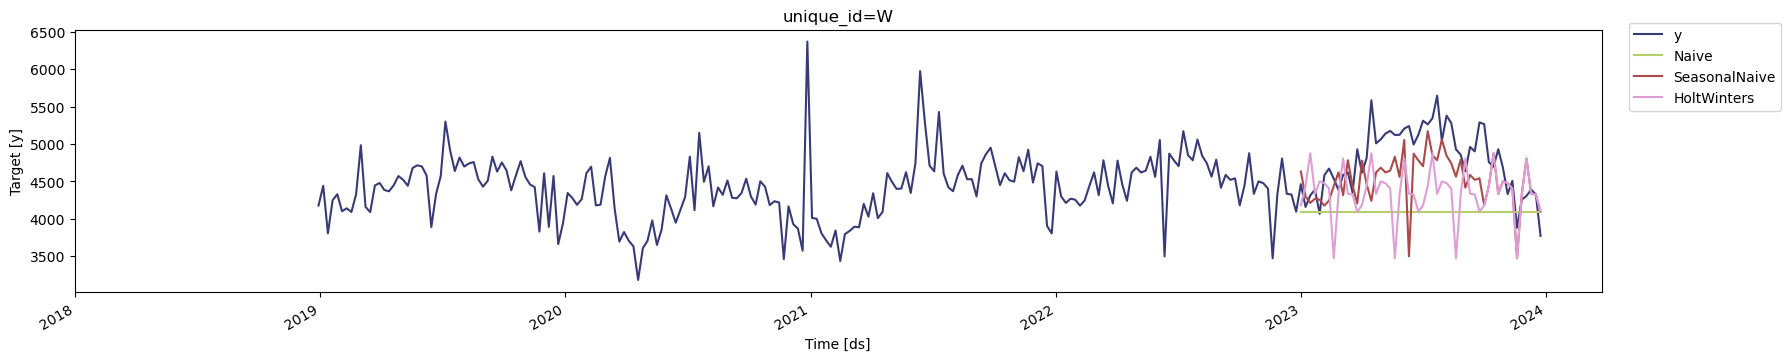

In [48]:
alxw_plot2 = sf.plot(alxwsf, alxw_fcst2)
alxw_plot2

In [49]:
gcow_fcst2 = sf_fcst2.forecast(df=tr_gcowsf, h=52, level=[90,95])
gcow_fcst2.tail()

ds    Naive  Naive-lo-90  Naive-lo-95   Naive-hi-90  \
unique_id                                                               
W         2023-11-26  15786.0  8079.345215  6602.954590  23492.654297   
W         2023-12-03  15786.0  7999.481445  6507.791016  23572.517578   
W         2023-12-10  15786.0  7920.428711  6413.593750  23651.572266   
W         2023-12-17  15786.0  7842.162109  6320.333496  23729.837891   
W         2023-12-24  15786.0  7764.659668  6227.983398  23807.339844   

            Naive-hi-95  SeasonalNaive  SeasonalNaive-lo-90  \
unique_id                                                     
W          24969.044922        16044.0         14165.741211   
W          25064.208984        17037.0         15158.741211   
W          25158.406250        16313.0         14434.741211   
W          25251.666016        17070.0         15191.741211   
W          25344.017578        15786.0         13907.741211   

           SeasonalNaive-lo-95  SeasonalNaive-hi-90  SeasonalNaive-hi-95  \
unique_id                                                                  
W                 13805.916992         17922.257812         18282.082031   
W                 14798.916992         18915.257812         19275.082031   
W                 14074.916992         18191.257812         18551.082031   
W                 14831.916992         18948.257812         19308.082031   
W                 13547.916992         17664.257812         18024.082031   

           HoltWinters  HoltWinters-lo-90  HoltWinters-lo-95  \
unique_id                                                      
W              16044.0       12321.370117       11608.212891   
W              17037.0       13314.370117       12601.212891   
W              16313.0       12590.370117       11877.212891   
W              17070.0       13347.370117       12634.212891   
W              15786.0       12063.370117       11350.212891   

           HoltWinters-hi-90  HoltWinters-hi-95  
unique_id                                        
W               19766.628906       20479.787109  
W               20759.628906       21472.787109  
W               20035.628906       20748.787109  
W               20792.628906       21505.787109  
W               19508.628906       20221.787109

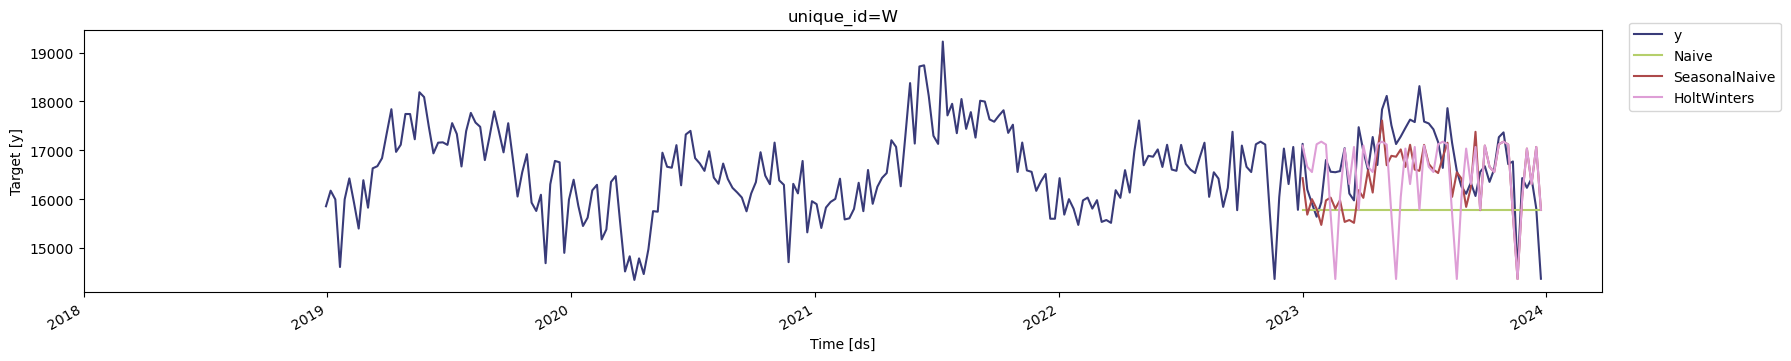

In [50]:
gcow_plot2 = sf.plot(gcowsf, gcow_fcst2)
gcow_plot2

In [51]:
mcow_fcst2 = sf_fcst2.forecast(df=tr_mcowsf, h=52, level=[90,95])
mcow_fcst2.tail()

ds   Naive  Naive-lo-90  Naive-lo-95   Naive-hi-90  \
unique_id                                                              
W         2023-11-26  9622.0  2711.498291  1387.629395  16532.501953   
W         2023-12-03  9622.0  2639.885010  1302.296753  16604.115234   
W         2023-12-10  9622.0  2568.998779  1217.830688  16675.001953   
W         2023-12-17  9622.0  2498.817871  1134.205078  16745.181641   
W         2023-12-24  9622.0  2429.321777  1051.395264  16814.677734   

            Naive-hi-95  SeasonalNaive  SeasonalNaive-lo-90  \
unique_id                                                     
W          17856.371094         9571.0          8329.788086   
W          17941.703125         9916.0          8674.788086   
W          18026.169922        10493.0          9251.788086   
W          18109.794922         9505.0          8263.788086   
W          18192.605469         9622.0          8380.788086   

           SeasonalNaive-lo-95  SeasonalNaive-hi-90  SeasonalNaive-hi-95  \
unique_id                                                                  
W                  8092.005371         10812.211914         11049.995117   
W                  8437.004883         11157.211914         11394.995117   
W                  9014.004883         11734.211914         11971.995117   
W                  8026.005371         10746.211914         10983.995117   
W                  8143.005371         10863.211914         11100.995117   

           HoltWinters  HoltWinters-lo-90  HoltWinters-lo-95  \
unique_id                                                      
W               9571.0        5965.291504        5274.533203   
W               9916.0        6310.291504        5619.533203   
W              10493.0        6887.291504        6196.533203   
W               9505.0        5899.291504        5208.533203   
W               9622.0        6016.291504        5325.533203   

           HoltWinters-hi-90  HoltWinters-hi-95  
unique_id                                        
W               13176.708984       13867.466797  
W               13521.708984       14212.466797  
W               14098.708984       14789.466797  
W               13110.708984       13801.466797  
W               13227.708984       13918.466797

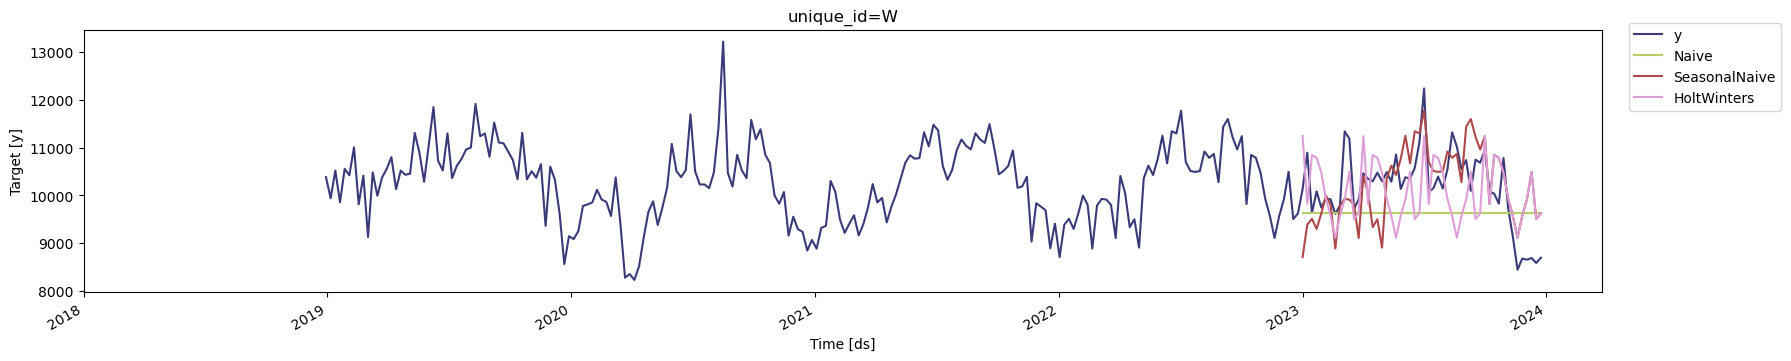

In [52]:
mcow_plot2 = sf.plot(mcowsf, mcow_fcst2)
mcow_plot2

In [53]:
alxw_fcst3 = nixtla_client.forecast(tr_alxwsf, h=52, freq='W', model='timegpt-1-long-horizon', level=[90, 95])
alxw_fcst3.tail()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: W-SUN
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


unique_id          ds      TimeGPT  TimeGPT-lo-95  TimeGPT-lo-90  \
47         W  2023-11-26  4184.562500    3840.500427    3865.097534   
48         W  2023-12-03  4234.136719    3595.420380    3637.035339   
49         W  2023-12-10  4180.843750    3575.263000    3628.091919   
50         W  2023-12-17  4184.642090    3745.747040    3786.218201   
51         W  2023-12-24  4147.568359    2056.281189    2294.531128   

    TimeGPT-hi-90  TimeGPT-hi-95  
47    4504.027466    4528.624573  
48    4831.238098    4872.853058  
49    4733.595581    4786.424500  
50    4583.065979    4623.537140  
51    6000.605591    6238.855530

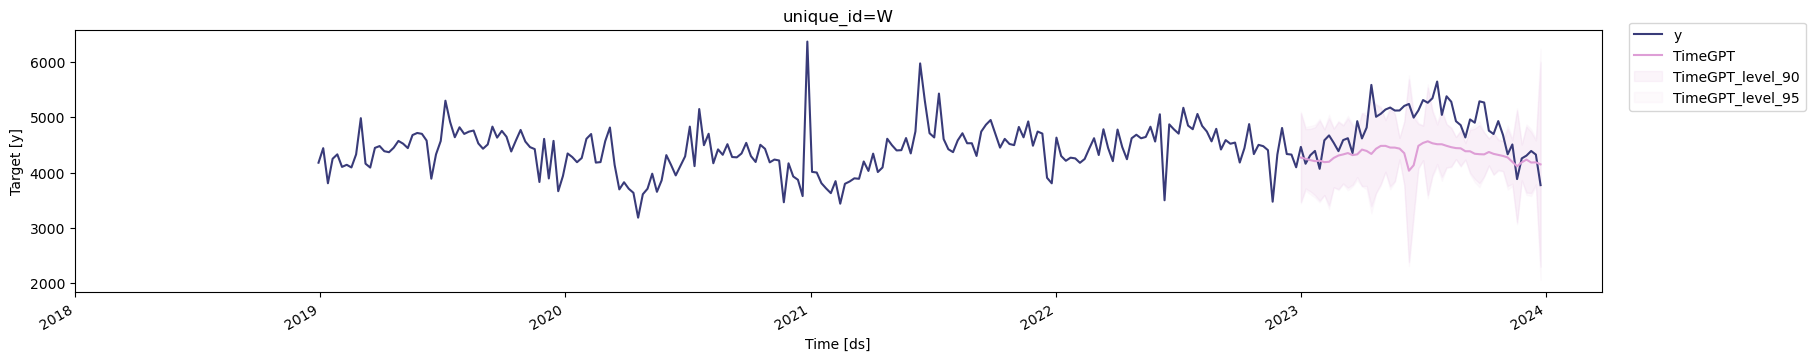

In [54]:
alxw_plot3 = nixtla_client.plot(alxwsf, alxw_fcst3, time_col='ds', target_col='y', level=[90, 95])
alxw_plot3

In [55]:
gcow_fcst3 = nixtla_client.forecast(tr_gcowsf, h=52, freq='W', model='timegpt-1-long-horizon', level=[90, 95])
gcow_fcst3.tail()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: W-SUN
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


unique_id          ds       TimeGPT  TimeGPT-lo-95  TimeGPT-lo-90  \
47         W  2023-11-26  15933.960938   15561.893311   15564.282715   
48         W  2023-12-03  16316.863281   15566.771118   15605.852783   
49         W  2023-12-10  16300.098633   15514.162720   15541.441650   
50         W  2023-12-17  16290.149414   15275.910889   15340.502441   
51         W  2023-12-24  16240.694336   16022.596069   16039.984131   

    TimeGPT-hi-90  TimeGPT-hi-95  
47   16303.639160   16306.028564  
48   17027.873779   17066.955444  
49   17058.755615   17086.034546  
50   17239.796387   17304.387939  
51   16441.404541   16458.792603

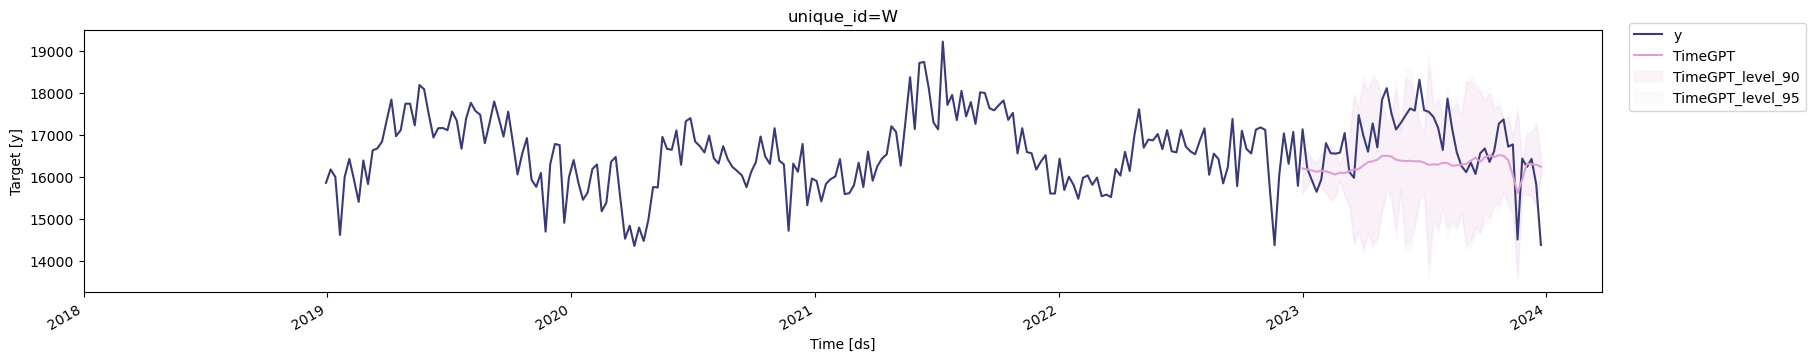

In [56]:
gcow_plot3 = nixtla_client.plot(gcowsf, gcow_fcst3, time_col='ds', target_col='y', level=[90, 95])
gcow_plot3

In [57]:
mcow_fcst3 = nixtla_client.forecast(tr_mcowsf, h=52, freq='W', model='timegpt-1-long-horizon', level=[90, 95])
mcow_fcst3.tail()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: W-SUN
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


unique_id          ds      TimeGPT  TimeGPT-lo-95  TimeGPT-lo-90  \
47         W  2023-11-26  9910.310547    9426.385986    9462.290527   
48         W  2023-12-03  9898.307617    9433.793945    9441.366211   
49         W  2023-12-10  9899.257812    9046.255005    9098.102783   
50         W  2023-12-17  9955.219727    9466.864014    9498.265137   
51         W  2023-12-24  9960.797852    9688.288086    9691.850586   

    TimeGPT-hi-90  TimeGPT-hi-95  
47   10358.330566   10394.235107  
48   10355.249023   10362.821289  
49   10700.412842   10752.260620  
50   10412.174316   10443.575439  
51   10229.745117   10233.307617

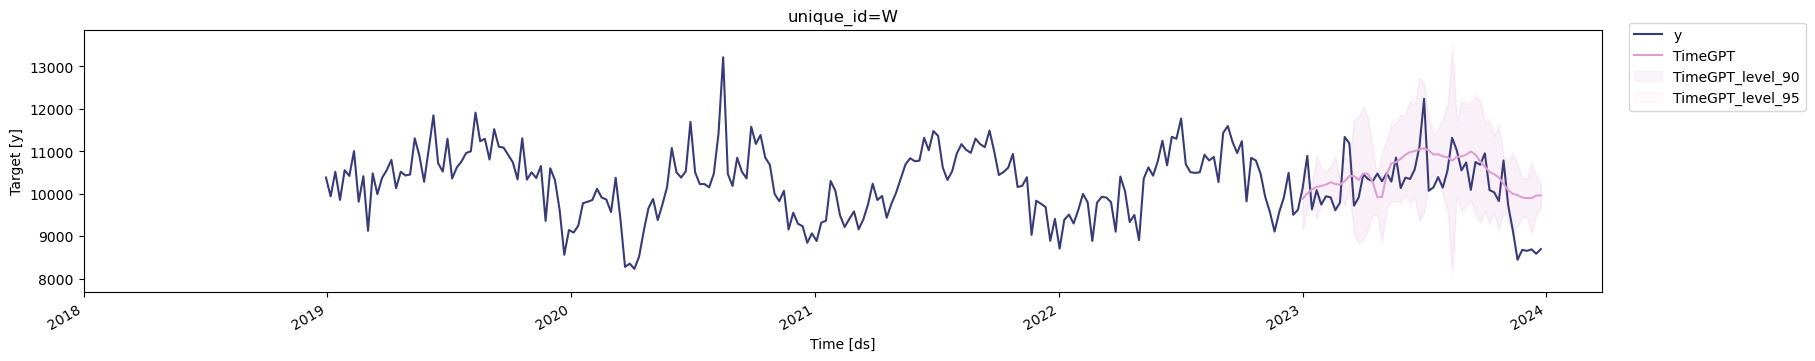

In [58]:
mcow_plot3 = nixtla_client.plot(mcowsf, mcow_fcst3, time_col='ds', target_col='y', level=[90, 95])
mcow_plot3

In [59]:
day['ds'] = pd.to_datetime(day['ds'], format = '%Y-%m-%d')

alxd = pd.DataFrame(day, columns=['ds', 'alx'])
alxd.rename(columns={'ds':'ds', 'alx':'y'}, inplace=True)
tr_alxd = alxd[:365]
tst_alxd = alxd[365:]

alxdsf = alxd
alxdsf.insert(0, "unique_id", "D")
tr_alxdsf = alxdsf[:365]
tst_alxdsf = alxdsf[365:]

gcod = pd.DataFrame(day, columns=['ds', 'gco'])
gcod.rename(columns={'ds':'ds', 'gco':'y'}, inplace=True)
tr_gcod = gcod[:365]
tst_gcod = gcod[365:]

gcodsf = gcod
gcodsf.insert(0, "unique_id", "D")
tr_gcodsf = gcodsf[:365]
tst_gcodsf = gcodsf[365:]

mcod = pd.DataFrame(day, columns=['ds', 'mco'])
mcod.rename(columns={'ds':'ds', 'mco':'y'}, inplace=True)
tr_mcod = mcod[:365]
tst_mcod = mcod[365:]

mcodsf = mcod
mcodsf.insert(0, "unique_id", "D")
tr_mcodsf = mcodsf[:365]
tst_mcodsf = mcodsf[365:]


In [60]:
len(day)
455-365

90

In [61]:
season_length = 365.25
d_horizon = 90

sfmodels1 = [
    AutoARIMA(season_length=season_length), # ARIMA model with automatic order selection and seasonal component
    AutoETS(season_length=season_length), # ETS model with automatic error, trend, and seasonal component
    AutoTheta(season_length=season_length), # Theta model with automatic seasonality detection
    AutoCES(season_length=season_length), # CES model with automatic seasonality detection
]

sf_fcst1 = sf(
    models=sfmodels1,
    freq='D',
    n_jobs=-1
)

In [62]:
sf_fcst1.fit(df=tr_alxdsf) # Fit the models to the data using the fit method of the StatsForecast object
sf_fcst1.fitted_ # Access fitted models from the StatsForecast object
alxd_fcst1 = sf_fcst1.predict(h=d_horizon) # Predict or forecast 'horizon' steps ahead using the predict method
alxd_fcst1.tail()

ds   AutoARIMA     AutoETS   AutoTheta         CES
unique_id                                                           
D         2023-03-27  619.650269  619.492432  616.046326  618.549194
D         2023-03-28  619.650269  619.492432  616.057495  618.540527
D         2023-03-29  619.650269  619.492432  616.068665  618.531860
D         2023-03-30  619.650269  619.492432  616.079834  618.523193
D         2023-03-31  619.650269  619.492432  616.091003  618.514526

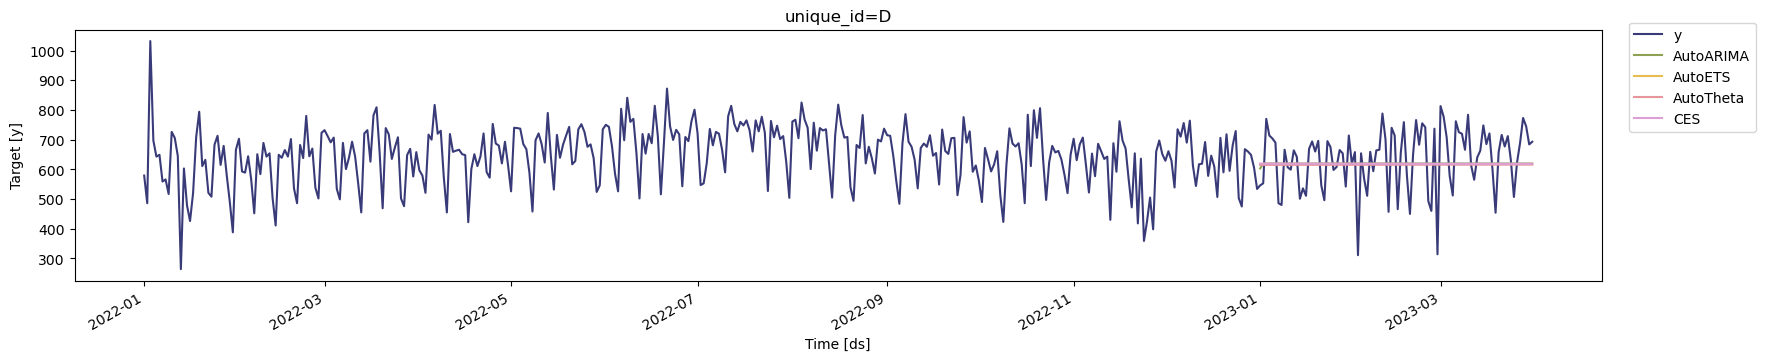

In [63]:
alxd_plot1 = sf.plot(alxdsf, alxd_fcst1)
alxd_plot1

In [64]:
sf_fcst1.fit(df=tr_gcodsf) # Fit the models to the data using the fit method of the StatsForecast object
sf_fcst1.fitted_ # Access fitted models from the StatsForecast object
gcod_fcst1 = sf_fcst1.predict(h=d_horizon) # Predict or forecast 'horizon' steps ahead using the predict method
gcod_fcst1.tail()

ds    AutoARIMA      AutoETS    AutoTheta          CES
unique_id                                                               
D         2023-03-27  2326.079834  2330.210938  2333.605713  2342.241943
D         2023-03-28  2326.079834  2330.210938  2333.695068  2342.340576
D         2023-03-29  2326.079834  2330.210938  2333.784424  2342.439209
D         2023-03-30  2326.079834  2330.210938  2333.873779  2342.537842
D         2023-03-31  2326.079834  2330.210938  2333.963135  2342.636475

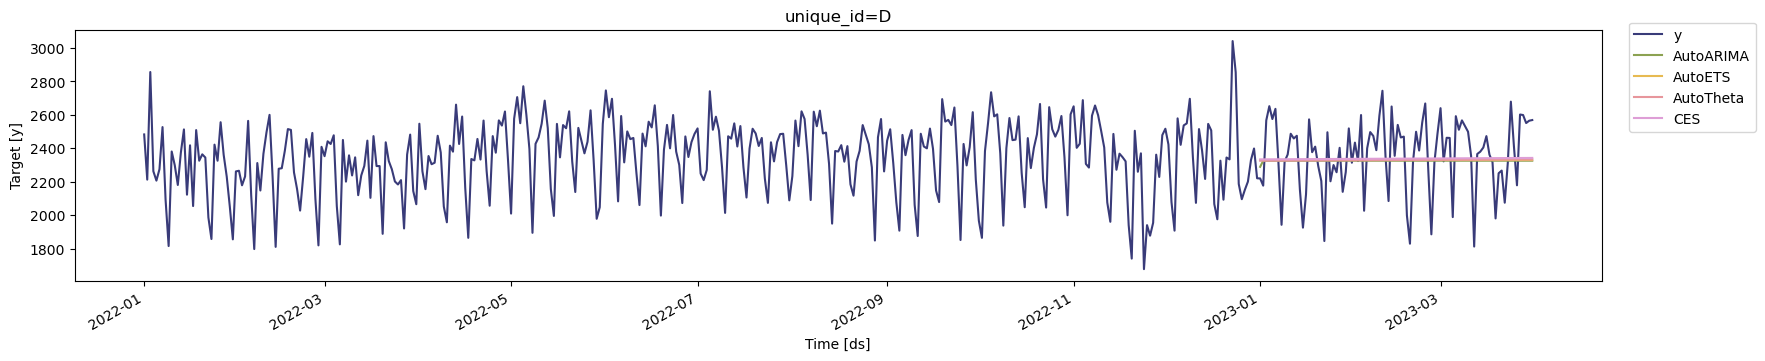

In [65]:
gcod_plot1 = sf.plot(gcodsf, gcod_fcst1)
gcod_plot1

In [66]:
sf_fcst1.fit(df=tr_mcodsf) # Fit the models to the data using the fit method of the StatsForecast object
sf_fcst1.fitted_ # Access fitted models from the StatsForecast object
mcod_fcst1 = sf_fcst1.predict(h=d_horizon) # Predict or forecast 'horizon' steps ahead using the predict method
mcod_fcst1.tail()

ds    AutoARIMA      AutoETS    AutoTheta          CES
unique_id                                                               
D         2023-03-27  1398.980103  1393.602417  1407.976929  1407.076660
D         2023-03-28  1398.980103  1393.602417  1408.129883  1407.220703
D         2023-03-29  1398.980103  1393.602417  1408.282837  1407.364746
D         2023-03-30  1398.980103  1393.602417  1408.435791  1407.508789
D         2023-03-31  1398.980103  1393.602417  1408.588745  1407.652954

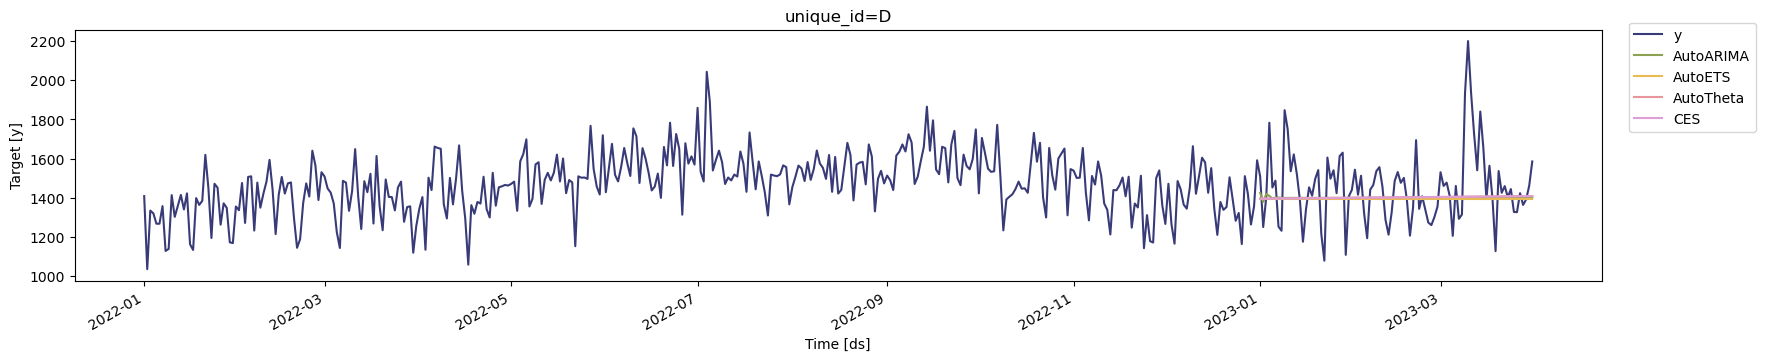

In [67]:
mcod_plot1 = sf.plot(mcodsf, mcod_fcst1)
mcod_plot1

In [68]:
sfmodels2 = [
    Naive(),
    SeasonalNaive(season_length=7),
    HoltWinters()
]

sf_fcst2 = sf(
    models = sfmodels2,
    freq = "D",
    fallback_model = SeasonalNaive(season_length=365),
    n_jobs=-1
)

In [69]:
alxd_fcst2 = sf_fcst2.forecast(df=tr_alxdsf, h=90, level=[90,95])
alxw_fcst2.tail()

ds   Naive  Naive-lo-90  Naive-lo-95  Naive-hi-90  \
unique_id                                                             
W         2023-11-26  4095.0 -1140.107666 -2143.015625  9330.107422   
W         2023-12-03  4095.0 -1194.358887 -2207.659912  9384.359375   
W         2023-12-10  4095.0 -1248.059448 -2271.647949  9438.059570   
W         2023-12-17  4095.0 -1301.225464 -2334.999268  9491.225586   
W         2023-12-24  4095.0 -1353.872803 -2397.732422  9543.873047   

            Naive-hi-95  SeasonalNaive  SeasonalNaive-lo-90  \
unique_id                                                     
W          10333.015625         4325.0          3277.762939   
W          10397.660156         4807.0          3759.762939   
W          10461.648438         4335.0          3287.762939   
W          10524.999023         4325.0          3277.762939   
W          10587.732422         4095.0          3047.762939   

           SeasonalNaive-lo-95  SeasonalNaive-hi-90  SeasonalNaive-hi-95  \
unique_id                                                                  
W                  3077.139893          5372.237305          5572.859863   
W                  3559.139893          5854.237305          6054.859863   
W                  3087.139893          5382.237305          5582.859863   
W                  3077.139893          5372.237305          5572.859863   
W                  2847.139893          5142.237305          5342.859863   

           HoltWinters  HoltWinters-lo-90  HoltWinters-lo-95  \
unique_id                                                      
W               4325.0        2391.979492        2021.664062   
W               4807.0        2873.979492        2503.664062   
W               4335.0        2401.979492        2031.664062   
W               4325.0        2391.979492        2021.664062   
W               4095.0        2161.979492        1791.664062   

           HoltWinters-hi-90  HoltWinters-hi-95  
unique_id                                        
W                6258.020508        6628.335938  
W                6740.020508        7110.335938  
W                6268.020508        6638.335938  
W                6258.020508        6628.335938  
W                6028.020508        6398.335938

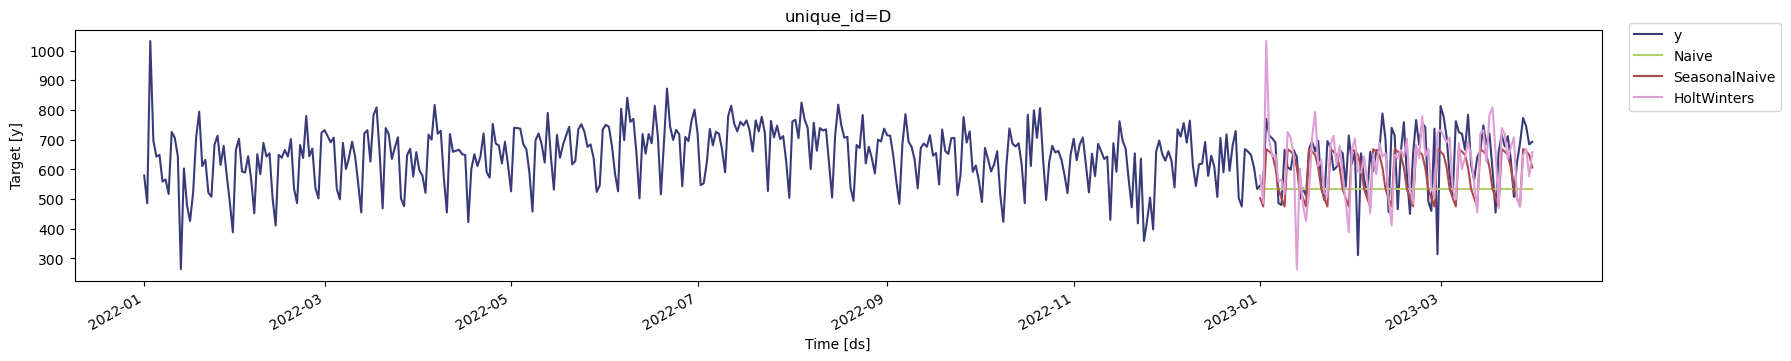

In [70]:
alxd_plot2 = sf.plot(alxdsf, alxd_fcst2)
alxd_plot2

In [71]:
gcod_fcst2 = sf_fcst2.forecast(df=tr_gcodsf, h=90, level=[90,95])
gcod_fcst2.tail()

ds   Naive  Naive-lo-90  Naive-lo-95  Naive-hi-90  \
unique_id                                                             
D         2023-03-27  2221.0 -1904.176758 -2694.451172  6346.176758   
D         2023-03-28  2221.0 -1928.091064 -2722.946777  6370.090820   
D         2023-03-29  2221.0 -1951.868286 -2751.279297  6393.868164   
D         2023-03-30  2221.0 -1975.510742 -2779.450928  6417.510742   
D         2023-03-31  2221.0 -1999.020752 -2807.464844  6441.020996   

           Naive-hi-95  SeasonalNaive  SeasonalNaive-lo-90  \
unique_id                                                    
D          7136.451172         2096.0           885.825439   
D          7164.946777         2152.0           941.825439   
D          7193.279297         2201.0           990.825439   
D          7221.451172         2330.0          1119.825439   
D          7249.464844         2399.0          1188.825439   

           SeasonalNaive-lo-95  SeasonalNaive-hi-90  SeasonalNaive-hi-95  \
unique_id                                                                  
D                   653.988098          3306.174561          3538.011963   
D                   709.988098          3362.174561          3594.011963   
D                   758.988098          3411.174561          3643.011963   
D                   887.988098          3540.174561          3772.011963   
D                   956.988098          3609.174561          3841.011963   

           HoltWinters  HoltWinters-lo-90  HoltWinters-lo-95  \
unique_id                                                      
D               1921.0             1921.0             1921.0   
D               2363.0             2363.0             2363.0   
D               2482.0             2482.0             2482.0   
D               2145.0             2145.0             2145.0   
D               2066.0             2066.0             2066.0   

           HoltWinters-hi-90  HoltWinters-hi-95  
unique_id                                        
D                     1921.0             1921.0  
D                     2363.0             2363.0  
D                     2482.0             2482.0  
D                     2145.0             2145.0  
D                     2066.0             2066.0

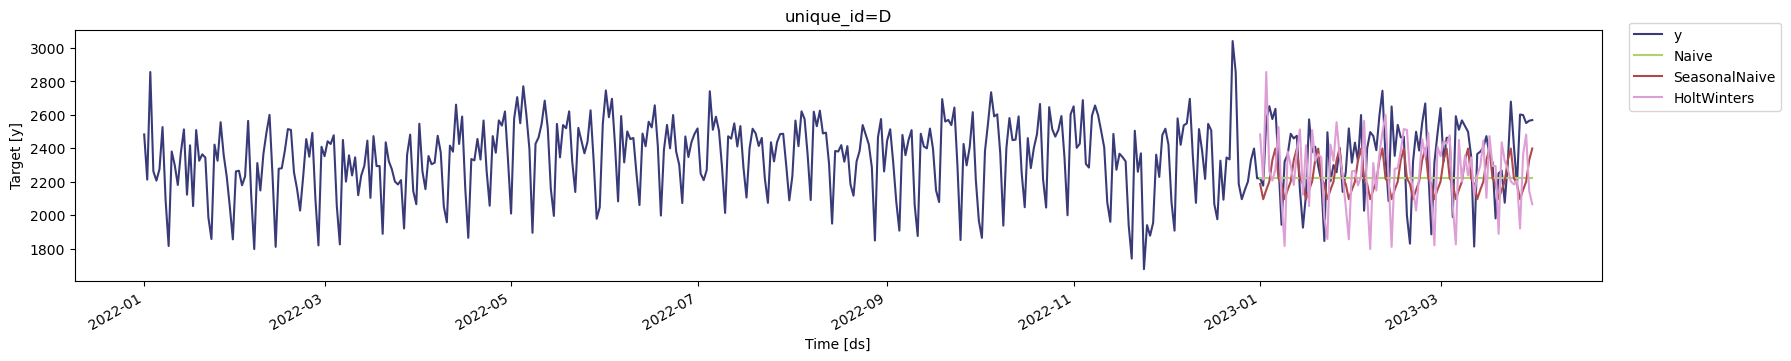

In [72]:
gcod_plot2 =  sf.plot(gcodsf, gcod_fcst2)
gcod_plot2

In [73]:
mcod_fcst2 = sf_fcst2.forecast(df=tr_mcodsf, h=90, level=[90,95])
mcod_fcst2.tail()

ds   Naive  Naive-lo-90  Naive-lo-95  Naive-hi-90  \
unique_id                                                             
D         2023-03-27  1591.0  -840.121216 -1305.859619  4022.121338   
D         2023-03-28  1591.0  -854.214844 -1322.653198  4036.214844   
D         2023-03-29  1591.0  -868.227600 -1339.350464  4050.227539   
D         2023-03-30  1591.0  -882.161011 -1355.953125  4064.161133   
D         2023-03-31  1591.0  -896.016357 -1372.462769  4078.016357   

           Naive-hi-95  SeasonalNaive  SeasonalNaive-lo-90  \
unique_id                                                    
D          4487.859863         1163.0           240.692612   
D          4504.653320         1510.0           587.692627   
D          4521.350586         1418.0           495.692596   
D          4537.953125         1263.0           340.692596   
D          4554.462891         1355.0           432.692596   

           SeasonalNaive-lo-95  SeasonalNaive-hi-90  SeasonalNaive-hi-95  \
unique_id                                                                  
D                    64.002953          2085.307373           2261.99707   
D                   411.002960          2432.307373           2608.99707   
D                   319.002960          2340.307373           2516.99707   
D                   164.002960          2185.307373           2361.99707   
D                   256.002960          2277.307373           2453.99707   

           HoltWinters  HoltWinters-lo-90  HoltWinters-lo-95  \
unique_id                                                      
D               1277.0             1277.0             1277.0   
D               1352.0             1352.0             1352.0   
D               1356.0             1356.0             1356.0   
D               1119.0             1119.0             1119.0   
D               1256.0             1256.0             1256.0   

           HoltWinters-hi-90  HoltWinters-hi-95  
unique_id                                        
D                     1277.0             1277.0  
D                     1352.0             1352.0  
D                     1356.0             1356.0  
D                     1119.0             1119.0  
D                     1256.0             1256.0

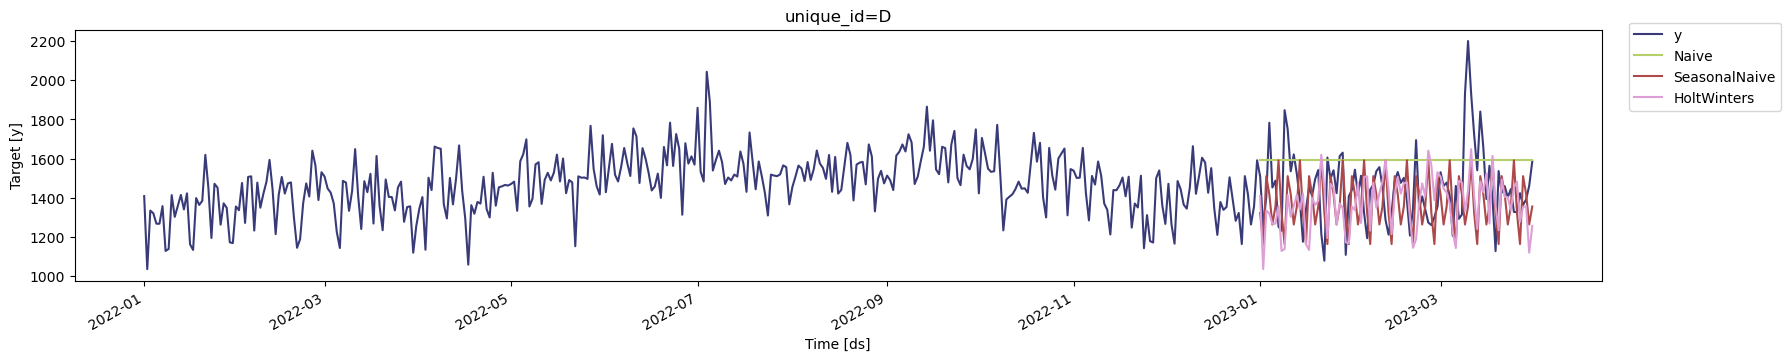

In [74]:
mcod_plot2 = sf.plot(mcodsf, mcod_fcst2)
mcod_plot2

In [75]:
alxd_fcst3 = nixtla_client.forecast(tr_alxdsf, h=90, freq='D', model='timegpt-1-long-horizon', level=[90, 95])
alxd_fcst3.tail()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


unique_id          ds     TimeGPT  TimeGPT-lo-95  TimeGPT-lo-90  \
85         D  2023-03-27  600.153931     483.293584     490.305063   
86         D  2023-03-28  628.425781     536.938451     544.126352   
87         D  2023-03-29  631.109070     579.039027     582.259390   
88         D  2023-03-30  624.247375     589.747105     591.135324   
89         D  2023-03-31  608.094360     554.481317     555.913074   

    TimeGPT-hi-90  TimeGPT-hi-95  
85     710.002798     717.014278  
86     712.725211     719.913112  
87     679.958749     683.179112  
88     657.359427     658.747646  
89     660.275647     661.707404

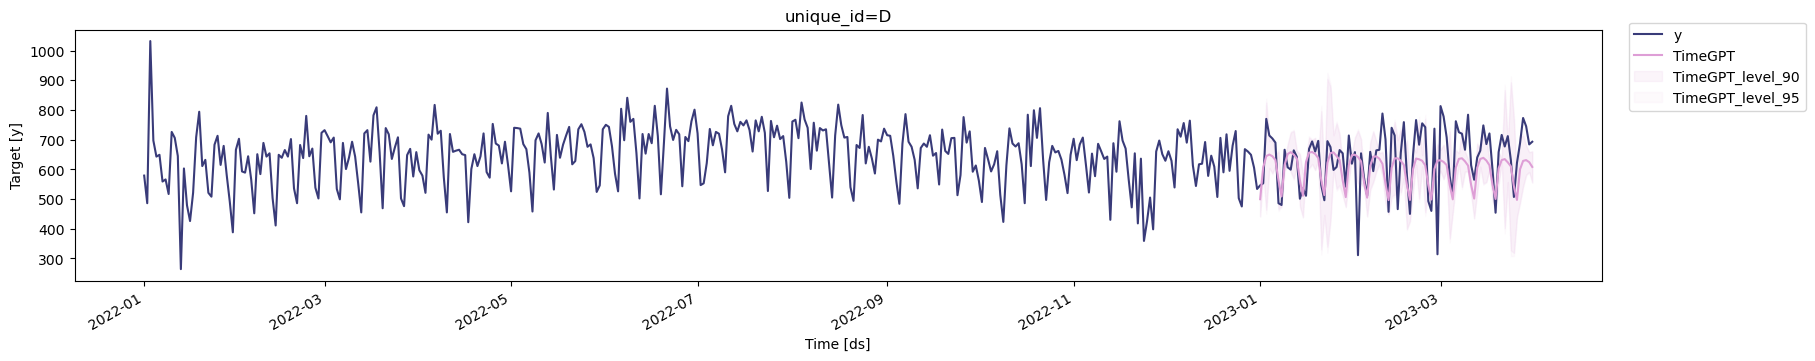

In [76]:
alxd_plot3 = nixtla_client.plot(alxdsf, alxd_fcst3, time_col='ds', target_col='y', level=[90, 95])
alxd_plot3

In [77]:
gcod_fcst3 = nixtla_client.forecast(tr_gcodsf, h=90, freq='D', model='timegpt-1-long-horizon', level=[90, 95])
gcod_fcst3.tail()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


unique_id          ds      TimeGPT  TimeGPT-lo-95  TimeGPT-lo-90  \
85         D  2023-03-27  2302.239258    2209.348627    2216.492908   
86         D  2023-03-28  2366.432129    2185.992523    2197.315857   
87         D  2023-03-29  2369.695068    2127.819183    2130.399597   
88         D  2023-03-30  2369.276367    2177.009015    2191.806848   
89         D  2023-03-31  2337.322266    2177.166028    2188.143091   

    TimeGPT-hi-90  TimeGPT-hi-95  
85    2387.985608    2395.129889  
86    2535.548401    2546.871735  
87    2608.990540    2611.570953  
88    2546.745886    2561.543719  
89    2486.501440    2497.478503

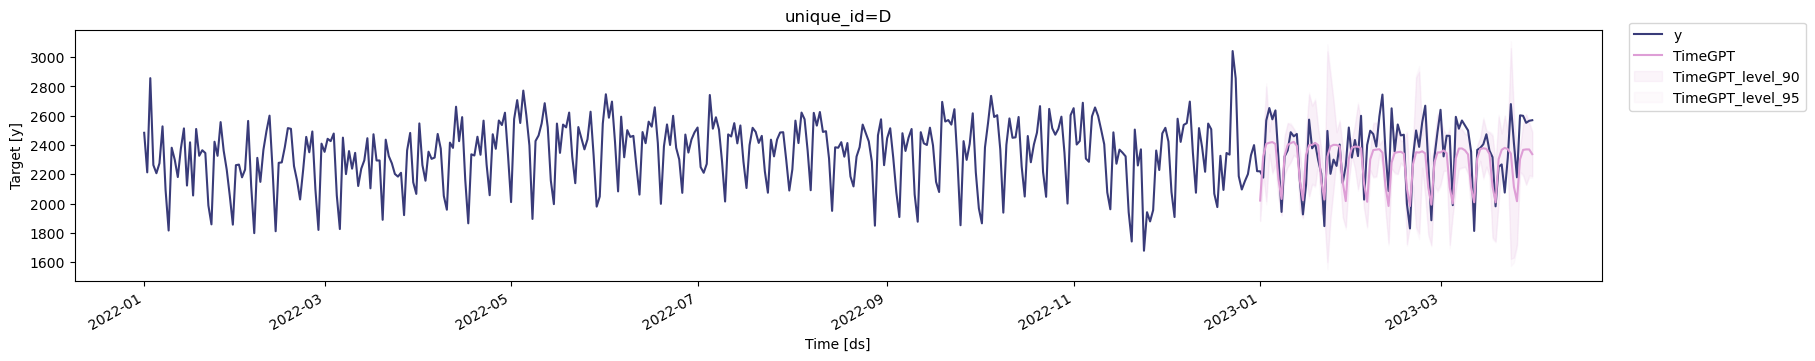

In [78]:
gcod_plot3 = nixtla_client.plot(gcodsf, gcod_fcst3, time_col='ds', target_col='y', level=[90, 95])
gcod_plot3

In [79]:
mcod_fcst3 = nixtla_client.forecast(tr_mcodsf, h=90, freq='D', model='timegpt-1-long-horizon', level=[90, 95])
mcod_fcst3.tail()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


unique_id          ds      TimeGPT  TimeGPT-lo-95  TimeGPT-lo-90  \
85         D  2023-03-27  1442.353638    1194.814240    1211.601624   
86         D  2023-03-28  1479.238892    1398.457538    1402.616614   
87         D  2023-03-29  1476.539673    1266.135367    1282.486310   
88         D  2023-03-30  1473.612793    1301.644739    1312.346851   
89         D  2023-03-31  1467.695190    1140.842429    1143.301068   

    TimeGPT-hi-90  TimeGPT-hi-95  
85    1673.105652    1689.893036  
86    1555.861169    1560.020245  
87    1670.593036    1686.943979  
88    1634.878735    1645.580847  
89    1792.089313    1794.547952

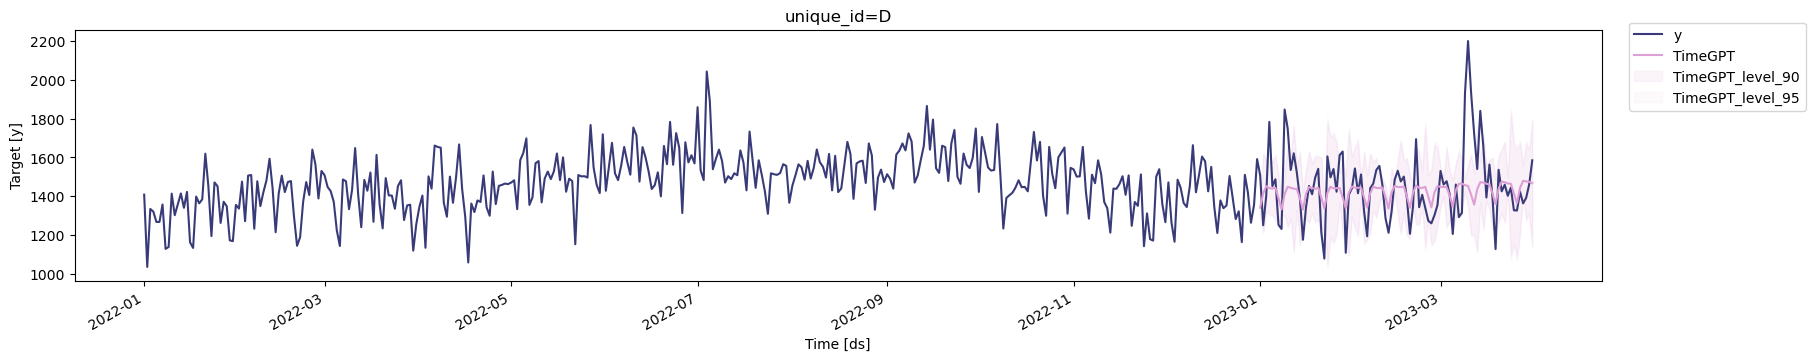

In [80]:
mcod_plot3 = nixtla_client.plot(mcodsf, mcod_fcst3, time_col='ds', target_col='y', level=[90, 95])
mcod_plot3

In [81]:
hour['ds'] = pd.to_datetime(hour['ds'], format = '%Y-%m-%d %H:%M')

alxh = pd.DataFrame(hour, columns=['ds', 'alx'])
alxh.rename(columns={'ds':'ds', 'alx':'y'}, inplace=True)
tr_alxh = alxh[:2184]
tst_alxd = alxh[2184:]

alxhsf = alxh
alxhsf.insert(0, "unique_id", "H")
tr_alxhsf = alxhsf[:2184]
tst_alxhsf = alxhsf[2184:]

gcoh = pd.DataFrame(hour, columns=['ds', 'gco'])
gcoh.rename(columns={'ds':'ds', 'gco':'y'}, inplace=True)
tr_gcoh = gcoh[:2184]
tst_gcoh = gcoh[2184:]

gcohsf = gcoh
gcohsf.insert(0, "unique_id", "H")
tr_gcohsf = gcohsf[:2184]
tst_gcohsf = gcohsf[2184:]

mcoh = pd.DataFrame(hour, columns=['ds', 'mco'])
mcoh.rename(columns={'ds':'ds', 'mco':'y'}, inplace=True)
tr_mcoh = mcoh[:2184]
tst_mcod = mcoh[2184:]

mcohsf = mcoh
mcohsf.insert(0, "unique_id", "H")
tr_mcohsf = mcohsf[:2184]
tst_mcohsf = mcohsf[2184:]


In [82]:
len(alxh) - 2184

744

In [83]:
season_length = 24
h_horizon = 744

sfmodels1 = [
    AutoARIMA(season_length=season_length), # ARIMA model with automatic order selection and seasonal component
    AutoETS(season_length=season_length), # ETS model with automatic error, trend, and seasonal component
    AutoTheta(season_length=season_length), # Theta model with automatic seasonality detection
    AutoCES(season_length=season_length), # CES model with automatic seasonality detection
]

sf_fcst1 = sf(
    models=sfmodels1,
    freq='h',
    n_jobs=-1
)

In [84]:
sf_fcst1.fit(df=tr_alxhsf) # Fit the models to the data using the fit method of the StatsForecast object
sf_fcst1.fitted_ # Access fitted models from the StatsForecast object
alxh_fcst1 = sf_fcst1.predict(h=h_horizon) # Predict or forecast 'horizon' steps ahead using the predict method
alxh_fcst1.tail()

ds  AutoARIMA    AutoETS  AutoTheta        CES
unique_id                                                                
H         2023-07-31 19:00:00  32.213520  34.484985  35.566956  36.765675
H         2023-07-31 20:00:00  25.034349  30.722218  32.823215  31.552776
H         2023-07-31 21:00:00  32.506760  29.831392  31.364601  31.653437
H         2023-07-31 22:00:00  27.907858  27.631405  28.415459  29.057209
H         2023-07-31 23:00:00  22.356733  23.896051  24.407295  24.428297

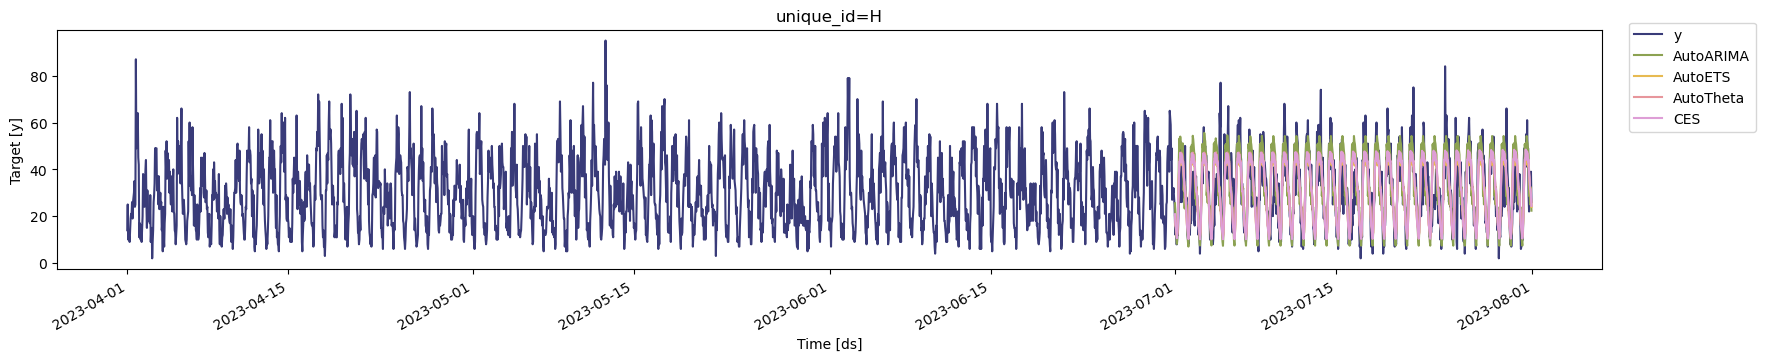

In [85]:
alxh_plot1 = sf.plot(alxhsf, alxh_fcst1)
alxh_plot1

In [86]:
sf_fcst1.fit(df=tr_gcohsf) # Fit the models to the data using the fit method of the StatsForecast object
sf_fcst1.fitted_ # Access fitted models from the StatsForecast object
gcoh_fcst1 = sf_fcst1.predict(h=h_horizon) # Predict or forecast 'horizon' steps ahead using the predict method
gcoh_fcst1.tail()

ds   AutoARIMA     AutoETS   AutoTheta         CES
unique_id                                                                    
H         2023-07-31 19:00:00  132.183792  135.906952  148.468933  126.957115
H         2023-07-31 20:00:00  131.582962  123.825829  134.191208  120.770737
H         2023-07-31 21:00:00  128.306808  119.953735  127.813988  112.521324
H         2023-07-31 22:00:00  107.274216  103.930901  110.207870   99.962494
H         2023-07-31 23:00:00   96.280312   84.788673   88.631165   79.951828

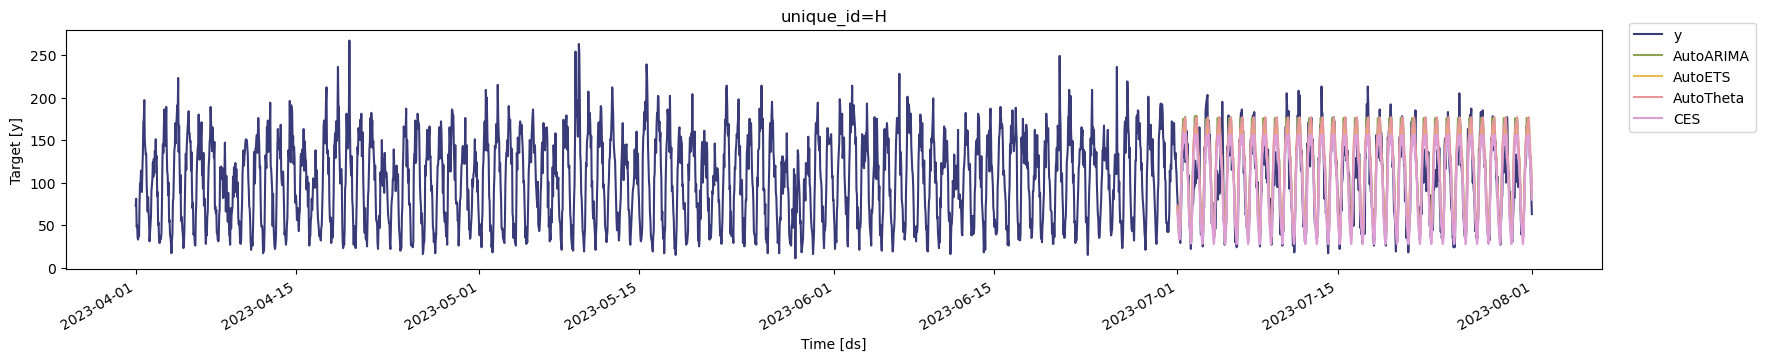

In [87]:
gcoh_plot1 = sf.plot(gcohsf, gcoh_fcst1)
gcoh_plot1

In [88]:
sf_fcst1.fit(df=tr_mcohsf) # Fit the models to the data using the fit method of the StatsForecast object
sf_fcst1.fitted_ # Access fitted models from the StatsForecast object
mcoh_fcst1 = sf_fcst1.predict(h=h_horizon) # Predict or forecast 'horizon' steps ahead using the predict method
mcoh_fcst1.tail()

ds  AutoARIMA    AutoETS   AutoTheta        CES
unique_id                                                                 
H         2023-07-31 19:00:00  76.280029  84.988525  109.670074  77.909317
H         2023-07-31 20:00:00  80.549332  84.854607  102.639664  77.235718
H         2023-07-31 21:00:00  82.185287  76.155930   93.175644  69.095238
H         2023-07-31 22:00:00  62.331940  70.169464   85.411346  62.393661
H         2023-07-31 23:00:00  53.170238  54.069027   60.307022  46.949051

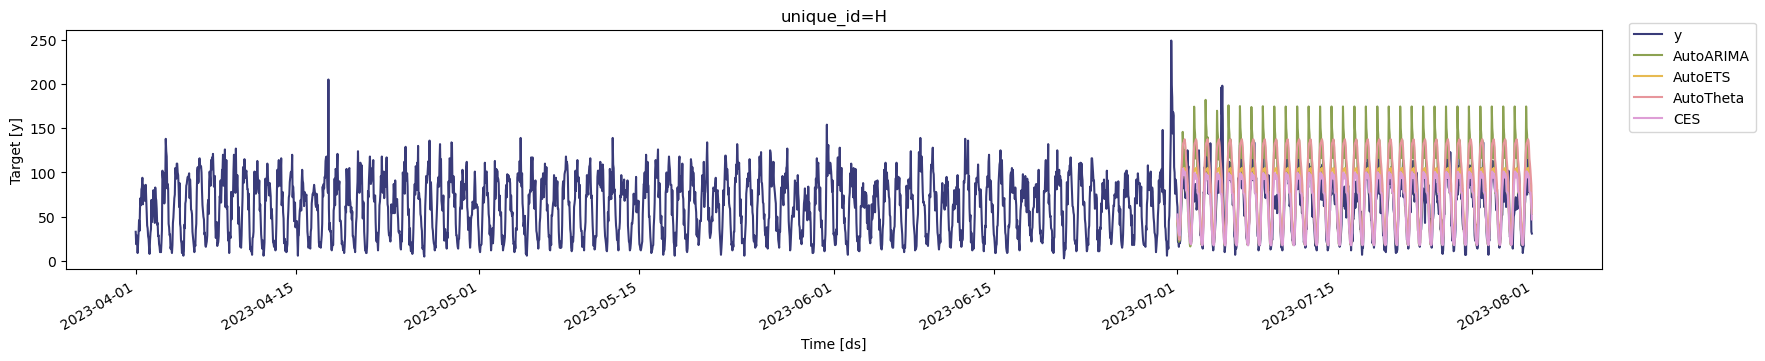

In [89]:
mcoh_plot1 = sf.plot(mcohsf, mcoh_fcst1)
mcoh_plot1

In [90]:
sfmodels2 = [
    Naive(),
    SeasonalNaive(season_length=24),
    HoltWinters()
]

sf_fcst2 = sf(
    models = sfmodels2,
    freq = "h",
    fallback_model = SeasonalNaive(season_length=168),
    n_jobs=-1
)

In [91]:
alxh_fcst2 = sf_fcst2.forecast(df=tr_alxhsf, h=744, level=[90,95])
alxh_fcst2.tail()

ds  Naive  Naive-lo-90  Naive-lo-95  Naive-hi-90  \
unique_id                                                                     
H         2023-07-31 19:00:00   25.0  -477.665894  -573.963379   527.665894   
H         2023-07-31 20:00:00   25.0  -478.005432  -574.367920   528.005432   
H         2023-07-31 21:00:00   25.0  -478.344727  -574.772217   528.344727   
H         2023-07-31 22:00:00   25.0  -478.683777  -575.176270   528.683777   
H         2023-07-31 23:00:00   25.0  -479.022614  -575.580017   529.022644   

           Naive-hi-95  SeasonalNaive  SeasonalNaive-lo-90  \
unique_id                                                    
H           623.963379           31.0             -86.8479   
H           624.367920           30.0             -87.8479   
H           624.772217           32.0             -85.8479   
H           625.176270           28.0             -89.8479   
H           625.580017           25.0             -92.8479   

           SeasonalNaive-lo-95  SeasonalNaive-hi-90  SeasonalNaive-hi-95  \
unique_id                                                                  
H                  -109.424438             148.8479           171.424438   
H                  -110.424438             147.8479           170.424438   
H                  -108.424438             149.8479           172.424438   
H                  -112.424438             145.8479           168.424438   
H                  -115.424438             142.8479           165.424438   

           HoltWinters  HoltWinters-lo-90  HoltWinters-lo-95  \
unique_id                                                      
H                 28.0         -14.573063         -22.728933   
H                 24.0         -18.573063         -26.728933   
H                 35.0          -7.573063         -15.728933   
H                 32.0         -10.573063         -18.728933   
H                 16.0         -26.573063         -34.728935   

           HoltWinters-hi-90  HoltWinters-hi-95  
unique_id                                        
H                  70.573067          78.728935  
H                  66.573067          74.728935  
H                  77.573067          85.728935  
H                  74.573067          82.728935  
H                  58.573063          66.728935

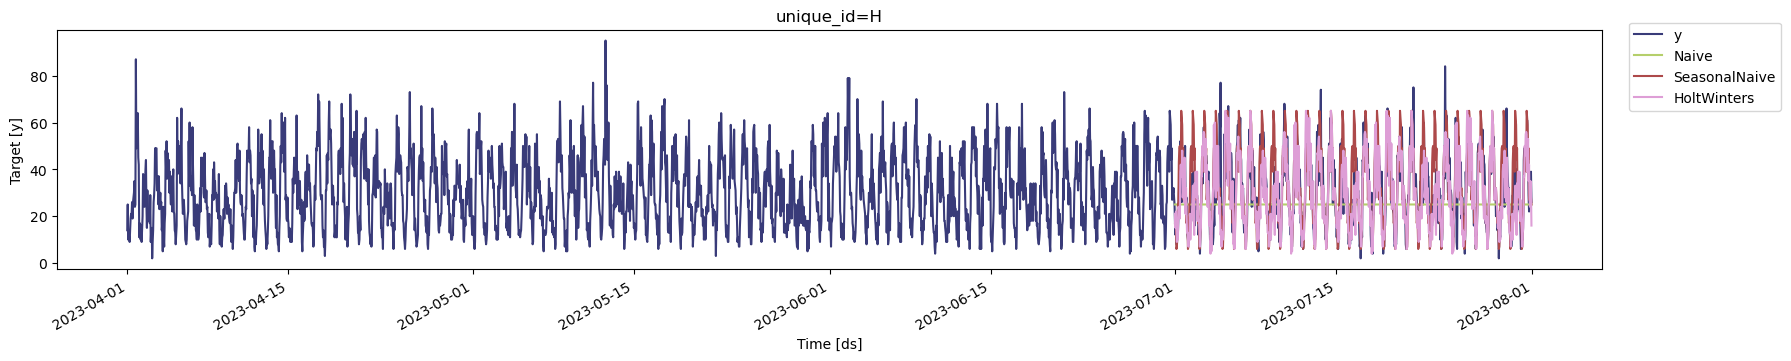

In [92]:
alxh_plot2 = sf.plot(alxhsf, alxh_fcst2)
alxh_plot2

In [94]:
gcoh_fcst2 = sf_fcst2.forecast(df=tr_gcohsf, h=744, level=[90,95])
gcoh_fcst2.tail()

ds  Naive  Naive-lo-90  Naive-lo-95  Naive-hi-90  \
unique_id                                                                     
H         2023-07-31 19:00:00   92.0 -1053.014282 -1272.368652  1237.014282   
H         2023-07-31 20:00:00   92.0 -1053.787720 -1273.290283  1237.787720   
H         2023-07-31 21:00:00   92.0 -1054.560547 -1274.211182  1238.560547   
H         2023-07-31 22:00:00   92.0 -1055.332886 -1275.131470  1239.332886   
H         2023-07-31 23:00:00   92.0 -1056.104736 -1276.051270  1240.104736   

           Naive-hi-95  SeasonalNaive  SeasonalNaive-lo-90  \
unique_id                                                    
H          1456.368652          128.0          -154.383392   
H          1457.290283          135.0          -147.383392   
H          1458.211182          119.0          -163.383392   
H          1459.131470          110.0          -172.383392   
H          1460.051270           92.0          -190.383392   

           SeasonalNaive-lo-95  SeasonalNaive-hi-90  SeasonalNaive-hi-95  \
unique_id                                                                  
H                   -208.48056           410.383392            464.48056   
H                   -201.48056           417.383392            471.48056   
H                   -217.48056           401.383392            455.48056   
H                   -226.48056           392.383392            446.48056   
H                   -244.48056           374.383392            428.48056   

           HoltWinters  HoltWinters-lo-90  HoltWinters-lo-95  \
unique_id                                                      
H                129.0          30.036341          11.077527   
H                141.0          42.036339          23.077526   
H                 97.0          -1.963659         -20.922474   
H                 75.0         -23.963659         -42.922474   
H                 56.0         -42.963661         -61.922474   

           HoltWinters-hi-90  HoltWinters-hi-95  
unique_id                                        
H                 227.963654         246.922470  
H                 239.963654         258.922485  
H                 195.963654         214.922470  
H                 173.963654         192.922470  
H                 154.963654         173.922470

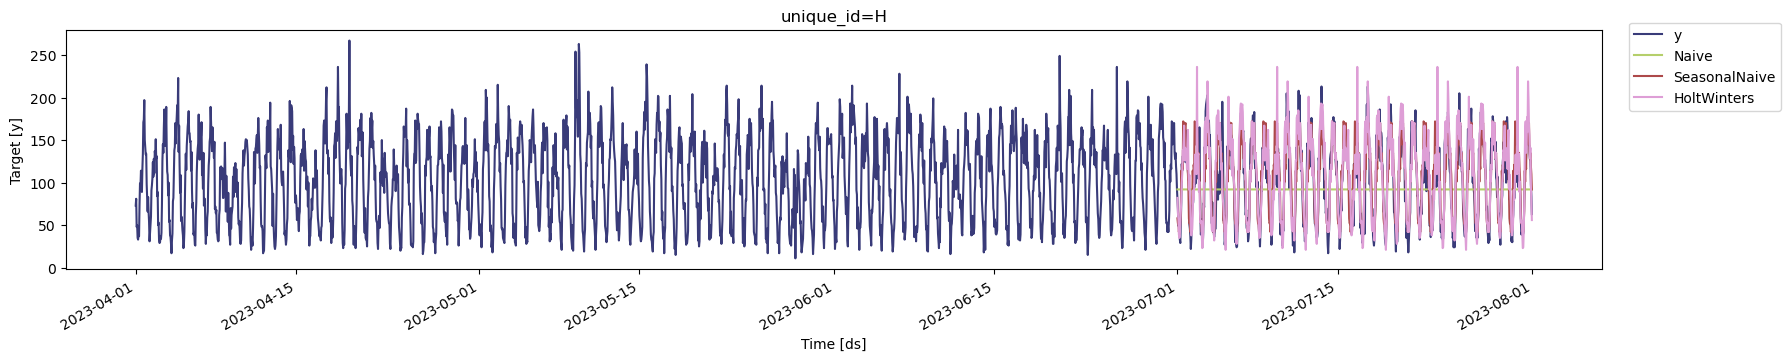

In [95]:
gcoh_plot2 = sf.plot(gcohsf, gcoh_fcst2)
gcoh_plot2

In [96]:
mcoh_fcst2 = sf_fcst2.forecast(df=tr_mcohsf, h=744, level=[90,95])
mcoh_fcst2.tail()

ds  Naive  Naive-lo-90  Naive-lo-95  Naive-hi-90  \
unique_id                                                                     
H         2023-07-31 19:00:00   67.0  -776.209473  -937.746033   910.209473   
H         2023-07-31 20:00:00   67.0  -776.778992  -938.424683   910.778992   
H         2023-07-31 21:00:00   67.0  -777.348145  -939.102844   911.348145   
H         2023-07-31 22:00:00   67.0  -777.916931  -939.780640   911.916931   
H         2023-07-31 23:00:00   67.0  -778.485291  -940.457886   912.485291   

           Naive-hi-95  SeasonalNaive  SeasonalNaive-lo-90  \
unique_id                                                    
H          1071.745972           76.0          -114.590614   
H          1072.424683           92.0           -98.590614   
H          1073.102905           89.0          -101.590614   
H          1073.780640           81.0          -109.590614   
H          1074.457886           67.0          -123.590614   

           SeasonalNaive-lo-95  SeasonalNaive-hi-90  SeasonalNaive-hi-95  \
unique_id                                                                  
H                  -151.102722           266.590607           303.102722   
H                  -135.102722           282.590607           319.102722   
H                  -138.102722           279.590607           316.102722   
H                  -146.102722           271.590607           308.102722   
H                  -160.102722           257.590607           294.102722   

           HoltWinters  HoltWinters-lo-90  HoltWinters-lo-95  \
unique_id                                                      
H                 60.0         -10.973109         -24.569675   
H                 62.0          -8.973109         -22.569675   
H                 62.0          -8.973109         -22.569675   
H                 57.0         -13.973109         -27.569675   
H                 40.0         -30.973110         -44.569675   

           HoltWinters-hi-90  HoltWinters-hi-95  
unique_id                                        
H                 130.973114         144.569672  
H                 132.973114         146.569672  
H                 132.973114         146.569672  
H                 127.973106         141.569672  
H                 110.973106         124.569679

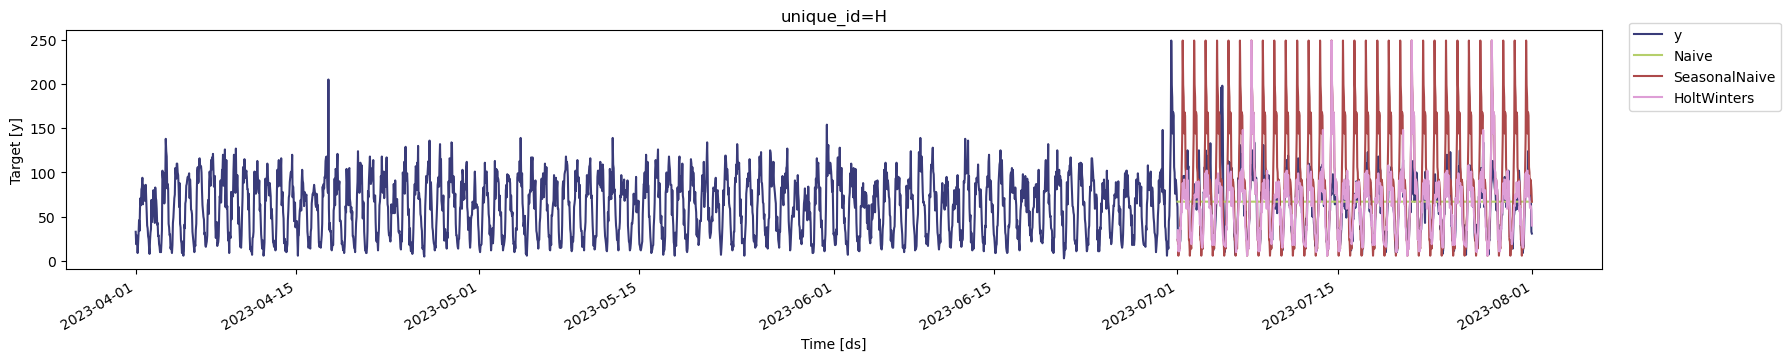

In [97]:
mcoh_plot2 = sf.plot(mcohsf, mcoh_fcst2)
mcoh_plot2

In [98]:
alxh_fcst3 = nixtla_client.forecast(tr_alxhsf, h=744, freq='h', model='timegpt-1-long-horizon', level=[90, 95])
alxh_fcst3.tail()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


unique_id                   ds    TimeGPT  TimeGPT-lo-95  TimeGPT-lo-90  \
739         H  2023-07-31 19:00:00  31.330730      13.422676      16.045440   
740         H  2023-07-31 20:00:00  26.440981      13.513919      13.823124   
741         H  2023-07-31 21:00:00  26.305334      16.777309      17.012603   
742         H  2023-07-31 22:00:00  24.814655       5.948810       9.452643   
743         H  2023-07-31 23:00:00  21.427074      12.745313      13.433405   

     TimeGPT-hi-90  TimeGPT-hi-95  
739      46.616021      49.238785  
740      39.058838      39.368043  
741      35.598065      35.833359  
742      40.176667      43.680501  
743      29.420743      30.108836

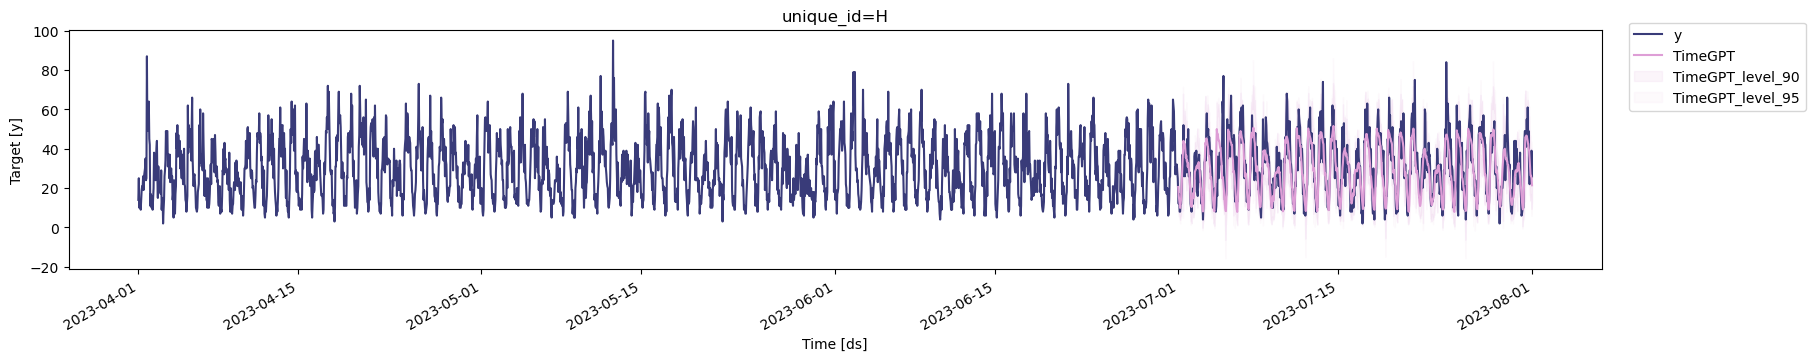

In [99]:
alxh_plot3 = nixtla_client.plot(alxhsf, alxh_fcst3, time_col='ds', target_col='y', level=[90, 95])
alxh_plot3

In [100]:
gcoh_fcst3 = nixtla_client.forecast(tr_gcohsf, h=744, freq='h', model='timegpt-1-long-horizon', level=[90, 95])
gcoh_fcst3.tail()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


unique_id                   ds     TimeGPT  TimeGPT-lo-95  TimeGPT-lo-90  \
739         H  2023-07-31 19:00:00  124.285637      84.648132      91.881050   
740         H  2023-07-31 20:00:00  115.134186      80.305217      82.714865   
741         H  2023-07-31 21:00:00  102.467033      73.204202      74.743578   
742         H  2023-07-31 22:00:00   86.079994      65.401250      67.119989   
743         H  2023-07-31 23:00:00   69.100159      47.879011      50.910259   

     TimeGPT-hi-90  TimeGPT-hi-95  
739     156.690224     163.923141  
740     147.553507     149.963155  
741     130.190489     131.729865  
742     105.039999     106.758739  
743      87.290058      90.321306

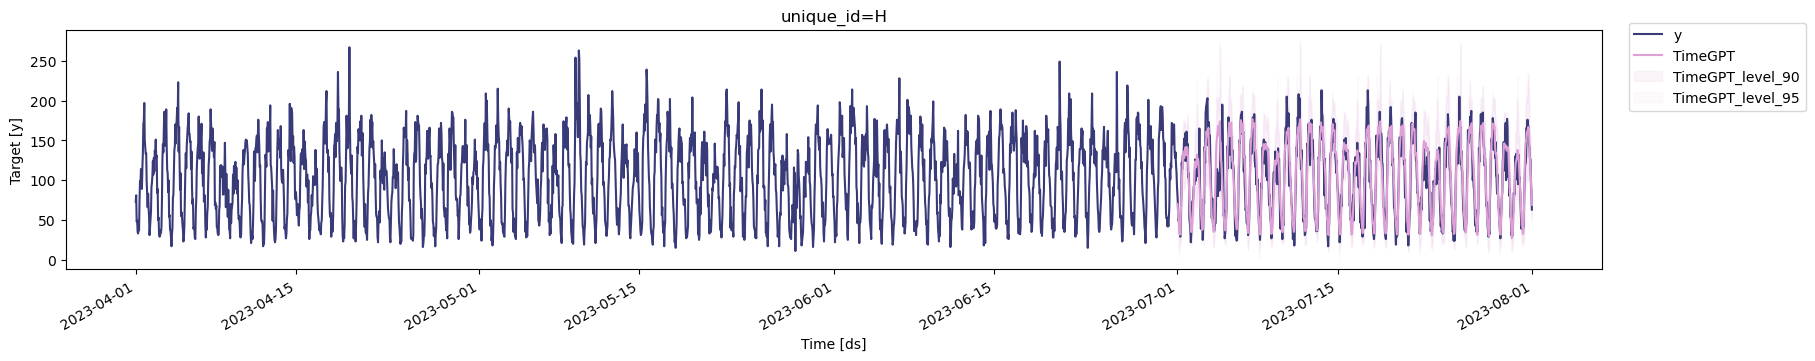

In [101]:
gcoh_plot3 = nixtla_client.plot(gcohsf, gcoh_fcst3, time_col='ds', target_col='y', level=[90, 95])
gcoh_plot3

In [102]:
mcoh_fcst3 = nixtla_client.forecast(tr_mcohsf, h=744, freq='h', model='timegpt-1-long-horizon', level=[90, 95])
mcoh_fcst3.tail()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


unique_id                   ds    TimeGPT  TimeGPT-lo-95  TimeGPT-lo-90  \
739         H  2023-07-31 19:00:00  72.762772      54.276213      56.710651   
740         H  2023-07-31 20:00:00  72.193924      56.137004      60.934896   
741         H  2023-07-31 21:00:00  64.018745      51.487437      52.234911   
742         H  2023-07-31 22:00:00  50.442516      37.816639      39.659412   
743         H  2023-07-31 23:00:00  41.063026      22.131285      24.606510   

     TimeGPT-hi-90  TimeGPT-hi-95  
739      88.814892      91.249331  
740      83.452951      88.250844  
741      75.802580      76.550054  
742      61.225620      63.068394  
743      57.519543      59.994768

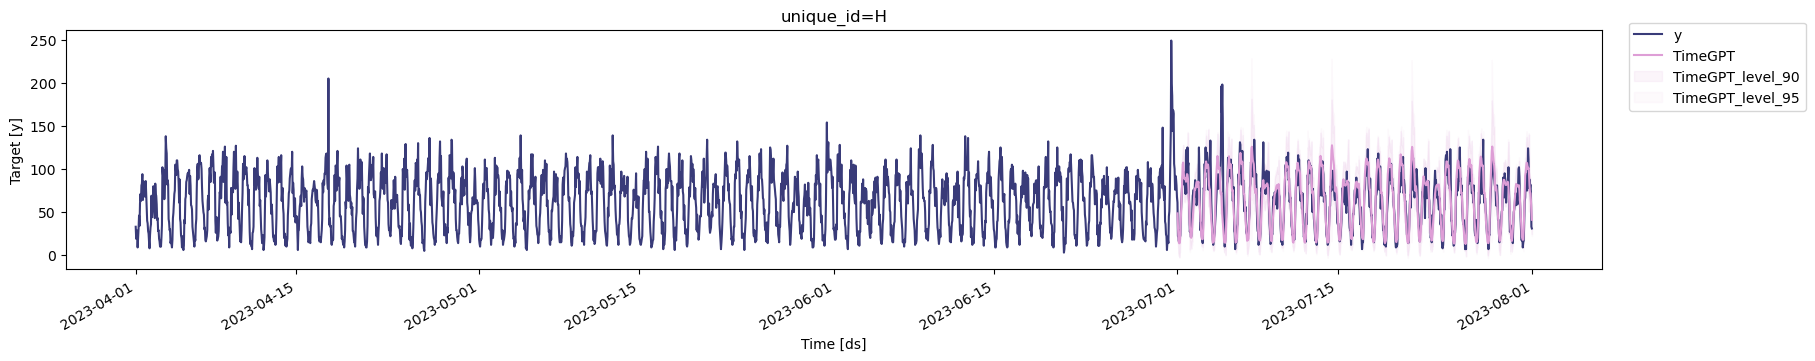

In [103]:
mcoh_plot3 = nixtla_client.plot(mcohsf, mcoh_fcst3, time_col='ds', target_col='y', level=[90, 95])
mcoh_plot3

In [ ]:
!pip install -U scikit-learn # Make sure scikit-learn is updated
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_log_error as mse
from sklearn.metrics import mean_absolute_error as mdae
from math import sqrt # Import the square root function

In [ ]:
alxm_arima_score1 = round(mse(tst_alxmsf['y'], alxm_fcst1['AutoARIMA']), 3)
alxm_arima_score2 = round(mae(tst_alxmsf['y'], alxm_fcst1['AutoARIMA']), 3)
alxm_arima_score3 = round(mdae(tst_alxmsf['y'], alxm_fcst1['AutoARIMA']), 3)
alxm_arima_score4 = round(mape(tst_alxmsf['y'], alxm_fcst1['AutoARIMA']), 3)
alxm_arima_score5 = round(rmse(tst_alxmsf['y'], alxm_fcst1['AutoARIMA']), 3)
alxm_arima_score6 = round(r2(tst_alxmsf['y'], alxm_fcst1['AutoARIMA']), 3)

In [ ]:
gcom_arima_score1 = round(mse(tst_gcomsf['y'], gcom_fcst1['AutoARIMA']), 3)
gcom_arima_score2 = round(mae(tst_gcomsf['y'], gcom_fcst1['AutoARIMA']), 3)
gcom_arima_score3 = round(mdae(tst_gcomsf['y'], gcom_fcst1['AutoARIMA']), 3)
gcom_arima_score4 = round(mape(tst_gcomsf['y'], gcom_fcst1['AutoARIMA']), 3)
gcom_arima_score5 = round(rmse(tst_gcomsf['y'], gcom_fcst1['AutoARIMA']), 3)
gcom_arima_score6 = round(r2(tst_gcomsf['y'], gcom_fcst1['AutoARIMA']), 3)

In [ ]:
mcom_arima_score1 = round(mse(tst_mcomsf['y'], mcom_fcst1['AutoARIMA']), 3)
mcom_arima_score2 = round(mae(tst_mcomsf['y'], mcom_fcst1['AutoARIMA']), 3)
mcom_arima_score3 = round(mdae(tst_mcomsf['y'], mcom_fcst1['AutoARIMA']), 3)
mcom_arima_score4 = round(mape(tst_mcomsf['y'], mcom_fcst1['AutoARIMA']), 3)
mcom_arima_score5 = round(rmse(tst_mcomsf['y'], mcom_fcst1['AutoARIMA']), 3)
mcom_arima_score6 = round(r2(tst_alxmsf['y'], alxm_fcst1['AutoARIMA']), 3)

In [ ]:
!pip install -U tabulate
from tabulate import tabulate

In [ ]:
mn_table = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxm_arima_score1, alxm_arima_score2, alxm_arima_score3, alxm_arima_score4, alxm_arima_score5, alxm_arima_score6],
    ['Greenville County', gcom_arima_score1, gcom_arima_score2, gcom_arima_score3, gcom_arima_score4, gcom_arima_score5, gcom_arima_score6],
    ['Monterey County', mcom_arima_score1, mcom_arima_score2, mcom_arima_score3, mcom_arima_score4, mcom_arima_score5, mcom_arima_score6]
]

In [ ]:
print(tabulate(mn_table, headers='firstrow'))

In [ ]:
alxm_ets_score1 = round(mse(tst_alxmsf['y'], alxm_fcst1['AutoETS']),3)
alxm_ets_score2 = round(mae(tst_alxmsf['y'], alxm_fcst1['AutoETS']),3)
alxm_ets_score3 = round(mdae(tst_alxmsf['y'], alxm_fcst1['AutoETS']),3)
alxm_ets_score4 = round(mape(tst_alxmsf['y'], alxm_fcst1['AutoETS']),3)
alxm_ets_score5 = round(rmse(tst_alxmsf['y'], alxm_fcst1['AutoETS']),3)
alxm_ets_score6 = round(r2(tst_alxmsf['y'], alxm_fcst1['AutoETS']),3)

gcom_ets_score1 = round(mse(tst_gcomsf['y'], gcom_fcst1['AutoETS']),3)
gcom_ets_score2 = round(mae(tst_gcomsf['y'], gcom_fcst1['AutoETS']),3)
gcom_ets_score3 = round(mdae(tst_gcomsf['y'], gcom_fcst1['AutoETS']),3)
gcom_ets_score4 = round(mape(tst_gcomsf['y'], gcom_fcst1['AutoETS']),3)
gcom_ets_score5 = round(rmse(tst_gcomsf['y'], gcom_fcst1['AutoETS']),3)
gcom_ets_score6 = round(r2(tst_gcomsf['y'], gcom_fcst1['AutoETS']),3)

mcom_ets_score1 = round(mse(tst_mcomsf['y'], mcom_fcst1['AutoETS']),3)
mcom_ets_score2 = round(mae(tst_mcomsf['y'], mcom_fcst1['AutoETS']),3)
mcom_ets_score3 = round(mdae(tst_mcomsf['y'], mcom_fcst1['AutoETS']),3)
mcom_ets_score4 = round(mape(tst_mcomsf['y'], mcom_fcst1['AutoETS']),3)
mcom_ets_score5 = round(rmse(tst_mcomsf['y'], mcom_fcst1['AutoETS']),3)
mcom_ets_score6 = round(r2(tst_mcomsf['y'], mcom_fcst1['AutoETS']),3)

mn_table2 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxm_ets_score1, alxm_ets_score2, alxm_ets_score3, alxm_ets_score4, alxm_ets_score5, alxm_ets_score6],
    ['Greenville County', gcom_ets_score1, gcom_ets_score2, gcom_ets_score3, gcom_ets_score4, gcom_ets_score5, gcom_ets_score6],
    ['Monterey County', mcom_ets_score1, mcom_ets_score2, mcom_ets_score3, mcom_ets_score4, mcom_ets_score5, mcom_ets_score6]
]

print(tabulate(mn_table2, headers='firstrow'))

In [ ]:
alxm_theta_score1 = round(mse(tst_alxmsf['y'], alxm_fcst1['AutoTheta']),3)
alxm_theta_score2 = round(mae(tst_alxmsf['y'], alxm_fcst1['AutoTheta']),3)
alxm_theta_score3 = round(mdae(tst_alxmsf['y'], alxm_fcst1['AutoTheta']),3)
alxm_theta_score4 = round(mape(tst_alxmsf['y'], alxm_fcst1['AutoTheta']),3)
alxm_theta_score5 = round(rmse(tst_alxmsf['y'], alxm_fcst1['AutoTheta']),3)
alxm_theta_score6 = round(r2(tst_alxmsf['y'], alxm_fcst1['AutoTheta']),3)

gcom_theta_score1 = round(mse(tst_gcomsf['y'], gcom_fcst1['AutoTheta']),3)
gcom_theta_score2 = round(mae(tst_gcomsf['y'], gcom_fcst1['AutoTheta']),3)
gcom_theta_score3 = round(mdae(tst_gcomsf['y'], gcom_fcst1['AutoTheta']),3)
gcom_theta_score4 = round(mape(tst_gcomsf['y'], mcom_fcst1['AutoTheta']),3)
gcom_theta_score5 = round(rmse(tst_gcomsf['y'], mcom_fcst1['AutoTheta']),3)
gcom_theta_score6 = round(r2(tst_gcomsf['y'], gcom_fcst1['AutoTheta']),3)

mcom_theta_score1 = round(mse(tst_mcomsf['y'], mcom_fcst1['AutoTheta']),3)
mcom_theta_score2 = round(mae(tst_mcomsf['y'], mcom_fcst1['AutoTheta']),3)
mcom_theta_score3 = round(mdae(tst_mcomsf['y'], mcom_fcst1['AutoTheta']),3)
mcom_theta_score4 = round(mape(tst_alxmsf['y'], alxm_fcst1['AutoTheta']), 3)
mcom_theta_score5 = round(rmse(tst_alxmsf['y'], alxm_fcst1['AutoTheta']),3)
mcom_theta_score6 = round(r2(tst_mcomsf['y'], mcom_fcst1['AutoTheta']),3)

mn_table3 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxm_theta_score1, alxm_theta_score2, alxm_theta_score3, alxm_theta_score4, alxm_theta_score5, alxm_theta_score6],
    ['Greenville County', gcom_theta_score1,  gcom_theta_score2, gcom_theta_score3, gcom_theta_score4, gcom_theta_score5, gcom_theta_score6],
    ['Monterey County', mcom_theta_score1, mcom_theta_score2, mcom_theta_score3, mcom_theta_score4, mcom_theta_score5, mcom_theta_score6]
]

print(tabulate(mn_table3, headers='firstrow'))

In [ ]:
alxm_ces_score1 = round(mse(tst_alxmsf['y'], alxm_fcst1['CES']),3)
alxm_ces_score2 = round(mae(tst_alxmsf['y'], alxm_fcst1['CES']),3)
alxm_ces_score3 = round(mdae(tst_alxmsf['y'], alxm_fcst1['CES']),3)
alxm_ces_score4 = round(mape(tst_alxmsf['y'], alxm_fcst1['CES']),3)
alxm_ces_score5 = round(rmse(tst_alxmsf['y'], alxm_fcst1['CES']),3)
alxm_ces_score6 = round(r2(tst_alxmsf['y'], alxm_fcst1['CES']),3)

gcom_ces_score1 = round(mse(tst_gcomsf['y'], gcom_fcst1['CES']),3)
gcom_ces_score2 = round(mae(tst_gcomsf['y'], gcom_fcst1['CES']),3)
gcom_ces_score3 = round(mdae(tst_gcomsf['y'], gcom_fcst1['CES']),3)
gcom_ces_score4 = round(mape(tst_gcomsf['y'], gcom_fcst1['CES']),3)
gcom_ces_score5 = round(rmse(tst_gcomsf['y'], gcom_fcst1['CES']),3)
gcom_ces_score6 = round(r2(tst_gcomsf['y'], gcom_fcst1['CES']),3)

mcom_ces_score1 = round(mse(tst_mcomsf['y'], mcom_fcst1['CES']),3)
mcom_ces_score2 = round(mae(tst_mcomsf['y'], mcom_fcst1['CES']),3)
mcom_ces_score3 = round(mdae(tst_mcomsf['y'], mcom_fcst1['CES']),3)
mcom_ces_score4 = round(mape(tst_mcomsf['y'], mcom_fcst1['CES']),3)
mcom_ces_score5 = round(rmse(tst_mcomsf['y'], mcom_fcst1['CES']),3)
mcom_ces_score6 = round(r2(tst_mcomsf['y'], mcom_fcst1['CES']),3)

mn_table4 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxm_ces_score1, alxm_ces_score2, alxm_ces_score3, alxm_ces_score4, alxm_ces_score5, alxm_ces_score6],
    ['Greenville County', gcom_ces_score1, gcom_ces_score2, gcom_ces_score3, gcom_ces_score4, gcom_ces_score5, gcom_ces_score6],
    ['Monterey County', mcom_ces_score1, mcom_ces_score2, mcom_ces_score3, mcom_ces_score4, mcom_ces_score5, mcom_ces_score6]
]

print(tabulate(mn_table4, headers='firstrow'))

In [ ]:
alxm_n_score1 = round(mse(tst_alxmsf['y'], alxm_fcst2['Naive']), 3)
alxm_n_score2 = round(mae(tst_alxmsf['y'], alxm_fcst2['Naive']), 3)
alxm_n_score3 = round(mdae(tst_alxmsf['y'], alxm_fcst2['Naive']), 3)
alxm_n_score4 = round(mape(tst_alxmsf['y'], alxm_fcst2['Naive']), 3)
alxm_n_score5 = round(rmse(tst_alxmsf['y'], alxm_fcst2['Naive']), 3)
alxm_n_score6 = round(r2(tst_alxmsf['y'], alxm_fcst2['Naive']), 3)

gcom_n_score1 = round(mse(tst_gcomsf['y'], gcom_fcst2['Naive']), 3)
gcom_n_score2 = round(mae(tst_gcomsf['y'], gcom_fcst2['Naive']), 3)
gcom_n_score3 = round(mdae(tst_gcomsf['y'], gcom_fcst2['Naive']), 3)
gcom_n_score4 = round(mape(tst_gcomsf['y'], gcom_fcst2['Naive']), 3)
gcom_n_score5 = round(rmse(tst_gcomsf['y'], gcom_fcst2['Naive']), 3)
gcom_n_score6 = round(r2(tst_gcomsf['y'], gcom_fcst2['Naive']), 3)

mcom_n_score1 = round(mse(tst_mcomsf['y'], mcom_fcst2['Naive']), 3)
mcom_n_score2 = round(mae(tst_mcomsf['y'], mcom_fcst2['Naive']), 3)
mcom_n_score3 = round(mdae(tst_mcomsf['y'], mcom_fcst2['Naive']), 3)
mcom_n_score4 = round(mape(tst_mcomsf['y'], mcom_fcst2['Naive']), 3)
mcom_n_score5 = round(rmse(tst_mcomsf['y'], mcom_fcst2['Naive']), 3)
mcom_n_score6 = round(r2(tst_mcomsf['y'], mcom_fcst2['Naive']), 3)

mn_table5 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxm_n_score1, alxm_n_score2, alxm_n_score3, alxm_n_score4, alxm_n_score5, alxm_n_score6],
    ['Greenville County', gcom_n_score1, gcom_n_score2, gcom_n_score3, gcom_n_score4, gcom_n_score5, gcom_n_score6],
    ['Monterey County', mcom_n_score1, mcom_n_score2, mcom_n_score3, mcom_n_score4, mcom_n_score5, mcom_n_score6]
]

print(tabulate(mn_table5, headers='firstrow'))

In [ ]:
alxm_sn_score1 = round(mse(tst_alxmsf['y'], alxm_fcst2['SeasonalNaive']), 3)
alxm_sn_score2 = round(mae(tst_alxmsf['y'], alxm_fcst2['SeasonalNaive']), 3)
alxm_sn_score3 = round(mdae(tst_alxmsf['y'], alxm_fcst2['SeasonalNaive']), 3)
alxm_sn_score4 = round(mape(tst_alxmsf['y'], alxm_fcst2['SeasonalNaive']), 3)
alxm_sn_score5 = round(rmse(tst_alxmsf['y'], alxm_fcst2['SeasonalNaive']), 3)
alxm_sn_score6 = round(r2(tst_alxmsf['y'], alxm_fcst2['SeasonalNaive']), 3)

gcom_sn_score1 = round(mse(tst_gcomsf['y'], gcom_fcst2['SeasonalNaive']), 3)
gcom_sn_score2 = round(mae(tst_gcomsf['y'], gcom_fcst2['SeasonalNaive']), 3)
gcom_sn_score3 = round(mdae(tst_gcomsf['y'], gcom_fcst2['SeasonalNaive']), 3)
gcom_sn_score4 = round(mape(tst_gcomsf['y'], gcom_fcst2['SeasonalNaive']), 3)
gcom_sn_score5 = round(rmse(tst_gcomsf['y'], gcom_fcst2['SeasonalNaive']), 3)
gcom_sn_score6 = round(r2(tst_gcomsf['y'], gcom_fcst2['SeasonalNaive']), 3)

mcom_sn_score1 = round(mse(tst_mcomsf['y'], mcom_fcst2['SeasonalNaive']), 3)
mcom_sn_score2 = round(mae(tst_mcomsf['y'], mcom_fcst2['SeasonalNaive']), 3)
mcom_sn_score3 = round(mdae(tst_mcomsf['y'], mcom_fcst2['SeasonalNaive']), 3)
mcom_sn_score4 = round(mape(tst_mcomsf['y'], mcom_fcst2['SeasonalNaive']), 3)
mcom_sn_score5 = round(rmse(tst_mcomsf['y'], mcom_fcst2['SeasonalNaive']), 3)
mcom_sn_score6 = round(r2(tst_mcomsf['y'], mcom_fcst2['SeasonalNaive']), 3)

mn_table6 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxm_sn_score1, alxm_sn_score2, alxm_sn_score3, alxm_sn_score4, alxm_sn_score5, alxm_sn_score6],
    ['Greenville County', gcom_sn_score1, gcom_sn_score2, gcom_sn_score3, gcom_sn_score4, gcom_sn_score5, gcom_sn_score6],
    ['Monterey County', mcom_sn_score1, mcom_sn_score2, mcom_sn_score3, mcom_sn_score4, mcom_sn_score5, mcom_sn_score6]
]

print(tabulate(mn_table6, headers='firstrow'))

In [ ]:
alxm_hw_score1 = round(mse(tst_alxmsf['y'], alxm_fcst2['HoltWinters']), 3)
alxm_hw_score2 = round(mae(tst_alxmsf['y'], alxm_fcst2['HoltWinters']), 3)
alxm_hw_score3 = round(mdae(tst_alxmsf['y'], alxm_fcst2['HoltWinters']), 3)
alxm_hw_score4 = round(mape(tst_alxmsf['y'], alxm_fcst2['HoltWinters']), 3)
alxm_hw_score5 = round(rmse(tst_alxmsf['y'], alxm_fcst2['HoltWinters']), 3)
alxm_hw_score6 = round(r2(tst_alxmsf['y'], alxm_fcst2['HoltWinters']), 3)

gcom_hw_score1 = round(mse(tst_gcomsf['y'], gcom_fcst2['HoltWinters']), 3)
gcom_hw_score2 = round(mae(tst_gcomsf['y'], gcom_fcst2['HoltWinters']), 3)
gcom_hw_score3 = round(mdae(tst_gcomsf['y'], gcom_fcst2['HoltWinters']), 3)
gcom_hw_score4 = round(mape(tst_gcomsf['y'], gcom_fcst2['HoltWinters']), 3)
gcom_hw_score5 = round(rmse(tst_gcomsf['y'], gcom_fcst2['HoltWinters']), 3)
gcom_hw_score6 = round(r2(tst_gcomsf['y'], gcom_fcst2['HoltWinters']), 3)

mcom_hw_score1 = round(mse(tst_mcomsf['y'], mcom_fcst2['HoltWinters']), 3)
mcom_hw_score2 = round(mae(tst_mcomsf['y'], mcom_fcst2['HoltWinters']), 3)
mcom_hw_score3 = round(mdae(tst_mcomsf['y'], mcom_fcst2['HoltWinters']), 3)
mcom_hw_score4 = round(mape(tst_mcomsf['y'], mcom_fcst2['HoltWinters']), 3)
mcom_hw_score5 = round(rmse(tst_mcomsf['y'], mcom_fcst2['HoltWinters']), 3)
mcom_hw_score6 = round(r2(tst_mcomsf['y'], mcom_fcst2['HoltWinters']), 3)

mn_table7 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxm_hw_score1, alxm_hw_score2, alxm_hw_score3, mcom_hw_score4, mcom_hw_score5, mcom_hw_score6],
    ['Greenville County', gcom_hw_score1, gcom_hw_score2, gcom_hw_score3, gcom_hw_score4, gcom_hw_score5, gcom_hw_score6],
    ['Monterey County', mcom_hw_score1, mcom_hw_score2, mcom_hw_score3, mcom_hw_score4, mcom_hw_score5, mcom_hw_score6]
]

print(tabulate(mn_table7, headers='firstrow'))

In [ ]:
alxm_gpt_score1 = round(mse(tst_alxmsf['y'], alxm_fcst3['TimeGPT']), 3)
alxm_gpt_score2 = round(mae(tst_alxmsf['y'], alxm_fcst3['TimeGPT']), 3)
alxm_gpt_score3 = round(mdae(tst_alxmsf['y'], alxm_fcst3['TimeGPT']), 3)
alxm_gpt_score4 = round(mape(tst_alxmsf['y'], alxm_fcst3['TimeGPT']), 3)
alxm_gpt_score5 = round(rmse(tst_alxmsf['y'], alxm_fcst3['TimeGPT']), 3)
alxm_gpt_score6 = round(r2(tst_alxmsf['y'], alxm_fcst3['TimeGPT']), 3)

gcom_gpt_score1 = round(mse(tst_gcomsf['y'], gcom_fcst3['TimeGPT']), 3)
gcom_gpt_score2 = round(mae(tst_gcomsf['y'], gcom_fcst3['TimeGPT']), 3)
gcom_gpt_score3 = round(mdae(tst_gcom['y'], gcom_fcst3['TimeGPT']), 3)
gcom_gpt_score4 = round(mape(tst_gcomsf['y'], gcom_fcst3['TimeGPT']), 3)
gcom_gpt_score5 = round(rmse(tst_gcomsf['y'], gcom_fcst3['TimeGPT']), 3)
gcom_gpt_score6 = round(r2(tst_gcomsf['y'], gcom_fcst3['TimeGPT']), 3)

mcom_gpt_score1 = round(mse(tst_mcomsf['y'], mcom_fcst3['TimeGPT']), 3)
mcom_gpt_score2 = round(mae(tst_mcomsf['y'], mcom_fcst3['TimeGPT']), 3)
mcom_gpt_score3 = round(mdae(tst_mcomsf['y'], mcom_fcst3['TimeGPT']), 3)
mcom_gpt_score4 = round(mape(tst_mcomsf['y'], mcom_fcst3['TimeGPT']),3)
mcom_gpt_score5 = round(rmse(tst_mcomsf['y'], mcom_fcst3['TimeGPT']),3)
mcom_gpt_score6 = round(r2(tst_mcomsf['y'], mcom_fcst3['TimeGPT']),3)

mn_table8 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxm_gpt_score1, alxm_gpt_score2, alxm_gpt_score3, alxm_gpt_score4, alxm_gpt_score5, alxm_gpt_score6],
    ['Greenville County', gcom_gpt_score1, gcom_gpt_score2, gcom_gpt_score3, gcom_gpt_score4, gcom_gpt_score5, gcom_gpt_score6],
    ['Monterey County', mcom_gpt_score1, mcom_gpt_score2, mcom_gpt_score3, mcom_gpt_score4, mcom_gpt_score5, mcom_gpt_score6]
]

print(tabulate(mn_table8, headers='firstrow'))

In [ ]:
alxw_arima_score1 = round(mse(tst_alxwsf['y'], alxw_fcst1['AutoARIMA']), 3)
alxw_arima_score2 = round(mae(tst_alxwsf['y'], alxw_fcst1['AutoARIMA']), 3)
alxw_arima_score3 = round(mdae(tst_alxwsf['y'], alxw_fcst1['AutoARIMA']), 3)
alxw_arima_score4 = round(mape(tst_alxwsf['y'], alxw_fcst1['AutoARIMA']), 3)
alxw_arima_score5 = round(rmse(tst_alxwsf['y'], alxw_fcst1['AutoARIMA']), 3)
alxw_arima_score6 = round(r2(tst_alxwsf['y'], alxw_fcst1['AutoARIMA']), 3)

gcow_arima_score1 = round(mse(tst_gcowsf['y'], gcow_fcst1['AutoARIMA']), 3)
gcow_arima_score2 = round(mae(tst_gcowsf['y'], gcow_fcst1['AutoARIMA']), 3)
gcow_arima_score3 = round(mdae(tst_gcowsf['y'], gcow_fcst1['AutoARIMA']), 3)
gcow_arima_score4 = round(mape(tst_gcowsf['y'], gcow_fcst1['AutoARIMA']), 3)
gcow_arima_score5 = round(rmse(tst_gcowsf['y'], gcow_fcst1['AutoARIMA']), 3)
gcow_arima_score6 = round(r2(tst_gcowsf['y'], gcow_fcst1['AutoARIMA']), 3)

mcow_arima_score1 = round(mse(tst_mcowsf['y'], mcow_fcst1['AutoARIMA']), 3)
mcow_arima_score2 = round(mae(tst_mcowsf['y'], mcow_fcst1['AutoARIMA']), 3)
mcow_arima_score3 = round(mdae(tst_mcowsf['y'], mcow_fcst1['AutoARIMA']), 3)
mcow_arima_score4 = round(mape(tst_mcowsf['y'], mcow_fcst1['AutoARIMA']), 3)
mcow_arima_score5 = round(rmse(tst_mcowsf['y'], mcow_fcst1['AutoARIMA']), 3)
mcow_arima_score6 = round(r2(tst_mcowsf['y'], mcow_fcst1['AutoARIMA']), 3)

wk_table1 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxw_arima_score1, alxw_arima_score2, alxw_arima_score3, alxw_arima_score4, alxw_arima_score5, alxw_arima_score6],
    ['Greenville County', gcow_arima_score1, gcow_arima_score2, gcow_arima_score3, gcow_arima_score4, gcow_arima_score5, gcow_arima_score6],
    ['Monterey County', mcow_arima_score1, mcow_arima_score2, mcow_arima_score3, mcow_arima_score4, mcow_arima_score5, mcom_arima_score6]
  ]

print(tabulate(wk_table1, headers='firstrow'))


In [ ]:
alxw_ets_score1 = round(mse(tst_alxwsf['y'], alxw_fcst1['AutoETS']),3)
alxw_ets_score2 = round(mae(tst_alxwsf['y'], alxw_fcst1['AutoETS']),3)
alxw_ets_score3 = round(mdae(tst_alxwsf['y'], alxw_fcst1['AutoETS']), 3)
alxw_ets_score4 = round(mape(tst_alxwsf['y'], alxw_fcst1['AutoETS']), 3)
alxw_ets_score5 = round(rmse(tst_alxwsf['y'], alxw_fcst1['AutoETS']), 3)
alxw_ets_score6 = round(r2(tst_alxwsf['y'], alxw_fcst1['AutoETS']), 3)

gcow_ets_score1 = round(mse(tst_gcowsf['y'], gcow_fcst1['AutoETS']),3)
gcow_ets_score2 = round(mae(tst_gcowsf['y'], gcow_fcst1['AutoETS']),3)
gcow_ets_score3 = round(mdae(tst_gcowsf['y'], gcow_fcst1['AutoETS']),3)
gcow_ets_score4 = round(mape(tst_gcowsf['y'], gcow_fcst1['AutoETS']),3)
gcow_ets_score5 = round(rmse(tst_gcowsf['y'], gcow_fcst1['AutoETS']), 3)
gcow_ets_score6 = round(r2(tst_gcowsf['y'], gcow_fcst1['AutoETS']), 3)

mcow_ets_score1 = round(mse(tst_mcowsf['y'], mcow_fcst1['AutoETS']),3)
mcow_ets_score2 = round(mae(tst_mcowsf['y'], mcow_fcst1['AutoETS']),3)
mcow_ets_score3 = round(mdae(tst_mcowsf['y'], mcow_fcst1['AutoETS']),3)
mcow_ets_score4 = round(mape(tst_mcowsf['y'], mcow_fcst1['AutoETS']),3)
mcow_ets_score5 = round(rmse(tst_mcowsf['y'], mcow_fcst1['AutoETS']),3)
mcow_ets_score6 = round(r2(tst_mcowsf['y'], mcow_fcst1['AutoETS']),3)

wk_table2 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxw_ets_score1, alxw_ets_score2, alxw_ets_score3, alxw_ets_score4, alxw_ets_score5, alxw_ets_score6],
    ['Greenville County', gcow_ets_score1, gcow_ets_score2, gcow_ets_score3, gcow_ets_score4, gcow_ets_score5, gcow_ets_score6],
    ['Monterey County', mcow_ets_score1, mcow_ets_score2, mcow_ets_score3, mcow_ets_score4, mcow_ets_score5, mcow_ets_score6]
  ]

print(tabulate(wk_table2, headers='firstrow'))

In [ ]:
alxw_theta_score1 = round(mse(tst_alxwsf['y'], alxw_fcst1['AutoTheta']),3)
alxw_theta_score2 = round(mae(tst_alxwsf['y'], alxw_fcst1['AutoTheta']),3)
alxw_theta_score3 = round(mdae(tst_alxwsf['y'], alxw_fcst1['AutoTheta']),3)
alxw_theta_score4 = round(mape(tst_alxwsf['y'], alxw_fcst1['AutoTheta']),3)
alxw_theta_score5 = round(rmse(tst_alxwsf['y'], alxw_fcst1['AutoTheta']),3)
alxw_theta_score6 = round(r2(tst_alxmsf['y'], alxm_fcst1['AutoTheta']),3)

gcow_theta_score1 = round(mse(tst_gcowsf['y'], gcow_fcst1['AutoTheta']),3)
gcow_theta_score2 = round(mae(tst_gcowsf['y'], gcow_fcst1['AutoTheta']),3)
gcow_theta_score3 = round(mdae(tst_gcowsf['y'], gcow_fcst1['AutoTheta']),3)
gcow_theta_score4 = round(mape(tst_gcowsf['y'], gcow_fcst1['AutoTheta']),3)
gcow_theta_score5 = round(rmse(tst_gcowsf['y'], gcow_fcst1['AutoTheta']),3)
gcow_theta_score6 = round(r2(tst_gcowsf['y'], gcow_fcst1['AutoTheta']),3)

mcow_theta_score1 = round(mse(tst_mcowsf['y'], mcow_fcst1['AutoTheta']),3)
mcow_theta_score2 = round(mae(tst_mcowsf['y'], mcow_fcst1['AutoTheta']),3)
mcow_theta_score3 = round(mdae(tst_mcowsf['y'], mcow_fcst1['AutoTheta']),3)
mcow_theta_score4 = round(mape(tst_mcowsf['y'], mcow_fcst1['AutoTheta']), 3)
mcow_theta_score5 = round(rmse(tst_mcowsf['y'], mcow_fcst1['AutoTheta']),3)
mcow_theta_score6 = round(r2(tst_mcowsf['y'], mcow_fcst1['AutoTheta']),3)

wk_table3 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxw_theta_score1, alxw_theta_score2, alxw_theta_score3, alxw_theta_score4, alxw_theta_score5, alxw_theta_score6],
    ['Greenville County', gcow_theta_score1, gcow_theta_score2, gcow_theta_score3, gcow_theta_score4, gcow_theta_score5, gcow_theta_score6],
    ['Monterey County', mcom_theta_score1, mcom_theta_score2, mcom_theta_score3, mcom_theta_score4, mcom_theta_score5, mcom_theta_score6]
  ]

print(tabulate(wk_table3, headers='firstrow'))

In [ ]:
alxw_ces_score1 = round(mse(tst_alxwsf['y'], alxw_fcst1['CES']),3)
alxw_ces_score2 = round(mae(tst_alxwsf['y'], alxw_fcst1['CES']),3)
alxw_ces_score3 = round(mdae(tst_alxwsf['y'], alxw_fcst1['CES']),3)
alxw_ces_score4 = round(mape(tst_alxwsf['y'], alxw_fcst1['CES']),3)
alxw_ces_score5 = round(rmse(tst_alxwsf['y'], alxw_fcst1['CES']),3)
alxw_ces_score6 = round(r2(tst_alxwsf['y'], alxw_fcst1['CES']), 3)

gcow_ces_score1 = round(mse(tst_gcowsf['y'], gcow_fcst1['CES']),3)
gcow_ces_score2 = round(mae(tst_gcowsf['y'], gcow_fcst1['CES']),3)
gcow_ces_score3 = round(mdae(tst_gcowsf['y'], gcow_fcst1['CES']), 3)
gcow_ces_score4 = round(mape(tst_gcowsf['y'], gcow_fcst1['CES']),3)
gcow_ces_score5 = round(rmse(tst_gcowsf['y'], gcow_fcst1['CES']),3)
gcow_ces_score6 = round(r2(tst_gcowsf['y'], gcow_fcst1['CES']),3)

mcow_ces_score1 = round(mse(tst_mcowsf['y'], mcow_fcst1['CES']),3)
mcow_ces_score2 = round(mae(tst_mcowsf['y'], mcow_fcst1['CES']),3)
mcow_ces_score3 = round(mdae(tst_mcowsf['y'], mcow_fcst1['CES']),3)
mcow_ces_score4 = round(mape(tst_mcowsf['y'], mcow_fcst1['CES']),3)
mcow_ces_score5 = round(rmse(tst_mcowsf['y'], mcow_fcst1['CES']),3)
mcow_ces_score6 = round(r2(tst_mcowsf['y'], mcow_fcst1['CES']),3)

wk_table4 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxw_ces_score1, alxw_ces_score2, alxw_ces_score3, alxw_ces_score4, alxw_ces_score5, alxw_ces_score6],
    ['Greenville County', gcow_ces_score1, gcow_ces_score2, gcow_ces_score3, gcow_ces_score4, gcow_ces_score5, gcow_ces_score6],
    ['Monterey County', mcow_ces_score1, mcow_ces_score2, mcow_ces_score3, mcow_ces_score4, mcow_ces_score5, mcow_ces_score6]
]

print(tabulate(wk_table4, headers='firstrow'))

In [ ]:
alxw_n_score1 = round(mse(tst_alxwsf['y'], alxw_fcst2['Naive']),3)
alxw_n_score2 = round(mae(tst_alxwsf['y'], alxw_fcst2['Naive']),3)
alxw_n_score3 = round(mdae(tst_alxwsf['y'], alxw_fcst2['Naive']),3)
alxw_n_score4 = round(mape(tst_alxwsf['y'], alxw_fcst2['Naive']),3)
alxw_n_score5 = round(rmse(tst_alxwsf['y'], alxw_fcst2['Naive']),3)
alxw_n_score6 = round(r2(tst_alxwsf['y'], alxw_fcst2['Naive']),3)

gcow_n_score1 = round(mse(tst_gcowsf['y'], gcow_fcst2['Naive']),3)
gcow_n_score2 = round(mae(tst_gcowsf['y'], gcow_fcst2['Naive']),3)
gcow_n_score3 = round(mdae(tst_gcowsf['y'], gcow_fcst2['Naive']),3)
gcow_n_score4 = round(mape(tst_gcowsf['y'], gcow_fcst2['Naive']),3)
gcow_n_score5 = round(rmse(tst_gcowsf['y'], gcow_fcst2['Naive']),3)
gcow_n_score6 = round(r2(tst_gcowsf['y'], gcow_fcst2['Naive']), 3)

mcow_n_score1 = round(mse(tst_mcowsf['y'], mcow_fcst2['Naive']),3)
mcow_n_score2 = round(mae(tst_mcowsf['y'], mcow_fcst2['Naive']),3)
mcow_n_score3 = round(mdae(tst_mcowsf['y'], mcow_fcst2['Naive']),3)
mcow_n_score4 = round(mape(tst_mcowsf['y'], mcow_fcst2['Naive']),3)
mcow_n_score5 = round(rmse(tst_mcowsf['y'], mcow_fcst2['Naive']),3)
mcow_n_score6 = round(r2(tst_mcowsf['y'], mcow_fcst2['Naive']),3)

wk_table5 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxw_n_score1, alxw_n_score2, alxw_n_score3, alxw_n_score4, alxw_n_score5, alxw_n_score6],
    ['Greenville County', gcow_n_score1, gcow_n_score2, gcow_n_score3, gcow_n_score4, gcow_n_score5, gcow_n_score6],
    ['Monterey County', mcow_n_score1, mcow_n_score2, mcow_n_score3, mcow_n_score4, mcow_n_score5, mcow_n_score6]
]

print(tabulate(wk_table5, headers='firstrow'))

In [ ]:
alxw_sn_score1 = round(mse(tst_alxwsf['y'], alxw_fcst2['SeasonalNaive']),3)
alxw_sn_score2 = round(mae(tst_alxwsf['y'], alxw_fcst2['SeasonalNaive']),3)
alxw_sn_score3 = round(mdae(tst_alxwsf['y'], alxw_fcst2['SeasonalNaive']),3)
alxw_sn_score4 = round(mape(tst_alxwsf['y'], alxw_fcst2['SeasonalNaive']),3)
alxw_sn_score5 = round(rmse(tst_alxwsf['y'], alxw_fcst2['SeasonalNaive']),3)
alxw_sn_score6 = round(r2(tst_alxwsf['y'], alxw_fcst2['SeasonalNaive']),3)

gcow_sn_score1 = round(mse(tst_gcowsf['y'], gcow_fcst2['SeasonalNaive']),3)
gcow_sn_score2 = round(mae(tst_gcowsf['y'], gcow_fcst2['SeasonalNaive']),3)
gcow_sn_score3 = round(mdae(tst_gcowsf['y'], gcow_fcst2['SeasonalNaive']),3)
gcow_sn_score4 = round(mape(tst_gcowsf['y'], gcow_fcst2['SeasonalNaive']),3)
gcow_sn_score5 = round(rmse(tst_gcowsf['y'], gcow_fcst2['SeasonalNaive']),3)
gcow_sn_score6 = round(r2(tst_gcowsf['y'], gcow_fcst2['SeasonalNaive']),3)

mcow_sn_score1 = round(mse(tst_mcowsf['y'], mcow_fcst2['SeasonalNaive']),3)
mcow_sn_score2 = round(mae(tst_mcowsf['y'], mcow_fcst2['SeasonalNaive']),3)
mcow_sn_score3 = round(mdae(tst_mcowsf['y'], mcow_fcst2['SeasonalNaive']),3)
mcow_sn_score4 = round(mape(tst_mcowsf['y'], mcow_fcst2['SeasonalNaive']),3)
mcow_sn_score5 = round(rmse(tst_mcowsf['y'], mcow_fcst2['SeasonalNaive']),3)
mcow_sn_score6 = round(r2(tst_mcowsf['y'], mcow_fcst2['SeasonalNaive']),3)

wk_table6 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxw_sn_score1, alxw_sn_score2, alxw_sn_score3, alxw_sn_score4, alxw_sn_score5, alxw_sn_score6],
    ['Greenville County', gcow_sn_score1, gcow_sn_score2, gcow_sn_score3, gcow_sn_score4, gcow_sn_score5, gcow_sn_score6],
    ['Monterey County', mcow_sn_score1, mcow_sn_score2, mcow_sn_score3, mcow_sn_score4, mcow_sn_score5, mcow_sn_score6]
]

print(tabulate(wk_table6, headers='firstrow'))

In [ ]:
alxw_hw_score1 = round(mse(tst_alxwsf['y'], alxw_fcst2['HoltWinters']),3)
alxw_hw_score2 = round(mae(tst_alxwsf['y'], alxw_fcst2['HoltWinters']),3)
alxw_hw_score3 = round(mdae(tst_alxwsf['y'], alxw_fcst2['HoltWinters']),3)
alxw_hw_score4 = round(mape(tst_alxwsf['y'], alxw_fcst2['HoltWinters']),3)
alxw_hw_score5 = round(rmse(tst_alxwsf['y'], alxw_fcst2['HoltWinters']),3)
alxw_hw_score6 = round(r2(tst_alxwsf['y'], alxw_fcst2['HoltWinters']),3)

gcow_hw_score1 = round(mse(tst_gcowsf['y'], gcow_fcst2['HoltWinters']),3)
gcow_hw_score2 = round(mae(tst_gcowsf['y'], gcow_fcst2['HoltWinters']),3)
gcow_hw_score3 = round(mdae(tst_gcowsf['y'], gcow_fcst2['HoltWinters']),3)
gcow_hw_score4 = round(mape(tst_gcowsf['y'], gcow_fcst2['HoltWinters']),3)
gcow_hw_score5 = round(rmse(tst_gcowsf['y'], gcow_fcst2['HoltWinters']),3)
gcow_hw_score6 = round(r2(tst_gcowsf['y'], gcow_fcst2['HoltWinters']),3)

mcow_hw_score1 = round(mse(tst_mcowsf['y'], mcow_fcst2['HoltWinters']),3)
mcow_hw_score2 = round(mae(tst_mcowsf['y'], mcow_fcst2['HoltWinters']),3)
mcow_hw_score3 = round(mdae(tst_mcowsf['y'], mcow_fcst2['HoltWinters']),3)
mcow_hw_score4 = round(mape(tst_mcowsf['y'], mcow_fcst2['HoltWinters']),3)
mcow_hw_score5 = round(rmse(tst_mcowsf['y'], mcow_fcst2['HoltWinters']),3)
mcow_hw_score6 = round(r2(tst_mcowsf['y'], mcow_fcst2['HoltWinters']),3)

wk_table7 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxw_hw_score1, alxw_hw_score2, alxw_hw_score3, alxw_hw_score4, alxw_hw_score5, alxw_hw_score6],
    ['Greenville County', gcow_hw_score1, gcow_hw_score2, gcow_hw_score3, gcow_hw_score4, gcow_hw_score5, gcow_hw_score6],
    ['Monterey County', mcow_hw_score1, mcow_hw_score2, mcow_hw_score3, mcow_hw_score4, mcow_hw_score5, mcow_hw_score6]
]

print(tabulate(wk_table7, headers='firstrow'))

In [ ]:
alxw_gpt_score1 = round(mse(tst_alxwsf['y'], alxw_fcst3['TimeGPT']),3)
alxw_gpt_score2 = round(mae(tst_alxwsf['y'], alxw_fcst3['TimeGPT']),3)
alxw_gpt_score3 = round(mdae(tst_alxwsf['y'], alxw_fcst3['TimeGPT']),3)
alxw_gpt_score4 = round(mape(tst_alxwsf['y'], alxw_fcst3['TimeGPT']),3)
alxw_gpt_score5 = round(rmse(tst_alxwsf['y'], alxw_fcst3['TimeGPT']),3)
alxw_gpt_score6 = round(r2(tst_alxwsf['y'], alxw_fcst3['TimeGPT']),3)

gcow_gpt_score1 = round(mse(tst_gcowsf['y'], gcow_fcst3['TimeGPT']),3)
gcow_gpt_score2 = round(mae(tst_gcowsf['y'], gcow_fcst3['TimeGPT']),3)
gcow_gpt_score3 = round(mdae(tst_gcowsf['y'], gcow_fcst3['TimeGPT']),3)
gcow_gpt_score4 = round(mape(tst_gcowsf['y'], gcow_fcst3['TimeGPT']),3)
gcow_gpt_score5 = round(rmse(tst_gcowsf['y'], gcow_fcst3['TimeGPT']),3)
gcow_gpt_score6 = round(r2(tst_gcowsf['y'], gcow_fcst3['TimeGPT']),3)

mcow_gpt_score1 = round(mse(tst_mcowsf['y'], mcow_fcst3['TimeGPT']),3)
mcow_gpt_score2 = round(mae(tst_mcowsf['y'], mcow_fcst3['TimeGPT']),3)
mcow_gpt_score3 = round(mdae(tst_mcowsf['y'], mcow_fcst3['TimeGPT']),3)
mcow_gpt_score4 = round(mape(tst_mcowsf['y'], mcow_fcst3['TimeGPT']),3)
mcow_gpt_score5 = round(rmse(tst_mcowsf['y'], mcow_fcst3['TimeGPT']),3)
mcow_gpt_score6 = round(r2(tst_mcowsf['y'], mcow_fcst3['TimeGPT']),3)

wk_table8 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxw_gpt_score1, alxw_gpt_score2, alxw_gpt_score3, alxw_gpt_score4, alxw_gpt_score5, alxw_gpt_score6],
    ['Greenville County', gcow_gpt_score1, gcow_gpt_score2, gcow_gpt_score3, gcow_gpt_score4, gcow_gpt_score5, gcow_gpt_score6],
    ['Monterey County', mcow_gpt_score1, mcow_gpt_score2, mcow_gpt_score3, mcow_gpt_score4, mcow_gpt_score5, mcow_gpt_score6]
]

print(tabulate(wk_table8, headers='firstrow'))

In [ ]:
alxd_arima_score1 = round(mse(tst_alxdsf['y'], alxd_fcst1['AutoARIMA']),3)
alxd_arima_score2 = round(mae(tst_alxdsf['y'], alxd_fcst1['AutoARIMA']),3)
alxd_arima_score3 = round(mdae(tst_alxdsf['y'], alxd_fcst1['AutoARIMA']),3)
alxd_arima_score4 = round(mape(tst_alxdsf['y'], alxd_fcst1['AutoARIMA']),3)
alxd_arima_score5 = round(rmse(tst_alxdsf['y'], alxd_fcst1['AutoARIMA']),3)
alxd_arima_score6 = round(r2(tst_alxdsf['y'], alxd_fcst1['AutoARIMA']),3)

gcod_arima_score1 = round(mse(tst_gcodsf['y'], gcod_fcst1['AutoARIMA']),3)
gcod_arima_score2 = round(mae(tst_gcodsf['y'], gcod_fcst1['AutoARIMA']),3)
gcod_arima_score3 = round(mdae(tst_gcodsf['y'], gcod_fcst1['AutoARIMA']),3)
gcod_arima_score4 = round(mape(tst_gcodsf['y'], gcod_fcst1['AutoARIMA']),3)
gcod_arima_score5 = round(rmse(tst_gcodsf['y'], gcod_fcst1['AutoARIMA']),3)
gcod_arima_score6 = round(r2(tst_gcodsf['y'], gcod_fcst1['AutoARIMA']),3)

mcod_arima_score1 = round(mse(tst_mcodsf['y'], mcod_fcst1['AutoARIMA']),3)
mcod_arima_score2 = round(mae(tst_mcodsf['y'], mcod_fcst1['AutoARIMA']),3)
mcod_arima_score3 = round(mdae(tst_mcodsf['y'], mcod_fcst1['AutoARIMA']),3)
mcod_arima_score4 = round(mape(tst_mcodsf['y'], mcod_fcst1['AutoARIMA']),3)
mcod_arima_score5 = round(rmse(tst_mcodsf['y'], mcod_fcst1['AutoARIMA']),3)
mcod_arima_score6 = round(r2(tst_mcodsf['y'], mcod_fcst1['AutoARIMA']),3)

day_table1 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxd_arima_score1, alxd_arima_score2, alxd_arima_score3, alxd_arima_score4, alxd_arima_score5, alxd_arima_score6],
    ['Greenville County', gcod_arima_score1, gcod_arima_score2, gcod_arima_score3, gcod_arima_score4, gcod_arima_score5, gcod_arima_score6],
    ['Monterey County', mcod_arima_score1, mcod_arima_score2, mcod_arima_score3, mcod_arima_score4, mcod_arima_score5, mcod_arima_score6]
  ]

print(tabulate(day_table1, headers='firstrow'))

In [ ]:
alxd_ets_score1 = round(mse(tst_alxdsf['y'], alxd_fcst1['AutoETS']),3)
alxd_ets_score2 = round(mae(tst_alxdsf['y'], alxd_fcst1['AutoETS']),3)
alxd_ets_score3 = round(mdae(tst_alxdsf['y'], alxd_fcst1['AutoETS']),3)
alxd_ets_score4 = round(mape(tst_alxdsf['y'], alxd_fcst1['AutoETS']),3)
alxd_ets_score5 = round(rmse(tst_alxdsf['y'], alxd_fcst1['AutoETS']),3)
alxd_ets_score6 = round(r2(tst_alxdsf['y'], alxd_fcst1['AutoETS']),3)

gcod_ets_score1 = round(mse(tst_gcodsf['y'], gcod_fcst1['AutoETS']),3)
gcod_ets_score2 = round(mae(tst_gcodsf['y'], gcod_fcst1['AutoETS']),3)
gcod_ets_score3 = round(mdae(tst_gcodsf['y'], gcod_fcst1['AutoETS']),3)
gcod_ets_score4 = round(mape(tst_gcodsf['y'], gcod_fcst1['AutoETS']),3)
gcod_ets_score5 = round(rmse(tst_gcodsf['y'], gcod_fcst1['AutoETS']),3)
gcod_ets_score6 = round(r2(tst_gcodsf['y'], gcod_fcst1['AutoETS']),3)

mcod_ets_score1 = round(mse(tst_mcodsf['y'], mcod_fcst1['AutoETS']),3)
mcod_ets_score2 = round(mae(tst_mcodsf['y'], mcod_fcst1['AutoETS']),3)
mcod_ets_score3 = round(mdae(tst_mcodsf['y'], mcod_fcst1['AutoETS']),3)
mcod_ets_score4 = round(mape(tst_mcodsf['y'], mcod_fcst1['AutoETS']),3)
mcod_ets_score5 = round(rmse(tst_mcodsf['y'], mcod_fcst1['AutoETS']),3)
mcod_ets_score6 = round(r2(tst_mcodsf['y'], mcod_fcst1['AutoETS']),3)

day_table2 = [
   ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
   ['Alexandria', alxd_ets_score1, alxd_ets_score2, alxd_ets_score3, alxd_ets_score4, alxd_ets_score5, alxd_ets_score6],
   ['Greenville County', gcod_ets_score1, gcod_ets_score2, gcod_ets_score3, gcod_ets_score4, gcod_ets_score5, gcod_ets_score6],
   ['Monterey County', mcod_ets_score1, mcod_ets_score2, mcod_ets_score3, mcod_ets_score4, mcod_ets_score5, mcod_ets_score6]
]

print(tabulate(day_table2, headers='firstrow'))

In [ ]:
alxd_theta_score1 = round(mse(tst_alxdsf['y'], alxd_fcst1['AutoTheta']),3)
alxd_theta_score2 = round(mae(tst_alxdsf['y'], alxd_fcst1['AutoTheta']),3)
alxd_theta_score3 = round(mdae(tst_alxdsf['y'], alxd_fcst1['AutoTheta']),3)
alxd_theta_score4 = round(mape(tst_alxdsf['y'], alxd_fcst1['AutoTheta']),3)
alxd_theta_score5 = round(rmse(tst_alxdsf['y'], alxd_fcst1['AutoTheta']),3)
alxd_theta_score6 = round(r2(tst_alxdsf['y'], alxd_fcst1['AutoTheta']), 3)

gcod_theta_score1 = round(mse(tst_gcodsf['y'], gcod_fcst1['AutoTheta']),3)
gcod_theta_score2 = round(mae(tst_gcodsf['y'], gcod_fcst1['AutoTheta']),3)
gcod_theta_score3 = round(mdae(tst_gcodsf['y'], gcod_fcst1['AutoTheta']),3)
gcod_theta_score4 = round(mape(tst_gcodsf['y'], gcod_fcst1['AutoTheta']),3)
gcod_theta_score5 = round(rmse(tst_gcodsf['y'], gcod_fcst1['AutoTheta']),3)
gcod_theta_score6 = round(r2(tst_gcodsf['y'], gcod_fcst1['AutoTheta']),3)

mcod_theta_score1 = round(mse(tst_mcodsf['y'], mcod_fcst1['AutoTheta']),3)
mcod_theta_score2 = round(mae(tst_mcodsf['y'], mcod_fcst1['AutoTheta']),3)
mcod_theta_score3 = round(mdae(tst_mcodsf['y'], mcod_fcst1['AutoTheta']),3)
mcod_theta_score4 = round(mape(tst_mcodsf['y'], mcod_fcst1['AutoTheta']),3)
mcod_theta_score5 = round(rmse(tst_mcodsf['y'], mcod_fcst1['AutoTheta']),3)
mcod_theta_score6 = round(r2(tst_mcodsf['y'], mcod_fcst1['AutoTheta']),3)

day_table3 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxd_theta_score1, alxd_theta_score2, alxd_theta_score3, alxd_theta_score4, alxd_theta_score5, alxd_theta_score6],
    ['Greenville County', gcod_theta_score1, gcod_theta_score2, gcod_theta_score3, gcod_theta_score4, gcod_theta_score5, gcod_theta_score6],
    ['Monterey County', mcod_theta_score1, mcod_theta_score2, mcod_theta_score3, mcod_theta_score4, mcod_theta_score5, mcod_theta_score6]
  ]

print(tabulate(day_table3, headers='firstrow'))

In [ ]:
alxd_ces_score1 = round(mse(tst_alxdsf['y'], alxd_fcst1['CES']),3)
alxd_ces_score2 = round(mae(tst_alxdsf['y'], alxd_fcst1['CES']),3)
alxd_ces_score3 = round(mdae(tst_alxdsf['y'], alxd_fcst1['CES']),3)
alxd_ces_score4 = round(mape(tst_alxdsf['y'], alxd_fcst1['CES']),3)
alxd_ces_score5 = round(rmse(tst_alxdsf['y'], alxd_fcst1['CES']),3)
alxd_ces_score6 = round(r2(tst_alxdsf['y'], alxd_fcst1['CES']),3)

gcod_ces_score1 = round(mse(tst_gcodsf['y'], gcod_fcst1['CES']),3)
gcod_ces_score2 = round(mae(tst_gcodsf['y'], gcod_fcst1['CES']),3)
gcod_ces_score3 = round(mdae(tst_gcodsf['y'], gcod_fcst1['CES']),3)
gcod_ces_score4 = round(mape(tst_gcodsf['y'], gcod_fcst1['CES']),3)
gcod_ces_score5 = round(rmse(tst_gcodsf['y'], gcod_fcst1['CES']),3)
gcod_ces_score6 = round(r2(tst_gcodsf['y'], gcod_fcst1['CES']),3)

mcod_ces_score1 = round(mse(tst_mcodsf['y'], mcod_fcst1['CES']),3)
mcod_ces_score2 = round(mae(tst_mcodsf['y'], mcod_fcst1['CES']),3)
mcod_ces_score3 = round(mdae(tst_mcodsf['y'], mcod_fcst1['CES']),3)
mcod_ces_score4 = round(mape(tst_mcodsf['y'], mcod_fcst1['CES']),3)
mcod_ces_score5 = round(rmse(tst_mcodsf['y'], mcod_fcst1['CES']),3)
mcod_ces_score6 = round(r2(tst_mcodsf['y'], mcod_fcst1['CES']),3)

day_table4 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxd_ces_score1, alxd_ces_score2, alxd_ces_score3, alxd_ces_score4, alxd_ces_score5, alxd_ces_score6],
    ['Greenville County', gcod_ces_score1, gcod_ces_score2, gcod_ces_score3, gcod_ces_score4, gcod_ces_score5, gcod_ces_score6],
    ['Monterey County', mcod_ces_score1, mcod_ces_score2, mcod_ces_score3, mcod_ces_score4, mcod_ces_score5, mcod_ces_score6]
  ]


print(tabulate(day_table4, headers='firstrow'))

In [ ]:
alxd_n_score1 = round(mse(tst_alxdsf['y'], alxd_fcst2['Naive']),3)
alxd_n_score2 = round(mae(tst_alxdsf['y'], alxd_fcst2['Naive']),3)
alxd_n_score3 = round(mdae(tst_alxdsf['y'], alxd_fcst2['Naive']),3)
alxd_n_score4 = round(mape(tst_alxdsf['y'], alxd_fcst2['Naive']),3)
alxd_n_score5 = round(rmse(tst_alxdsf['y'], alxd_fcst2['Naive']),3)
alxd_n_score6 = round(r2(tst_alxdsf['y'], alxd_fcst2['Naive']),3)

gcod_n_score1 = round(mse(tst_gcodsf['y'], gcod_fcst2['Naive']),3)
gcod_n_score2 = round(mae(tst_gcodsf['y'], gcod_fcst2['Naive']),3)
gcod_n_score3 = round(mdae(tst_gcodsf['y'], gcod_fcst2['Naive']),3)
gcod_n_score4 = round(mape(tst_gcodsf['y'], gcod_fcst2['Naive']),3)
gcod_n_score5 = round(rmse(tst_gcodsf['y'], gcod_fcst2['Naive']),3)
gcod_n_score6 = round(r2(tst_gcodsf['y'], gcod_fcst2['Naive']),3)

mcod_n_score1 = round(mse(tst_mcodsf['y'], mcod_fcst2['Naive']),3)
mcod_n_score2 = round(mae(tst_mcodsf['y'], mcod_fcst2['Naive']),3)
mcod_n_score3 = round(mdae(tst_mcodsf['y'], mcod_fcst2['Naive']),3)
mcod_n_score4 = round(mape(tst_mcodsf['y'], mcod_fcst2['Naive']),3)
mcod_n_score5 = round(rmse(tst_mcodsf['y'], mcod_fcst2['Naive']),3)
mcod_n_score6 = round(r2(tst_mcodsf['y'], mcod_fcst2['Naive']),3)

day_table5 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxd_n_score1, alxd_n_score2, alxd_n_score3, alxd_n_score4, alxd_n_score5, alxd_n_score6],
    ['Greenville County', gcod_n_score1, gcod_n_score2, gcod_n_score3, gcod_n_score4, gcod_n_score5, gcod_n_score6],
    ['Monterey County', mcod_n_score1, mcod_n_score2, mcod_n_score3, mcod_n_score4, mcod_n_score5, mcod_n_score6]
]

print(tabulate(day_table5, headers='firstrow'))

In [ ]:
alxd_sn_mse = round(mse(tst_alxdsf['y'], alxd_fcst2['SeasonalNaive']),3)
alxd_sn_mae = round(mae(tst_alxdsf['y'], alxd_fcst2['SeasonalNaive']),3)
alxd_sn_mdae = round(mdae(tst_alxdsf['y'], alxd_fcst2['SeasonalNaive']),3)
alxd_sn_mape = round(mape(tst_alxdsf['y'], alxd_fcst2['SeasonalNaive']),3)
alxd_sn_rmse = round(rmse(tst_alxdsf['y'], alxd_fcst2['SeasonalNaive']),3)
alxd_sn_r2 = round(r2(tst_alxdsf['y'], alxd_fcst2['SeasonalNaive']),3)

gcod_sn_mse = round(mse(tst_gcodsf['y'], gcod_fcst2['SeasonalNaive']),3)
gcod_sn_mae = round(mae(tst_gcodsf['y'], gcod_fcst2['SeasonalNaive']),3)
gcod_sn_mdae = round(mdae(tst_gcodsf['y'], gcod_fcst2['SeasonalNaive']),3)
gcod_sn_mape = round(mape(tst_gcodsf['y'], gcod_fcst2['SeasonalNaive']),3)
gcod_sn_rmse = round(rmse(tst_gcodsf['y'], gcod_fcst2['SeasonalNaive']),3)
gcod_sn_r2 = round(r2(tst_gcodsf['y'], gcod_fcst2['SeasonalNaive']),3)

mcod_sn_mse = round(mse(tst_mcodsf['y'], mcod_fcst2['SeasonalNaive']),3)
mcod_sn_mae = round(mae(tst_mcodsf['y'], mcod_fcst2['SeasonalNaive']),3)
mcod_sn_mdae = round(mdae(tst_mcodsf['y'], mcod_fcst2['SeasonalNaive']),3)
mcod_sn_mape = round(mape(tst_mcodsf['y'], mcod_fcst2['SeasonalNaive']),3)
mcod_sn_rmse = round(rmse(tst_mcodsf['y'], mcod_fcst2['SeasonalNaive']),3)
mcod_sn_r2 = round(r2(tst_mcodsf['y'], mcod_fcst2['SeasonalNaive']),3)

day_table6 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxd_sn_mse, alxd_sn_mae, alxd_sn_mdae, alxd_sn_mape, alxd_sn_rmse, alxd_sn_r2],
    ['Greenville County', gcod_sn_mse, gcod_sn_mae, gcod_sn_mdae, gcod_sn_mape, gcod_sn_rmse, gcod_sn_r2],
    ['Monterey County', mcod_sn_mse, mcod_sn_mae, mcod_sn_mdae, mcod_sn_mape, mcod_sn_rmse, mcod_sn_r2]
]

print(tabulate(day_table6, headers='firstrow'))

In [ ]:
alxd_hw_mse = round(mse(tst_alxdsf['y'], alxd_fcst2['HoltWinters']),3)
alxd_hw_mae = round(mae(tst_alxdsf['y'], alxd_fcst2['HoltWinters']),3)
alxd_hw_mdae = round(mdae(tst_alxdsf['y'], alxd_fcst2['HoltWinters']),3)
alxd_hw_mape = round(mape(tst_alxdsf['y'], alxd_fcst2['HoltWinters']),3)
alxd_hw_rmse = round(rmse(tst_alxdsf['y'], alxd_fcst2['HoltWinters']),3)
alxd_hw_r2 = round(r2(tst_alxdsf['y'], alxd_fcst2['HoltWinters']),3)

gcod_hw_mse = round(mse(tst_gcodsf['y'], gcod_fcst2['HoltWinters']),3)
gcod_hw_mae = round(mae(tst_gcodsf['y'], gcod_fcst2['HoltWinters']),3)
gcod_hw_mdae = round(mdae(tst_gcodsf['y'], gcod_fcst2['HoltWinters']),3)
gcod_hw_mape = round(mape(tst_gcodsf['y'], gcod_fcst2['HoltWinters']),3)
gcod_hw_rmse = round(rmse(tst_gcodsf['y'], gcod_fcst2['HoltWinters']),3)
gcod_hw_r2 = round(r2(tst_gcodsf['y'], gcod_fcst2['HoltWinters']),3)

mcod_hw_mse = round(mse(tst_mcodsf['y'], mcod_fcst2['HoltWinters']),3)
mcod_hw_mae = round(mae(tst_mcodsf['y'], mcod_fcst2['HoltWinters']),3)
mcod_hw_mdae = round(mdae(tst_mcodsf['y'], mcod_fcst2['HoltWinters']),3)
mcod_hw_mape = round(mape(tst_mcodsf['y'], mcod_fcst2['HoltWinters']),3)
mcod_hw_rmse = round(rmse(tst_mcodsf['y'], mcod_fcst2['HoltWinters']),3)
mcod_hw_r2 = round(r2(tst_mcodsf['y'], mcod_fcst2['HoltWinters']),3)

day_table7 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxd_hw_mse, alxd_hw_mae, alxd_hw_mdae, alxd_hw_mape, alxd_hw_rmse, alxd_hw_r2],
    ['Greenville County', gcod_hw_mse, gcod_hw_mae, gcod_hw_mdae, gcod_hw_mape, gcod_hw_rmse, gcod_hw_r2],
    ['Monterey County', mcod_hw_mse, mcod_hw_mae, mcod_hw_mdae, mcod_hw_mape, mcod_hw_rmse, mcod_hw_r2]
]

print(tabulate(day_table7, headers='firstrow'))

In [ ]:
alxd_gpt_mse = round(mse(tst_alxdsf['y'], alxd_fcst3['TimeGPT']),3)
alxd_gpt_mae = round(mae(tst_alxdsf['y'], alxd_fcst3['TimeGPT']),3)
alxd_gpt_mdae = round(mdae(tst_alxdsf['y'], alxd_fcst3['TimeGPT']),3)
alxd_gpt_mape = round(mape(tst_alxdsf['y'], alxd_fcst3['TimeGPT']),3)
alxd_gpt_rmse = round(rmse(tst_alxdsf['y'], alxd_fcst3['TimeGPT']),3)
alxd_gpt_r2 = round(r2(tst_alxdsf['y'], alxd_fcst3['TimeGPT']),3)

gcod_gpt_mse = round(mse(tst_gcodsf['y'], gcod_fcst3['TimeGPT']),3)
gcod_gpt_mae = round(mae(tst_gcodsf['y'], gcod_fcst3['TimeGPT']),3)
gcod_gpt_mdae = round(mdae(tst_gcodsf['y'], gcod_fcst3['TimeGPT']),3)
gcod_gpt_mape = round(mape(tst_gcodsf['y'], gcod_fcst3['TimeGPT']),3)
gcod_gpt_rmse = round(rmse(tst_gcodsf['y'], gcod_fcst3['TimeGPT']),3)
gcod_gpt_r2 = round(r2(tst_gcodsf['y'], gcod_fcst3['TimeGPT']),3)

mcod_gpt_mse = round(mse(tst_mcodsf['y'], mcod_fcst3['TimeGPT']),3)
mcod_gpt_mae = round(mae(tst_mcodsf['y'], mcod_fcst3['TimeGPT']),3)
mcod_gpt_mdae = round(mdae(tst_mcodsf['y'], mcod_fcst3['TimeGPT']),3)
mcod_gpt_mape = round(mape(tst_mcodsf['y'], mcod_fcst3['TimeGPT']),3)
mcod_gpt_rmse = round(rmse(tst_mcodsf['y'], mcod_fcst3['TimeGPT']),3)
mcod_gpt_r2 = round(r2(tst_mcodsf['y'], mcod_fcst3['TimeGPT']),3)

day_table8 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxd_gpt_mse, alxd_gpt_mae, alxd_gpt_mdae, alxd_gpt_mape, alxd_gpt_rmse, alxd_gpt_r2],
    ['Greenville County', gcod_gpt_mse, gcod_gpt_mae, gcod_gpt_mdae, gcod_gpt_mape, gcod_gpt_rmse, gcod_gpt_r2],
    ['Monterey County', mcod_gpt_mse, mcod_gpt_mae, mcod_gpt_mdae, mcod_gpt_mape, mcod_gpt_rmse, mcod_gpt_r2]
]

print(tabulate(day_table8, headers='firstrow'))

In [ ]:
alxh_arima_mse  = round(mse(tst_alxhsf['y'], alxh_fcst1['AutoARIMA']),3)
alxh_arima_mae  = round(mae(tst_alxhsf['y'], alxh_fcst1['AutoARIMA']),3)
alxh_arima_mdae = round(mdae(tst_alxhsf['y'], alxh_fcst1['AutoARIMA']),3)
alxh_arima_mape = round(mape(tst_alxhsf['y'], alxh_fcst1['AutoARIMA']),3)
alxh_arima_rmse = round(rmse(tst_alxhsf['y'], alxh_fcst1['AutoARIMA']),3)
alxh_arima_r2   = round(r2(tst_alxhsf['y'], alxh_fcst1['AutoARIMA']),3)

gcoh_arima_mse  = round(mse(tst_gcohsf['y'], gcoh_fcst1['AutoARIMA']),3)
gcoh_arima_mae  = round(mae(tst_gcohsf['y'], gcoh_fcst1['AutoARIMA']),3)
gcoh_arima_mdae = round(mdae(tst_gcohsf['y'], gcoh_fcst1['AutoARIMA']),3)
gcoh_arima_mape = round(mape(tst_gcohsf['y'], gcoh_fcst1['AutoARIMA']),3)
gcoh_arima_rmse = round(rmse(tst_gcohsf['y'], gcoh_fcst1['AutoARIMA']),3)
gcoh_arima_r2   = round(r2(tst_gcohsf['y'], gcoh_fcst1['AutoARIMA']),3)

mcoh_arima_mse  = round(mse(tst_mcohsf['y'], mcoh_fcst1['AutoARIMA']),3)
mcoh_arima_mae  = round(mae(tst_mcohsf['y'], mcoh_fcst1['AutoARIMA']),3)
mcoh_arima_mdae = round(mdae(tst_mcohsf['y'], mcoh_fcst1['AutoARIMA']),3)
mcoh_arima_mape = round(mape(tst_mcohsf['y'], mcoh_fcst1['AutoARIMA']),3)
mcoh_arima_rmse = round(rmse(tst_mcohsf['y'], mcoh_fcst1['AutoARIMA']),3)
mcoh_arima_r2   = round(r2(tst_mcohsf['y'], mcoh_fcst1['AutoARIMA']),3)

hr_table1 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxh_arima_mse, alxh_arima_mae, alxh_arima_mdae, alxh_arima_mape, alxh_arima_rmse, alxh_arima_r2],
    ['Greenville County', gcoh_arima_mse, gcoh_arima_mae, gcoh_arima_mdae, gcoh_arima_mape, gcoh_arima_rmse, gcoh_arima_r2],
    ['Monterey County', mcoh_arima_mse, mcoh_arima_mae, mcoh_arima_mdae, mcoh_arima_mape, mcoh_arima_rmse, mcoh_arima_r2]
]

print(tabulate(hr_table1, headers='firstrow'))

In [ ]:
alxh_ets_mse  = round(mse(tst_alxhsf['y'], alxh_fcst1['AutoETS']),3)
alxh_ets_mae  = round(mae(tst_alxhsf['y'], alxh_fcst1['AutoETS']),3)
alxh_ets_mdae = round(mdae(tst_alxhsf['y'], alxh_fcst1['AutoETS']),3)
alxh_ets_mape = round(mape(tst_alxhsf['y'], alxh_fcst1['AutoETS']),3)
alxh_ets_rmse = round(rmse(tst_alxhsf['y'], alxh_fcst1['AutoETS']),3)
alxh_ets_r2   = round(r2(tst_alxhsf['y'], alxh_fcst1['AutoETS']),3)

gcoh_ets_mse  = round(mse(tst_gcohsf['y'], gcoh_fcst1['AutoETS']),3)
gcoh_ets_mae  = round(mae(tst_gcohsf['y'], gcoh_fcst1['AutoETS']),3)
gcoh_ets_mdae = round(mdae(tst_gcohsf['y'], gcoh_fcst1['AutoETS']),3)
gcoh_ets_mape = round(mape(tst_gcohsf['y'], gcoh_fcst1['AutoETS']),3)
gcoh_ets_rmse = round(rmse(tst_gcohsf['y'], gcoh_fcst1['AutoETS']),3)
gcoh_ets_r2   = round(r2(tst_gcohsf['y'], gcoh_fcst1['AutoETS']),3)

mcoh_ets_mse  = round(mse(tst_mcohsf['y'], mcoh_fcst1['AutoETS']),3)
mcoh_ets_mae  = round(mae(tst_mcohsf['y'], mcoh_fcst1['AutoETS']),3)
mcoh_ets_mdae = round(mdae(tst_mcohsf['y'], mcoh_fcst1['AutoETS']),3)
mcoh_ets_mape = round(mape(tst_mcohsf['y'], mcoh_fcst1['AutoETS']),3)
mcoh_ets_rmse = round(rmse(tst_mcohsf['y'], mcoh_fcst1['AutoETS']),3)
mcoh_ets_r2   = round(r2(tst_mcohsf['y'], mcoh_fcst1['AutoETS']),3)

hr_table2 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxh_ets_mse, alxh_ets_mae, alxh_ets_mdae, alxh_ets_mape, alxh_ets_rmse, alxh_ets_r2],
    ['Greenville County', gcoh_ets_mse, gcoh_ets_mae, gcoh_ets_mdae, gcoh_ets_mape, gcoh_ets_rmse, gcoh_ets_r2],
    ['Monterey County', mcoh_ets_mse, mcoh_ets_mae, mcoh_ets_mdae, mcoh_ets_mape, mcoh_ets_rmse, mcoh_ets_r2]
]

print(tabulate(hr_table2, headers='firstrow'))

In [ ]:
alxh_theta_mse  = round(mse(tst_alxhsf['y'], alxh_fcst1['AutoTheta']),3)
alxh_theta_mae  = round(mae(tst_alxhsf['y'], alxh_fcst1['AutoTheta']),3)
alxh_theta_mdae = round(mdae(tst_alxhsf['y'], alxh_fcst1['AutoTheta']),3)
alxh_theta_mape = round(mape(tst_alxhsf['y'], alxh_fcst1['AutoTheta']),3)
alxh_theta_rmse = round(rmse(tst_alxhsf['y'], alxh_fcst1['AutoTheta']),3)
alxh_theta_r2   = round(r2(tst_alxhsf['y'], alxh_fcst1['AutoTheta']),3)

gcoh_theta_mse  = round(mse(tst_gcohsf['y'], gcoh_fcst1['AutoTheta']),3)
gcoh_theta_mae  = round(mae(tst_gcohsf['y'], gcoh_fcst1['AutoTheta']),3)
gcoh_theta_mdae = round(mdae(tst_gcohsf['y'], gcoh_fcst1['AutoTheta']),3)
gcoh_theta_mape = round(mape(tst_gcohsf['y'], gcoh_fcst1['AutoTheta']),3)
gcoh_theta_rmse = round(rmse(tst_gcohsf['y'], gcoh_fcst1['AutoTheta']),3)
gcoh_theta_r2   = round(r2(tst_gcohsf['y'], gcoh_fcst1['AutoTheta']),3)

mcoh_theta_mse  = round(mse(tst_mcohsf['y'], mcoh_fcst1['AutoTheta']),3)
mcoh_theta_mae  = round(mae(tst_mcohsf['y'], mcoh_fcst1['AutoTheta']),3)
mcoh_theta_mdae = round(mdae(tst_mcohsf['y'], mcoh_fcst1['AutoTheta']),3)
mcoh_theta_mape = round(mape(tst_mcohsf['y'], mcoh_fcst1['AutoTheta']),3)
mcoh_theta_rmse = round(rmse(tst_mcohsf['y'], mcoh_fcst1['AutoTheta']),3)
mcoh_theta_r2   = round(r2(tst_mcohsf['y'], mcoh_fcst1['AutoTheta']),3)

hr_table3 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxh_theta_mse, alxh_theta_mae, alxh_theta_mdae, alxh_theta_mape, alxh_theta_rmse, alxh_theta_r2],
    ['Greenville County', gcoh_theta_mse, gcoh_theta_mae, gcoh_theta_mdae, gcoh_theta_mape, gcoh_theta_rmse, gcoh_theta_r2],
    ['Monterey County', mcoh_theta_mse, mcoh_theta_mae, mcoh_theta_mdae, mcoh_theta_mape, mcoh_theta_rmse, mcoh_theta_r2]
]

print(tabulate(hr_table3, headers='firstrow'))

In [ ]:
alxh_ces_mse  = round(mse(tst_alxhsf['y'], alxh_fcst1['CES']),3)
alxh_ces_mae  = round(mae(tst_alxhsf['y'], alxh_fcst1['CES']),3)
alxh_ces_mdae = round(mdae(tst_alxhsf['y'], alxh_fcst1['CES']),3)
alxh_ces_mape = round(mape(tst_alxhsf['y'], alxh_fcst1['CES']),3)
alxh_ces_rmse = round(rmse(tst_alxhsf['y'], alxh_fcst1['CES']),3)
alxh_ces_r2   = round(r2(tst_alxhsf['y'], alxh_fcst1['CES']),3)

gcoh_ces_mse  = round(mse(tst_gcohsf['y'], gcoh_fcst1['CES']),3)
gcoh_ces_mae  = round(mae(tst_gcohsf['y'], gcoh_fcst1['CES']),3)
gcoh_ces_mdae = round(mdae(tst_gcohsf['y'], gcoh_fcst1['CES']),3)
gcoh_ces_mape = round(mape(tst_gcohsf['y'], gcoh_fcst1['CES']),3)
gcoh_ces_rmse = round(rmse(tst_gcohsf['y'], gcoh_fcst1['CES']),3)
gcoh_ces_r2   = round(r2(tst_gcohsf['y'], gcoh_fcst1['CES']),3)

mcoh_ces_mse  = round(mse(tst_mcohsf['y'], mcoh_fcst1['CES']),3)
mcoh_ces_mae  = round(mae(tst_mcohsf['y'], mcoh_fcst1['CES']),3)
mcoh_ces_mdae = round(mdae(tst_mcohsf['y'], mcoh_fcst1['CES']),3)
mcoh_ces_mape = round(mape(tst_mcohsf['y'], mcoh_fcst1['CES']),3)
mcoh_ces_rmse = round(rmse(tst_mcohsf['y'], mcoh_fcst1['CES']),3)
mcoh_ces_r2   = round(r2(tst_mcohsf['y'], mcoh_fcst1['CES']),3)

hr_table4 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxh_ces_mse, alxh_ces_mae, alxh_ces_mdae, alxh_ces_mape, alxh_ces_rmse, alxh_ces_r2],
    ['Greenville County', gcoh_ces_mse, gcoh_ces_mae, gcoh_ces_mdae, gcoh_ces_mape, gcoh_ces_rmse, gcoh_ces_r2],
    ['Monterey County', mcoh_ces_mse, mcoh_ces_mae, mcoh_ces_mdae, mcoh_ces_mape, mcoh_ces_rmse, mcoh_ces_r2]
]

print(tabulate(hr_table4, headers='firstrow'))

In [ ]:
alxh_n_mse  = round(mse(tst_alxhsf['y'], alxh_fcst2['Naive']),3)
alxh_n_mae  = round(mae(tst_alxhsf['y'], alxh_fcst2['Naive']),3)
alxh_n_mdae = round(mdae(tst_alxhsf['y'], alxh_fcst2['Naive']),3)
alxh_n_mape = round(mape(tst_alxhsf['y'], alxh_fcst2['Naive']),3)
alxh_n_rmse = round(rmse(tst_alxhsf['y'], alxh_fcst2['Naive']),3)
alxh_n_r2   = round(r2(tst_alxhsf['y'], alxh_fcst2['Naive']),3)

gcoh_n_mse  = round(mse(tst_gcohsf['y'], gcoh_fcst2['Naive']),3)
gcoh_n_mae  = round(mae(tst_gcohsf['y'], gcoh_fcst2['Naive']),3)
gcoh_n_mdae = round(mdae(tst_gcohsf['y'], gcoh_fcst2['Naive']),3)
gcoh_n_mape = round(mape(tst_gcohsf['y'], gcoh_fcst2['Naive']),3)
gcoh_n_rmse = round(rmse(tst_gcohsf['y'], gcoh_fcst2['Naive']),3)
gcoh_n_r2   = round(r2(tst_gcohsf['y'], gcoh_fcst2['Naive']),3)

mcoh_n_mse  = round(mse(tst_mcohsf['y'], mcoh_fcst2['Naive']),3)
mcoh_n_mae  = round(mae(tst_mcohsf['y'], mcoh_fcst2['Naive']),3)
mcoh_n_mdae = round(mdae(tst_mcohsf['y'], mcoh_fcst2['Naive']),3)
mcoh_n_mape = round(mape(tst_mcohsf['y'], mcoh_fcst2['Naive']),3)
mcoh_n_rmse = round(rmse(tst_mcohsf['y'], mcoh_fcst2['Naive']),3)
mcoh_n_r2   = round(r2(tst_mcohsf['y'], mcoh_fcst2['Naive']),3)

hr_table5 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxh_n_mse, alxh_n_mae, alxh_n_mdae, alxh_n_mape, alxh_n_rmse, alxh_n_r2],
    ['Greenville County', gcoh_n_mse, gcoh_n_mae, gcoh_n_mdae, gcoh_n_mape, gcoh_n_rmse, gcoh_n_r2],
    ['Monterey County', mcoh_n_mse, mcoh_n_mae, mcoh_n_mdae, mcoh_n_mape, mcoh_n_rmse, mcoh_n_r2]
]

print(tabulate(hr_table5, headers='firstrow'))

In [ ]:
alxh_sn_mse  = round(mse(tst_alxhsf['y'], alxh_fcst2['SeasonalNaive']),3)
alxh_sn_mae  = round(mae(tst_alxhsf['y'], alxh_fcst2['SeasonalNaive']),3)
alxh_sn_mdae = round(mdae(tst_alxhsf['y'], alxh_fcst2['SeasonalNaive']),3)
alxh_sn_mape = round(mape(tst_alxhsf['y'], alxh_fcst2['SeasonalNaive']),3)
alxh_sn_rmse = round(rmse(tst_alxhsf['y'], alxh_fcst2['SeasonalNaive']),3)
alxh_sn_r2   = round(r2(tst_alxhsf['y'], alxh_fcst2['SeasonalNaive']),3)

gcoh_sn_mse  = round(mse(tst_gcohsf['y'], gcoh_fcst2['SeasonalNaive']),3)
gcoh_sn_mae  = round(mae(tst_gcohsf['y'], gcoh_fcst2['SeasonalNaive']),3)
gcoh_sn_mdae = round(mdae(tst_gcohsf['y'], gcoh_fcst2['SeasonalNaive']),3)
gcoh_sn_mape = round(mape(tst_gcohsf['y'], gcoh_fcst2['SeasonalNaive']),3)
gcoh_sn_rmse = round(rmse(tst_gcohsf['y'], gcoh_fcst2['SeasonalNaive']),3)
gcoh_sn_r2   = round(r2(tst_gcohsf['y'], gcoh_fcst2['SeasonalNaive']),3)

mcoh_sn_mse  = round(mse(tst_mcohsf['y'], mcoh_fcst2['SeasonalNaive']),3)
mcoh_sn_mae  = round(mae(tst_mcohsf['y'], mcoh_fcst2['SeasonalNaive']),3)
mcoh_sn_mdae = round(mdae(tst_mcohsf['y'], mcoh_fcst2['SeasonalNaive']),3)
mcoh_sn_mape = round(mape(tst_mcohsf['y'], mcoh_fcst2['SeasonalNaive']),3)
mcoh_sn_rmse = round(rmse(tst_mcohsf['y'], mcoh_fcst2['SeasonalNaive']),3)
mcoh_sn_r2   = round(r2(tst_mcohsf['y'], mcoh_fcst2['SeasonalNaive']),3)

hr_table6 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxh_sn_mse, alxh_sn_mae, alxh_sn_mdae, alxh_sn_mape, alxh_sn_rmse, alxh_sn_r2],
    ['Greenville County', gcoh_sn_mse, gcoh_sn_mae, gcoh_sn_mdae, gcoh_sn_mape, gcoh_sn_rmse, gcoh_sn_r2],
    ['Monterey County', mcoh_sn_mse, mcoh_sn_mae, mcoh_sn_mdae, mcoh_sn_mape, mcoh_sn_rmse, mcoh_sn_r2]
]

print(tabulate(hr_table6, headers='firstrow'))

In [ ]:
alxh_hw_mse  = round(mse(tst_alxhsf['y'], alxh_fcst2['HoltWinters']),3)
alxh_hw_mae  = round(mae(tst_alxhsf['y'], alxh_fcst2['HoltWinters']),3)
alxh_hw_mdae = round(mdae(tst_alxhsf['y'], alxh_fcst2['HoltWinters']),3)
alxh_hw_mape = round(mape(tst_alxhsf['y'], alxh_fcst2['HoltWinters']),3)
alxh_hw_rmse = round(rmse(tst_alxhsf['y'], alxh_fcst2['HoltWinters']),3)
alxh_hw_r2   = round(r2(tst_alxhsf['y'], alxh_fcst2['HoltWinters']),3)

gcoh_hw_mse  = round(mse(tst_gcohsf['y'], gcoh_fcst2['HoltWinters']),3)
gcoh_hw_mae  = round(mae(tst_gcohsf['y'], gcoh_fcst2['HoltWinters']),3)
gcoh_hw_mdae = round(mdae(tst_gcohsf['y'], gcoh_fcst2['HoltWinters']),3)
gcoh_hw_mape = round(mape(tst_gcohsf['y'], gcoh_fcst2['HoltWinters']),3)
gcoh_hw_rmse = round(rmse(tst_gcohsf['y'], gcoh_fcst2['HoltWinters']),3)
gcoh_hw_r2   = round(r2(tst_gcohsf['y'], gcoh_fcst2['HoltWinters']),3)

mcoh_hw_mse  = round(mse(tst_mcohsf['y'], mcoh_fcst2['HoltWinters']),3)
mcoh_hw_mae  = round(mae(tst_mcohsf['y'], mcoh_fcst2['HoltWinters']),3)
mcoh_hw_mdae = round(mdae(tst_mcohsf['y'], mcoh_fcst2['HoltWinters']),3)
mcoh_hw_mape = round(mape(tst_mcohsf['y'], mcoh_fcst2['HoltWinters']),3)
mcoh_hw_rmse = round(rmse(tst_mcohsf['y'], mcoh_fcst2['HoltWinters']),3)
mcoh_hw_r2   = round(r2(tst_mcohsf['y'], mcoh_fcst2['HoltWinters']),3)

hr_table7 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxh_hw_mse, alxh_hw_mae, alxh_hw_mdae, alxh_hw_mape, alxh_hw_rmse, alxh_hw_r2],
    ['Greenville County', gcoh_hw_mse, gcoh_hw_mae, gcoh_hw_mdae, gcoh_hw_mape, gcoh_hw_rmse, gcoh_hw_r2],
    ['Monterey County', mcoh_hw_mse, mcoh_hw_mae, mcoh_hw_mdae, mcoh_hw_mape, mcoh_hw_rmse, mcoh_hw_r2]
]

print(tabulate(hr_table7, headers='firstrow'))

In [ ]:
alxh_gpt_mse  = round(mse(tst_alxhsf['y'], alxh_fcst3['TimeGPT']),3)
alxh_gpt_mae  = round(mae(tst_alxhsf['y'], alxh_fcst3['TimeGPT']),3)
alxh_gpt_mdae = round(mdae(tst_alxhsf['y'], alxh_fcst3['TimeGPT']),3)
alxh_gpt_mape = round(mape(tst_alxhsf['y'], alxh_fcst3['TimeGPT']),3)
alxh_gpt_rmse = round(rmse(tst_alxhsf['y'], alxh_fcst3['TimeGPT']),3)
alxh_gpt_r2   = round(r2(tst_alxhsf['y'], alxh_fcst3['TimeGPT']),3)

gcoh_gpt_mse  = round(mse(tst_gcohsf['y'], gcoh_fcst3['TimeGPT']),3)
gcoh_gpt_mae  = round(mae(tst_gcohsf['y'], gcoh_fcst3['TimeGPT']),3)
gcoh_gpt_mdae = round(mdae(tst_gcohsf['y'], gcoh_fcst3['TimeGPT']),3)
gcoh_gpt_mape = round(mape(tst_gcohsf['y'], gcoh_fcst3['TimeGPT']),3)
gcoh_gpt_rmse = round(rmse(tst_gcohsf['y'], gcoh_fcst3['TimeGPT']),3)
gcoh_gpt_r2   = round(r2(tst_gcohsf['y'], gcoh_fcst3['TimeGPT']),3)

mcoh_gpt_mse  = round(mse(tst_mcohsf['y'], mcoh_fcst3['TimeGPT']),3)
mcoh_gpt_mae  = round(mae(tst_mcohsf['y'], mcoh_fcst3['TimeGPT']),3)
mcoh_gpt_mdae = round(mdae(tst_mcohsf['y'], mcoh_fcst3['TimeGPT']),3)
mcoh_gpt_mape = round(mape(tst_mcohsf['y'], mcoh_fcst3['TimeGPT']),3)
mcoh_gpt_rmse = round(rmse(tst_mcohsf['y'], mcoh_fcst3['TimeGPT']),3)
mcoh_gpt_r2   = round(r2(tst_mcohsf['y'], mcoh_fcst3['TimeGPT']),3)

hr_table8 = [
    ['PSAP', 'MSE', 'MAE', 'MdAE', 'MAPE', 'RMSE', 'R2'],
    ['Alexandria', alxh_gpt_mse, alxh_gpt_mae, alxh_gpt_mdae, alxh_gpt_mape, alxh_gpt_rmse, alxh_gpt_r2],
    ['Greenville County', gcoh_gpt_mse, gcoh_gpt_mae, gcoh_gpt_mdae, gcoh_gpt_mape, gcoh_gpt_rmse, gcoh_gpt_r2],
    ['Monterey County', mcoh_gpt_mse, mcoh_gpt_mae, mcoh_gpt_mdae, mcoh_gpt_mape, mcoh_gpt_rmse, mcoh_gpt_r2]
]

print(tabulate(hr_table8, headers='firstrow'))

In [105]:
!pip install -U permetrics

  Using cached permetrics-2.0.0-py3-none-any.whl.metadata (8.7 kB)
Using cached permetrics-2.0.0-py3-none-any.whl (52 kB)


In [106]:
from permetrics import RegressionMetric
list_metrics = ["MSE","MAE","MedAE","MAPE", "SMAPE", "MASE", "RMSE", "R2"]

In [112]:
alxm_true = tst_alxmsf['y'].tolist()

alxm_arima_pred = alxm_fcst1['AutoARIMA'].tolist()
alxm_ets_pred = alxm_fcst1['AutoETS'].tolist()
alxm_theta_pred = alxm_fcst1['AutoTheta'].tolist()
alxm_ces_pred = alxm_fcst1['CES'].tolist()
alxm_n_pred = alxm_fcst2['Naive'].tolist()
alxm_sn_pred = alxm_fcst2['SeasonalNaive'].tolist()
alxm_hw_pred = alxm_fcst2['HoltWinters'].tolist()
alxm_gpt_pred = alxm_fcst3['TimeGPT'].tolist()

alxm_arima_eval = RegressionMetric(alxm_true, alxm_arima_pred)
alxm_ets_eval = RegressionMetric(alxm_true, alxm_ets_pred)
alxm_theta_eval = RegressionMetric(alxm_true, alxm_theta_pred)
alxm_ces_eval = RegressionMetric(alxm_true, alxm_ces_pred)
alxm_n_eval = RegressionMetric(alxm_true, alxm_n_pred)
alxm_sn_eval = RegressionMetric(alxm_true, alxm_sn_pred)
alxm_hw_eval = RegressionMetric(alxm_true, alxm_hw_pred)
alxm_gpt_eval = RegressionMetric(alxm_true, alxm_gpt_pred)

alxm_arima_list = []
alxm_ets_list = []
alxm_theta_list = []
alxm_ces_list = []
alxm_n_list = []
alxm_sn_list = []
alxm_hw_list = []
alxm_gpt_list = []

list_results = [
    alxm_arima_list,
    alxm_ets_list,
    alxm_theta_list,
    alxm_ces_list,
    alxm_n_list,
    alxm_sn_list,
    alxm_hw_list,
    alxm_gpt_list
]

for metric in list_metrics:
    alxm_arima_list.append(alxm_arima_eval.get_metric_by_name(metric))
    alxm_ets_list.append(alxm_ets_eval.get_metric_by_name(metric))
    alxm_theta_list.append(alxm_theta_eval.get_metric_by_name(metric))
    alxm_ces_list.append(alxm_ces_eval.get_metric_by_name(metric))
    alxm_n_list.append(alxm_n_eval.get_metric_by_name(metric))
    alxm_sn_list.append(alxm_sn_eval.get_metric_by_name(metric))
    alxm_hw_list.append(alxm_hw_eval.get_metric_by_name(metric))
    alxm_gpt_list.append(alxm_gpt_eval.get_metric_by_name(metric))

for result in list_results:
    print(result)



[{'MSE': np.float64(188869406.1471908)}, {'MAE': np.float64(13006.771484375)}, {'MedAE': np.float64(15056.88916015625)}, {'MAPE': np.float64(0.6146404981278307)}, {'SMAPE': np.float64(0.46634682393243776)}, {'MASE': np.float64(9.751532601426186)}, {'RMSE': np.float64(13742.976611607502)}, {'R2': np.float64(-51.535986855398605)}]
[{'MSE': np.float64(6364377.572509766)}, {'MAE': np.float64(2177.3984375)}, {'MedAE': np.float64(2054.296875)}, {'MAPE': np.float64(0.10055102651892978)}, {'SMAPE': np.float64(0.05325564434595793)}, {'MASE': np.float64(1.6324552080493457)}, {'RMSE': np.float64(2522.7718034950694)}, {'R2': np.float64(-0.7703177201266374)}]
[{'MSE': np.float64(4680211.992100398)}, {'MAE': np.float64(1964.1780598958333)}, {'MedAE': np.float64(1720.2646484375)}, {'MAPE': np.float64(0.09267083788338941)}, {'SMAPE': np.float64(0.04781580256055443)}, {'MASE': np.float64(1.4725980547201587)}, {'RMSE': np.float64(2163.3797614150867)}, {'R2': np.float64(-0.3018495727457582)}]
[{'MSE': np

In [113]:
gcom_true = tst_gcomsf['y'].tolist()

gcom_arima_pred = gcom_fcst1['AutoARIMA'].tolist()
gcom_ets_pred = gcom_fcst1['AutoETS'].tolist()
gcom_theta_pred = gcom_fcst1['AutoTheta'].tolist()
gcom_ces_pred = gcom_fcst1['CES'].tolist()
gcom_n_pred = gcom_fcst2['Naive'].tolist()
gcom_sn_pred = gcom_fcst2['SeasonalNaive'].tolist()
gcom_hw_pred = gcom_fcst2['HoltWinters'].tolist()
gcom_gpt_pred = gcom_fcst3['TimeGPT'].tolist()

gcom_arima_eval = RegressionMetric(gcom_true, gcom_arima_pred)
gcom_ets_eval = RegressionMetric(gcom_true, gcom_ets_pred)
gcom_theta_eval = RegressionMetric(gcom_true, gcom_theta_pred)
gcom_ces_eval = RegressionMetric(gcom_true, gcom_ces_pred)
gcom_n_eval = RegressionMetric(gcom_true, gcom_n_pred)
gcom_sn_eval = RegressionMetric(gcom_true, gcom_sn_pred)
gcom_hw_eval = RegressionMetric(gcom_true, gcom_hw_pred)
gcom_gpt_eval = RegressionMetric(gcom_true, gcom_gpt_pred)

gcom_arima_list = []
gcom_ets_list = []
gcom_theta_list = []
gcom_ces_list = []
gcom_n_list = []
gcom_sn_list = []
gcom_hw_list = []
gcom_gpt_list = []

list_results = [
    gcom_arima_list,
    gcom_ets_list,
    gcom_theta_list,
    gcom_ces_list,
    gcom_n_list,
    gcom_sn_list,
    gcom_hw_list,
    gcom_gpt_list
]

for metric in list_metrics:
    gcom_arima_list.append(gcom_arima_eval.get_metric_by_name(metric))
    gcom_ets_list.append(gcom_ets_eval.get_metric_by_name(metric))
    gcom_theta_list.append(gcom_theta_eval.get_metric_by_name(metric))
    gcom_ces_list.append(gcom_ces_eval.get_metric_by_name(metric))
    gcom_n_list.append(gcom_n_eval.get_metric_by_name(metric))
    gcom_sn_list.append(gcom_sn_eval.get_metric_by_name(metric))
    gcom_hw_list.append(gcom_hw_eval.get_metric_by_name(metric))
    gcom_gpt_list.append(gcom_gpt_eval.get_metric_by_name(metric))

for result in list_results:
    print(result)

[{'MSE': np.float64(4043624.507761637)}, {'MAE': np.float64(1752.5885416666667)}, {'MedAE': np.float64(1980.40625)}, {'MAPE': np.float64(0.024208009306831712)}, {'SMAPE': np.float64(0.012178251975955361)}, {'MASE': np.float64(0.5207302133416167)}, {'RMSE': np.float64(2010.8765520940458)}, {'R2': np.float64(0.6485454173863217)}]
[{'MSE': np.float64(3788759.2157185874)}, {'MAE': np.float64(1738.2747395833333)}, {'MedAE': np.float64(1866.203125)}, {'MAPE': np.float64(0.024010669353656613)}, {'SMAPE': np.float64(0.012084721493458482)}, {'MASE': np.float64(0.5164772874349486)}, {'RMSE': np.float64(1946.4735332694836)}, {'R2': np.float64(0.6706972207166677)}]
[{'MSE': np.float64(11912459.498626709)}, {'MAE': np.float64(2954.5833333333335)}, {'MedAE': np.float64(2455.62109375)}, {'MAPE': np.float64(0.040575449178483276)}, {'SMAPE': np.float64(0.020366548941445784)}, {'MASE': np.float64(0.8778676642716944)}, {'RMSE': np.float64(3451.443103779448)}, {'R2': np.float64(-0.03538013308504606)}]
[{'

In [114]:
mcom_true = tst_mcomsf['y'].tolist()

mcom_arima_pred = mcom_fcst1['AutoARIMA'].tolist()
mcom_ets_pred = mcom_fcst1['AutoETS'].tolist()
mcom_theta_pred = mcom_fcst1['AutoTheta'].tolist()
mcom_ces_pred = mcom_fcst1['CES'].tolist()
mcom_n_pred = mcom_fcst2['Naive'].tolist()
mcom_sn_pred = mcom_fcst2['SeasonalNaive'].tolist()
mcom_hw_pred = mcom_fcst2['HoltWinters'].tolist()
mcom_gpt_pred = mcom_fcst3['TimeGPT'].tolist()

mcom_arima_eval = RegressionMetric(mcom_true, mcom_arima_pred)
mcom_ets_eval = RegressionMetric(mcom_true, mcom_ets_pred)
mcom_theta_eval = RegressionMetric(mcom_true, mcom_theta_pred)
mcom_ces_eval = RegressionMetric(mcom_true, mcom_ces_pred)
mcom_n_eval = RegressionMetric(mcom_true, mcom_n_pred)
mcom_sn_eval = RegressionMetric(mcom_true, mcom_sn_pred)
mcom_hw_eval = RegressionMetric(mcom_true, mcom_hw_pred)
mcom_gpt_eval = RegressionMetric(mcom_true, mcom_gpt_pred)

mcom_arima_list = []
mcom_ets_list = []
mcom_theta_list = []
mcom_ces_list = []
mcom_n_list = []
mcom_sn_list = []
mcom_hw_list = []
mcom_gpt_list = []

list_results = [
    mcom_arima_list,
    mcom_ets_list,
    mcom_theta_list,
    mcom_ces_list,
    mcom_n_list,
    mcom_sn_list,
    mcom_hw_list,
    mcom_gpt_list
]

for metric in list_metrics:
    mcom_arima_list.append(mcom_arima_eval.get_metric_by_name(metric))
    mcom_ets_list.append(mcom_ets_eval.get_metric_by_name(metric))
    mcom_theta_list.append(mcom_theta_eval.get_metric_by_name(metric))
    mcom_ces_list.append(mcom_ces_eval.get_metric_by_name(metric))
    mcom_n_list.append(mcom_n_eval.get_metric_by_name(metric))
    mcom_sn_list.append(mcom_sn_eval.get_metric_by_name(metric))
    mcom_hw_list.append(mcom_hw_eval.get_metric_by_name(metric))
    mcom_gpt_list.append(mcom_gpt_eval.get_metric_by_name(metric))

for result in list_results:
    print(result)

[{'MSE': np.float64(6542903.578989665)}, {'MAE': np.float64(1998.7819010416667)}, {'MedAE': np.float64(1839.6328125)}, {'MAPE': np.float64(0.04419946783970855)}, {'SMAPE': np.float64(0.02258882362711594)}, {'MASE': np.float64(0.8066701244297891)}, {'RMSE': np.float64(2557.9100021286254)}, {'R2': np.float64(-0.21418498352901105)}]
[{'MSE': np.float64(4088957.098083496)}, {'MAE': np.float64(1560.8834635416667)}, {'MedAE': np.float64(1506.87890625)}, {'MAPE': np.float64(0.034397699990810875)}, {'SMAPE': np.float64(0.017487383509673254)}, {'MASE': np.float64(0.629942695148163)}, {'RMSE': np.float64(2022.116984272546)}, {'R2': np.float64(0.24120075332762514)}]
[{'MSE': np.float64(4796864.635000865)}, {'MAE': np.float64(1708.4651692708333)}, {'MedAE': np.float64(1127.1875)}, {'MAPE': np.float64(0.03769167355178019)}, {'SMAPE': np.float64(0.019309207405699556)}, {'MASE': np.float64(0.6895038472989127)}, {'RMSE': np.float64(2190.17456724364)}, {'R2': np.float64(0.10983236455720646)}]
[{'MSE': 

In [115]:
alxw_true = tst_alxwsf['y'].tolist()

alxw_arima_pred = alxw_fcst1['AutoARIMA'].tolist()
alxw_ets_pred = alxw_fcst1['AutoETS'].tolist()
alxw_theta_pred = alxw_fcst1['AutoTheta'].tolist()
alxw_ces_pred = alxw_fcst1['CES'].tolist()
alxw_n_pred = alxw_fcst2['Naive'].tolist()
alxw_sn_pred = alxw_fcst2['SeasonalNaive'].tolist()
alxw_hw_pred = alxw_fcst2['HoltWinters'].tolist()
alxw_gpt_pred = alxw_fcst3['TimeGPT'].tolist()

alxw_arima_eval = RegressionMetric(alxw_true, alxw_arima_pred)
alxw_ets_eval = RegressionMetric(alxw_true, alxw_ets_pred)
alxw_theta_eval = RegressionMetric(alxw_true, alxw_theta_pred)
alxw_ces_eval = RegressionMetric(alxw_true, alxw_ces_pred)
alxw_n_eval = RegressionMetric(alxw_true, alxw_n_pred)
alxw_sn_eval = RegressionMetric(alxw_true, alxw_sn_pred)
alxw_hw_eval = RegressionMetric(alxw_true, alxw_hw_pred)
alxw_gpt_eval = RegressionMetric(alxw_true, alxw_gpt_pred)

alxw_arima_list = []
alxw_ets_list = []
alxw_theta_list = []
alxw_ces_list = []
alxw_n_list = []
alxw_sn_list = []
alxw_hw_list = []
alxw_gpt_list = []

list_results = [
    alxw_arima_list,
    alxw_ets_list,
    alxw_theta_list,
    alxw_ces_list,
    alxw_n_list,
    alxw_sn_list,
    alxw_hw_list,
    alxw_gpt_list
]

for metric in list_metrics:
    alxw_arima_list.append(alxw_arima_eval.get_metric_by_name(metric))
    alxw_ets_list.append(alxw_ets_eval.get_metric_by_name(metric))
    alxw_theta_list.append(alxw_theta_eval.get_metric_by_name(metric))
    alxw_ces_list.append(alxw_ces_eval.get_metric_by_name(metric))
    alxw_n_list.append(alxw_n_eval.get_metric_by_name(metric))
    alxw_sn_list.append(alxw_sn_eval.get_metric_by_name(metric))
    alxw_hw_list.append(alxw_hw_eval.get_metric_by_name(metric))
    alxw_gpt_list.append(alxw_gpt_eval.get_metric_by_name(metric))

for result in list_results:
    print(result)

[{'MSE': np.float64(502128.48705221596)}, {'MAE': np.float64(599.5561053936298)}, {'MedAE': np.float64(602.708251953125)}, {'MAPE': np.float64(0.11982299034638114)}, {'SMAPE': np.float64(0.06476606265308635)}, {'MASE': np.float64(2.5812393529524833)}, {'RMSE': np.float64(708.6102504566356)}, {'R2': np.float64(-1.7096990791352602)}]
[{'MSE': np.float64(439710.84801519837)}, {'MAE': np.float64(554.6465219350962)}, {'MedAE': np.float64(547.6337890625)}, {'MAPE': np.float64(0.1106113104358585)}, {'SMAPE': np.float64(0.05952131080628202)}, {'MASE': np.float64(2.387892336543129)}, {'RMSE': np.float64(663.1069657417258)}, {'R2': np.float64(-1.3728669268442952)}]
[{'MSE': np.float64(423276.9950014445)}, {'MAE': np.float64(542.0190805288462)}, {'MedAE': np.float64(548.07177734375)}, {'MAPE': np.float64(0.10811320698004077)}, {'SMAPE': np.float64(0.05806101368553996)}, {'MASE': np.float64(2.333528035368154)}, {'RMSE': np.float64(650.5974139215775)}, {'R2': np.float64(-1.2841828598648761)}]
[{'MS

In [116]:
gcow_true = tst_gcowsf['y'].tolist()

gcow_arima_pred = gcow_fcst1['AutoARIMA'].tolist()
gcow_ets_pred = gcow_fcst1['AutoETS'].tolist()
gcow_theta_pred = gcow_fcst1['AutoTheta'].tolist()
gcow_ces_pred = gcow_fcst1['CES'].tolist()
gcow_n_pred = gcow_fcst2['Naive'].tolist()
gcow_sn_pred = gcow_fcst2['SeasonalNaive'].tolist()
gcow_hw_pred = gcow_fcst2['HoltWinters'].tolist()
gcow_gpt_pred = gcow_fcst3['TimeGPT'].tolist()

gcow_arima_eval = RegressionMetric(gcow_true, gcow_arima_pred)
gcow_ets_eval = RegressionMetric(gcow_true, gcow_ets_pred)
gcow_theta_eval = RegressionMetric(gcow_true, gcow_theta_pred)
gcow_ces_eval = RegressionMetric(gcow_true, gcow_ces_pred)
gcow_n_eval = RegressionMetric(gcow_true, gcow_n_pred)
gcow_sn_eval = RegressionMetric(gcow_true, gcow_sn_pred)
gcow_hw_eval = RegressionMetric(gcow_true, gcow_hw_pred)
gcow_gpt_eval = RegressionMetric(gcow_true, gcow_gpt_pred)

gcow_arima_list = []
gcow_ets_list = []
gcow_theta_list = []
gcow_ces_list = []
gcow_n_list = []
gcow_sn_list = []
gcow_hw_list = []
gcow_gpt_list = []

list_results = [
    gcow_arima_list,
    gcow_ets_list,
    gcow_theta_list,
    gcow_ces_list,
    gcow_n_list,
    gcow_sn_list,
    gcow_hw_list,
    gcow_gpt_list
]

for metric in list_metrics:
    gcow_arima_list.append(gcow_arima_eval.get_metric_by_name(metric))
    gcow_ets_list.append(gcow_ets_eval.get_metric_by_name(metric))
    gcow_theta_list.append(gcow_theta_eval.get_metric_by_name(metric))
    gcow_ces_list.append(gcow_ces_eval.get_metric_by_name(metric))
    gcow_n_list.append(gcow_n_eval.get_metric_by_name(metric))
    gcow_sn_list.append(gcow_sn_eval.get_metric_by_name(metric))
    gcow_hw_list.append(gcow_hw_eval.get_metric_by_name(metric))
    gcow_gpt_list.append(gcow_gpt_eval.get_metric_by_name(metric))

for result in list_results:
    print(result)

[{'MSE': np.float64(776961.3080649927)}, {'MAE': np.float64(712.2986215444712)}, {'MedAE': np.float64(573.751953125)}, {'MAPE': np.float64(0.04198663650373739)}, {'SMAPE': np.float64(0.02141612798974137)}, {'MASE': np.float64(1.3889741415755918)}, {'RMSE': np.float64(881.4540873267266)}, {'R2': np.float64(-0.2993735123001937)}]
[{'MSE': np.float64(831705.3764052758)}, {'MAE': np.float64(727.7312950721154)}, {'MedAE': np.float64(517.193359375)}, {'MAPE': np.float64(0.04296015195621047)}, {'SMAPE': np.float64(0.02188929453379303)}, {'MASE': np.float64(1.4190676779336957)}, {'RMSE': np.float64(911.9788245377607)}, {'R2': np.float64(-0.3909263240278087)}]
[{'MSE': np.float64(830661.3104128838)}, {'MAE': np.float64(726.7957857572115)}, {'MedAE': np.float64(515.3994140625)}, {'MAPE': np.float64(0.04290786835914186)}, {'SMAPE': np.float64(0.021860554129569817)}, {'MASE': np.float64(1.4172434455004124)}, {'RMSE': np.float64(911.4062268894611)}, {'R2': np.float64(-0.38918025034109394)}]
[{'MSE'

In [117]:
mcow_true = tst_mcowsf['y'].tolist()

mcow_arima_pred = mcow_fcst1['AutoARIMA'].tolist()
mcow_ets_pred = mcow_fcst1['AutoETS'].tolist()
mcow_theta_pred = mcow_fcst1['AutoTheta'].tolist()
mcow_ces_pred = mcow_fcst1['CES'].tolist()
mcow_n_pred = mcow_fcst2['Naive'].tolist()
mcow_sn_pred = mcow_fcst2['SeasonalNaive'].tolist()
mcow_hw_pred = mcow_fcst2['HoltWinters'].tolist()
mcow_gpt_pred = mcow_fcst3['TimeGPT'].tolist()

mcow_arima_eval = RegressionMetric(mcow_true, mcow_arima_pred)
mcow_ets_eval = RegressionMetric(mcow_true, mcow_ets_pred)
mcow_theta_eval = RegressionMetric(mcow_true, mcow_theta_pred)
mcow_ces_eval = RegressionMetric(mcow_true, mcow_ces_pred)
mcow_n_eval = RegressionMetric(mcow_true, mcow_n_pred)
mcow_sn_eval = RegressionMetric(mcow_true, mcow_sn_pred)
mcow_hw_eval = RegressionMetric(mcow_true, mcow_hw_pred)
mcow_gpt_eval = RegressionMetric(mcow_true, mcow_gpt_pred)

mcow_arima_list = []
mcow_ets_list = []
mcow_theta_list = []
mcow_ces_list = []
mcow_n_list = []
mcow_sn_list = []
mcow_hw_list = []
mcow_gpt_list = []

list_results = [
    mcow_arima_list,
    mcow_ets_list,
    mcow_theta_list,
    mcow_ces_list,
    mcow_n_list,
    mcow_sn_list,
    mcow_hw_list,
    mcow_gpt_list
]

for metric in list_metrics:
    mcow_arima_list.append(mcow_arima_eval.get_metric_by_name(metric))
    mcow_ets_list.append(mcow_ets_eval.get_metric_by_name(metric))
    mcow_theta_list.append(mcow_theta_eval.get_metric_by_name(metric))
    mcow_ces_list.append(mcow_ces_eval.get_metric_by_name(metric))
    mcow_n_list.append(mcow_n_eval.get_metric_by_name(metric))
    mcow_sn_list.append(mcow_sn_eval.get_metric_by_name(metric))
    mcow_hw_list.append(mcow_hw_eval.get_metric_by_name(metric))
    mcow_gpt_list.append(mcow_gpt_eval.get_metric_by_name(metric))

for result in list_results:
    print(result)

[{'MSE': np.float64(459148.28274150996)}, {'MAE': np.float64(552.1146709735577)}, {'MedAE': np.float64(492.0576171875)}, {'MAPE': np.float64(0.05495124475755862)}, {'SMAPE': np.float64(0.02735969053206348)}, {'MASE': np.float64(1.2124460997094146)}, {'RMSE': np.float64(677.6048131038548)}, {'R2': np.float64(0.21915496464819872)}]
[{'MSE': np.float64(816354.9948354868)}, {'MAE': np.float64(751.8263221153846)}, {'MedAE': np.float64(692.234375)}, {'MAPE': np.float64(0.07290223643343706)}, {'SMAPE': np.float64(0.03748703231460026)}, {'MASE': np.float64(1.6510137111558998)}, {'RMSE': np.float64(903.5236548289628)}, {'R2': np.float64(-0.38832435786502373)}]
[{'MSE': np.float64(621231.0305332587)}, {'MAE': np.float64(666.1640812800481)}, {'MedAE': np.float64(661.05712890625)}, {'MAPE': np.float64(0.06630973840745089)}, {'SMAPE': np.float64(0.03245080549215992)}, {'MASE': np.float64(1.4628990761833642)}, {'RMSE': np.float64(788.1821049308711)}, {'R2': np.float64(-0.05648912177565579)}]
[{'MSE'

In [118]:
alxd_true = tst_alxdsf['y'].tolist()

alxd_arima_pred = alxd_fcst1['AutoARIMA'].tolist()
alxd_ets_pred = alxd_fcst1['AutoETS'].tolist()
alxd_theta_pred = alxd_fcst1['AutoTheta'].tolist()
alxd_ces_pred = alxd_fcst1['CES'].tolist()
alxd_n_pred = alxd_fcst2['Naive'].tolist()
alxd_sn_pred = alxd_fcst2['SeasonalNaive'].tolist()
alxd_hw_pred = alxd_fcst2['HoltWinters'].tolist()
alxd_gpt_pred = alxd_fcst3['TimeGPT'].tolist()

alxd_arima_eval = RegressionMetric(alxd_true, alxd_arima_pred)
alxd_ets_eval = RegressionMetric(alxd_true, alxd_ets_pred)
alxd_theta_eval = RegressionMetric(alxd_true, alxd_theta_pred)
alxd_ces_eval = RegressionMetric(alxd_true, alxd_ces_pred)
alxd_n_eval = RegressionMetric(alxd_true, alxd_n_pred)
alxd_sn_eval = RegressionMetric(alxd_true, alxd_sn_pred)
alxd_hw_eval = RegressionMetric(alxd_true, alxd_hw_pred)
alxd_gpt_eval = RegressionMetric(alxd_true, alxd_gpt_pred)

alxd_arima_list = []
alxd_ets_list = []
alxd_theta_list = []
alxd_ces_list = []
alxd_n_list = []
alxd_sn_list = []
alxd_hw_list = []
alxd_gpt_list = []

list_results = [
    alxd_arima_list,
    alxd_ets_list,
    alxd_theta_list,
    alxd_ces_list,
    alxd_n_list,
    alxd_sn_list,
    alxd_hw_list,
    alxd_gpt_list
]

for metric in list_metrics:
    alxd_arima_list.append(alxd_arima_eval.get_metric_by_name(metric))
    alxd_ets_list.append(alxd_ets_eval.get_metric_by_name(metric))
    alxd_theta_list.append(alxd_theta_eval.get_metric_by_name(metric))
    alxd_ces_list.append(alxd_ces_eval.get_metric_by_name(metric))
    alxd_n_list.append(alxd_n_eval.get_metric_by_name(metric))
    alxd_sn_list.append(alxd_sn_eval.get_metric_by_name(metric))
    alxd_hw_list.append(alxd_hw_eval.get_metric_by_name(metric))
    alxd_gpt_list.append(alxd_gpt_eval.get_metric_by_name(metric))

for result in list_results:
    print(result)

[{'MSE': np.float64(10933.213420040947)}, {'MAE': np.float64(86.94186808268229)}, {'MedAE': np.float64(75.8497314453125)}, {'MAPE': np.float64(0.1502901170092177)}, {'SMAPE': np.float64(0.0711563192603164)}, {'MASE': np.float64(0.8202932534038719)}, {'RMSE': np.float64(104.56200753639415)}, {'R2': np.float64(-0.022574287440074725)}]
[{'MSE': np.float64(10962.521194432842)}, {'MAE': np.float64(87.16868489583334)}, {'MedAE': np.float64(76.007568359375)}, {'MAPE': np.float64(0.15065800197253487)}, {'SMAPE': np.float64(0.07134117483030167)}, {'MASE': np.float64(0.8224332614999647)}, {'RMSE': np.float64(104.7020591699745)}, {'R2': np.float64(-0.025315419014467322)}]
[{'MSE': np.float64(11094.358403988555)}, {'MAE': np.float64(88.22439575195312)}, {'MedAE': np.float64(78.98324584960938)}, {'MAPE': np.float64(0.15141591980933247)}, {'SMAPE': np.float64(0.07220231969064352)}, {'MASE': np.float64(0.8323938536970029)}, {'RMSE': np.float64(105.32976029588482)}, {'R2': np.float64(-0.03764604272409

In [119]:
gcod_true = tst_gcodsf['y'].tolist()

gcod_arima_pred = gcod_fcst1['AutoARIMA'].tolist()
gcod_ets_pred = gcod_fcst1['AutoETS'].tolist()
gcod_theta_pred = gcod_fcst1['AutoTheta'].tolist()
gcod_ces_pred = gcod_fcst1['CES'].tolist()
gcod_n_pred = gcod_fcst2['Naive'].tolist()
gcod_sn_pred = gcod_fcst2['SeasonalNaive'].tolist()
gcod_hw_pred = gcod_fcst2['HoltWinters'].tolist()
gcod_gpt_pred = gcod_fcst3['TimeGPT'].tolist()

gcod_arima_eval = RegressionMetric(gcod_true, gcod_arima_pred)
gcod_ets_eval = RegressionMetric(gcod_true, gcod_ets_pred)
gcod_theta_eval = RegressionMetric(gcod_true, gcod_theta_pred)
gcod_ces_eval = RegressionMetric(gcod_true, gcod_ces_pred)
gcod_n_eval = RegressionMetric(gcod_true, gcod_n_pred)
gcod_sn_eval = RegressionMetric(gcod_true, gcod_sn_pred)
gcod_hw_eval = RegressionMetric(gcod_true, gcod_hw_pred)
gcod_gpt_eval = RegressionMetric(gcod_true, gcod_gpt_pred)

gcod_arima_list = []
gcod_ets_list = []
gcod_theta_list = []
gcod_ces_list = []
gcod_n_list = []
gcod_sn_list = []
gcod_hw_list = []
gcod_gpt_list = []

list_results = [
    gcod_arima_list,
    gcod_ets_list,
    gcod_theta_list,
    gcod_ces_list,
    gcod_n_list,
    gcod_sn_list,
    gcod_hw_list,
    gcod_gpt_list
]

for metric in list_metrics:
    gcod_arima_list.append(gcod_arima_eval.get_metric_by_name(metric))
    gcod_ets_list.append(gcod_ets_eval.get_metric_by_name(metric))
    gcod_theta_list.append(gcod_theta_eval.get_metric_by_name(metric))
    gcod_ces_list.append(gcod_ces_eval.get_metric_by_name(metric))
    gcod_n_list.append(gcod_n_eval.get_metric_by_name(metric))
    gcod_sn_list.append(gcod_sn_eval.get_metric_by_name(metric))
    gcod_hw_list.append(gcod_hw_eval.get_metric_by_name(metric))
    gcod_gpt_list.append(gcod_gpt_eval.get_metric_by_name(metric))

for result in list_results:
    print(result)

[{'MSE': np.float64(46664.22489752902)}, {'MAE': np.float64(174.20994466145834)}, {'MedAE': np.float64(155.0)}, {'MAPE': np.float64(0.0757818190002395)}, {'SMAPE': np.float64(0.03750090414114325)}, {'MASE': np.float64(0.8297043439219667)}, {'RMSE': np.float64(216.01903827563214)}, {'R2': np.float64(-0.028783551234200733)}]
[{'MSE': np.float64(46446.18737657335)}, {'MAE': np.float64(173.79114583333333)}, {'MedAE': np.float64(155.0)}, {'MAPE': np.float64(0.07574505757630202)}, {'SMAPE': np.float64(0.037411482760758376)}, {'MASE': np.float64(0.8277097436274772)}, {'RMSE': np.float64(215.51377537543476)}, {'R2': np.float64(-0.023976583678141594)}]
[{'MSE': np.float64(46372.6716551688)}, {'MAE': np.float64(173.53811848958333)}, {'MedAE': np.float64(155.16162109375)}, {'MAPE': np.float64(0.07563029612166725)}, {'SMAPE': np.float64(0.03735731270412785)}, {'MASE': np.float64(0.82650465808171)}, {'RMSE': np.float64(215.34314861441214)}, {'R2': np.float64(-0.022355818196571953)}]
[{'MSE': np.flo

In [120]:
mcod_true = tst_mcodsf['y'].tolist()

mcod_arima_pred = mcod_fcst1['AutoARIMA'].tolist()
mcod_ets_pred = mcod_fcst1['AutoETS'].tolist()
mcod_theta_pred = mcod_fcst1['AutoTheta'].tolist()
mcod_ces_pred = mcod_fcst1['CES'].tolist()
mcod_n_pred = mcod_fcst2['Naive'].tolist()
mcod_sn_pred = mcod_fcst2['SeasonalNaive'].tolist()
mcod_hw_pred = mcod_fcst2['HoltWinters'].tolist()
mcod_gpt_pred = mcod_fcst3['TimeGPT'].tolist()

mcod_arima_eval = RegressionMetric(mcod_true, mcod_arima_pred)
mcod_ets_eval = RegressionMetric(mcod_true, mcod_ets_pred)
mcod_theta_eval = RegressionMetric(mcod_true, mcod_theta_pred)
mcod_ces_eval = RegressionMetric(mcod_true, mcod_ces_pred)
mcod_n_eval = RegressionMetric(mcod_true, mcod_n_pred)
mcod_sn_eval = RegressionMetric(mcod_true, mcod_sn_pred)
mcod_hw_eval = RegressionMetric(mcod_true, mcod_hw_pred)
mcod_gpt_eval = RegressionMetric(mcod_true, mcod_gpt_pred)

mcod_arima_list = []
mcod_ets_list = []
mcod_theta_list = []
mcod_ces_list = []
mcod_n_list = []
mcod_sn_list = []
mcod_hw_list = []
mcod_gpt_list = []

list_results = [
    mcod_arima_list,
    mcod_ets_list,
    mcod_theta_list,
    mcod_ces_list,
    mcod_n_list,
    mcod_sn_list,
    mcod_hw_list,
    mcod_gpt_list
]

for metric in list_metrics:
    mcod_arima_list.append(mcod_arima_eval.get_metric_by_name(metric))
    mcod_ets_list.append(mcod_ets_eval.get_metric_by_name(metric))
    mcod_theta_list.append(mcod_theta_eval.get_metric_by_name(metric))
    mcod_ces_list.append(mcod_ces_eval.get_metric_by_name(metric))
    mcod_n_list.append(mcod_n_eval.get_metric_by_name(metric))
    mcod_sn_list.append(mcod_sn_eval.get_metric_by_name(metric))
    mcod_hw_list.append(mcod_hw_eval.get_metric_by_name(metric))
    mcod_gpt_list.append(mcod_gpt_eval.get_metric_by_name(metric))

for result in list_results:
    print(result)

[{'MSE': np.float64(37561.12402191295)}, {'MAE': np.float64(138.87408582899306)}, {'MedAE': np.float64(100.01983642578125)}, {'MAPE': np.float64(0.09215771036010517)}, {'SMAPE': np.float64(0.04737006608203162)}, {'MASE': np.float64(0.891245575337495)}, {'RMSE': np.float64(193.8069245974275)}, {'R2': np.float64(-0.07752963227603704)}]
[{'MSE': np.float64(38364.2226691448)}, {'MAE': np.float64(140.76157769097222)}, {'MedAE': np.float64(105.0)}, {'MAPE': np.float64(0.09313765034042518)}, {'SMAPE': np.float64(0.048041334202536985)}, {'MASE': np.float64(0.9033588415414282)}, {'RMSE': np.float64(195.86787043602837)}, {'R2': np.float64(-0.10056841539467531)}]
[{'MSE': np.float64(37405.101945926246)}, {'MAE': np.float64(139.01051025390626)}, {'MedAE': np.float64(107.33544921875)}, {'MAPE': np.float64(0.09240618305317888)}, {'SMAPE': np.float64(0.04742131358675879)}, {'MASE': np.float64(0.8921210998411924)}, {'RMSE': np.float64(193.40398637547844)}, {'R2': np.float64(-0.07305377021006665)}]
[{'

In [121]:
alxh_true = tst_alxhsf['y'].tolist()

alxh_arima_pred = alxh_fcst1['AutoARIMA'].tolist()
alxh_ets_pred = alxh_fcst1['AutoETS'].tolist()
alxh_theta_pred = alxh_fcst1['AutoTheta'].tolist()
alxh_ces_pred = alxh_fcst1['CES'].tolist()
alxh_n_pred = alxh_fcst2['Naive'].tolist()
alxh_sn_pred = alxh_fcst2['SeasonalNaive'].tolist()
alxh_hw_pred = alxh_fcst2['HoltWinters'].tolist()
alxh_gpt_pred = alxh_fcst3['TimeGPT'].tolist()

alxh_arima_eval = RegressionMetric(alxh_true, alxh_arima_pred)
alxh_ets_eval = RegressionMetric(alxh_true, alxh_ets_pred)
alxh_theta_eval = RegressionMetric(alxh_true, alxh_theta_pred)
alxh_ces_eval = RegressionMetric(alxh_true, alxh_ces_pred)
alxh_n_eval = RegressionMetric(alxh_true, alxh_n_pred)
alxh_sn_eval = RegressionMetric(alxh_true, alxh_sn_pred)
alxh_hw_eval = RegressionMetric(alxh_true, alxh_hw_pred)
alxh_gpt_eval = RegressionMetric(alxh_true, alxh_gpt_pred)

alxh_arima_list = []
alxh_ets_list = []
alxh_theta_list = []
alxh_ces_list = []
alxh_n_list = []
alxh_sn_list = []
alxh_hw_list = []
alxh_gpt_list = []

list_results = [
    alxh_arima_list,
    alxh_ets_list,
    alxh_theta_list,
    alxh_ces_list,
    alxh_n_list,
    alxh_sn_list,
    alxh_hw_list,
    alxh_gpt_list
]

for metric in list_metrics:
    alxh_arima_list.append(alxh_arima_eval.get_metric_by_name(metric))
    alxh_ets_list.append(alxh_ets_eval.get_metric_by_name(metric))
    alxh_theta_list.append(alxh_theta_eval.get_metric_by_name(metric))
    alxh_ces_list.append(alxh_ces_eval.get_metric_by_name(metric))
    alxh_n_list.append(alxh_n_eval.get_metric_by_name(metric))
    alxh_sn_list.append(alxh_sn_eval.get_metric_by_name(metric))
    alxh_hw_list.append(alxh_hw_eval.get_metric_by_name(metric))
    alxh_gpt_list.append(alxh_gpt_eval.get_metric_by_name(metric))

for result in list_results:
    print(result)

[{'MSE': np.float64(136.62692954206)}, {'MAE': np.float64(8.620215730641478)}, {'MedAE': np.float64(6.089277267456055)}, {'MAPE': np.float64(0.3718144337369165)}, {'SMAPE': np.float64(0.14788257492406556)}, {'MASE': np.float64(1.020038268492852)}, {'RMSE': np.float64(11.68875226626264)}, {'R2': np.float64(0.4086697302659005)}]
[{'MSE': np.float64(103.29506065036752)}, {'MAE': np.float64(7.681295256460866)}, {'MedAE': np.float64(6.160619258880615)}, {'MAPE': np.float64(0.3380582147319805)}, {'SMAPE': np.float64(0.13373101672374538)}, {'MASE': np.float64(0.9089349220497569)}, {'RMSE': np.float64(10.163417764234998)}, {'R2': np.float64(0.5529322346530643)}]
[{'MSE': np.float64(103.10034180820121)}, {'MAE': np.float64(7.62015885947853)}, {'MedAE': np.float64(6.148050308227539)}, {'MAPE': np.float64(0.3378919933005089)}, {'SMAPE': np.float64(0.1324221518515593)}, {'MASE': np.float64(0.9017005944565293)}, {'RMSE': np.float64(10.153833847774013)}, {'R2': np.float64(0.5537749905127359)}]
[{'MS

In [122]:
gcoh_true = tst_gcohsf['y'].tolist()

gcoh_arima_pred = gcoh_fcst1['AutoARIMA'].tolist()
gcoh_ets_pred = gcoh_fcst1['AutoETS'].tolist()
gcoh_theta_pred = gcoh_fcst1['AutoTheta'].tolist()
gcoh_ces_pred = gcoh_fcst1['CES'].tolist()
gcoh_n_pred = gcoh_fcst2['Naive'].tolist()
gcoh_sn_pred = gcoh_fcst2['SeasonalNaive'].tolist()
gcoh_hw_pred = gcoh_fcst2['HoltWinters'].tolist()
gcoh_gpt_pred = gcoh_fcst3['TimeGPT'].tolist()

gcoh_arima_eval = RegressionMetric(gcoh_true, gcoh_arima_pred)
gcoh_ets_eval = RegressionMetric(gcoh_true, gcoh_ets_pred)
gcoh_theta_eval = RegressionMetric(gcoh_true, gcoh_theta_pred)
gcoh_ces_eval = RegressionMetric(gcoh_true, gcoh_ces_pred)
gcoh_n_eval = RegressionMetric(gcoh_true, gcoh_n_pred)
gcoh_sn_eval = RegressionMetric(gcoh_true, gcoh_sn_pred)
gcoh_hw_eval = RegressionMetric(gcoh_true, gcoh_hw_pred)
gcoh_gpt_eval = RegressionMetric(gcoh_true, gcoh_gpt_pred)

gcoh_arima_list = []
gcoh_ets_list = []
gcoh_theta_list = []
gcoh_ces_list = []
gcoh_n_list = []
gcoh_sn_list = []
gcoh_hw_list = []
gcoh_gpt_list = []

list_results = [
    gcoh_arima_list,
    gcoh_ets_list,
    gcoh_theta_list,
    gcoh_ces_list,
    gcoh_n_list,
    gcoh_sn_list,
    gcoh_hw_list,
    gcoh_gpt_list
]

for metric in list_metrics:
    gcoh_arima_list.append(gcoh_arima_eval.get_metric_by_name(metric))
    gcoh_ets_list.append(gcoh_ets_eval.get_metric_by_name(metric))
    gcoh_theta_list.append(gcoh_theta_eval.get_metric_by_name(metric))
    gcoh_ces_list.append(gcoh_ces_eval.get_metric_by_name(metric))
    gcoh_n_list.append(gcoh_n_eval.get_metric_by_name(metric))
    gcoh_sn_list.append(gcoh_sn_eval.get_metric_by_name(metric))
    gcoh_hw_list.append(gcoh_hw_eval.get_metric_by_name(metric))
    gcoh_gpt_list.append(gcoh_gpt_eval.get_metric_by_name(metric))

for result in list_results:
    print(result)

[{'MSE': np.float64(663.1854358481609)}, {'MAE': np.float64(19.352022837567073)}, {'MedAE': np.float64(14.732315063476562)}, {'MAPE': np.float64(0.22852357391543623)}, {'SMAPE': np.float64(0.09818835646810346)}, {'MASE': np.float64(1.0163676375424002)}, {'RMSE': np.float64(25.75238699321212)}, {'R2': np.float64(0.703539559939856)}]
[{'MSE': np.float64(581.5742065741133)}, {'MAE': np.float64(18.17445869855983)}, {'MedAE': np.float64(13.92007064819336)}, {'MAPE': np.float64(0.22054893139408036)}, {'SMAPE': np.float64(0.09506512348001951)}, {'MASE': np.float64(0.9545220055863401)}, {'RMSE': np.float64(24.115849696291303)}, {'R2': np.float64(0.7400218160881542)}]
[{'MSE': np.float64(721.4079675380898)}, {'MAE': np.float64(20.300537888721752)}, {'MedAE': np.float64(15.388435363769531)}, {'MAPE': np.float64(0.24338045080043277)}, {'SMAPE': np.float64(0.10239533463607463)}, {'MASE': np.float64(1.0661836185283284)}, {'RMSE': np.float64(26.859038842410012)}, {'R2': np.float64(0.6775126352922466

In [123]:
mcoh_true = tst_mcohsf['y'].tolist()

mcoh_arima_pred = mcoh_fcst1['AutoARIMA'].tolist()
mcoh_ets_pred = mcoh_fcst1['AutoETS'].tolist()
mcoh_theta_pred = mcoh_fcst1['AutoTheta'].tolist()
mcoh_ces_pred = mcoh_fcst1['CES'].tolist()
mcoh_n_pred = mcoh_fcst2['Naive'].tolist()
mcoh_sn_pred = mcoh_fcst2['SeasonalNaive'].tolist()
mcoh_hw_pred = mcoh_fcst2['HoltWinters'].tolist()
mcoh_gpt_pred = mcoh_fcst3['TimeGPT'].tolist()

mcoh_arima_eval = RegressionMetric(mcoh_true, mcoh_arima_pred)
mcoh_ets_eval = RegressionMetric(mcoh_true, mcoh_ets_pred)
mcoh_theta_eval = RegressionMetric(mcoh_true, mcoh_theta_pred)
mcoh_ces_eval = RegressionMetric(mcoh_true, mcoh_ces_pred)
mcoh_n_eval = RegressionMetric(mcoh_true, mcoh_n_pred)
mcoh_sn_eval = RegressionMetric(mcoh_true, mcoh_sn_pred)
mcoh_hw_eval = RegressionMetric(mcoh_true, mcoh_hw_pred)
mcoh_gpt_eval = RegressionMetric(mcoh_true, mcoh_gpt_pred)

mcoh_arima_list = []
mcoh_ets_list = []
mcoh_theta_list = []
mcoh_ces_list = []
mcoh_n_list = []
mcoh_sn_list = []
mcoh_hw_list = []
mcoh_gpt_list = []

list_results = [
    mcoh_arima_list,
    mcoh_ets_list,
    mcoh_theta_list,
    mcoh_ces_list,
    mcoh_n_list,
    mcoh_sn_list,
    mcoh_hw_list,
    mcoh_gpt_list
]

for metric in list_metrics:
    mcoh_arima_list.append(mcoh_arima_eval.get_metric_by_name(metric))
    mcoh_ets_list.append(mcoh_ets_eval.get_metric_by_name(metric))
    mcoh_theta_list.append(mcoh_theta_eval.get_metric_by_name(metric))
    mcoh_ces_list.append(mcoh_ces_eval.get_metric_by_name(metric))
    mcoh_n_list.append(mcoh_n_eval.get_metric_by_name(metric))
    mcoh_sn_list.append(mcoh_sn_eval.get_metric_by_name(metric))
    mcoh_hw_list.append(mcoh_hw_eval.get_metric_by_name(metric))
    mcoh_gpt_list.append(mcoh_gpt_eval.get_metric_by_name(metric))

for result in list_results:
    print(result)

[{'MSE': np.float64(1091.860616368756)}, {'MAE': np.float64(23.368085976569883)}, {'MedAE': np.float64(15.215686798095703)}, {'MAPE': np.float64(0.390693856961891)}, {'SMAPE': np.float64(0.1559303182108199)}, {'MASE': np.float64(1.723837160503517)}, {'RMSE': np.float64(33.0433142461339)}, {'R2': np.float64(-0.08118144168865649)}]
[{'MSE': np.float64(409.6505437231512)}, {'MAE': np.float64(15.881034466528124)}, {'MedAE': np.float64(14.349586486816406)}, {'MAPE': np.float64(0.3898168337942051)}, {'SMAPE': np.float64(0.14407065326214136)}, {'MASE': np.float64(1.1715258745661632)}, {'RMSE': np.float64(20.23982568410981)}, {'R2': np.float64(0.5943561304334517)}]
[{'MSE': np.float64(1167.6922922874935)}, {'MAE': np.float64(28.31108135049061)}, {'MedAE': np.float64(25.5689697265625)}, {'MAPE': np.float64(0.5349972048073185)}, {'SMAPE': np.float64(0.194614446340762)}, {'MASE': np.float64(2.088476314874357)}, {'RMSE': np.float64(34.17151287677345)}, {'R2': np.float64(-0.1562714297936929)}]
[{'M